# <font color = blue> Analysis of Credit EDA Case Study for Loan Application </font>

#### Importing relevant libraries

In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# To use floor() function

import math

In [4]:
# changing display options i.e., display rows and columns upto 200

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

### Task 1: Analysis on Application data

#### Sub-Task 1.1: Read the Application Data.
###### Read the Applicants data in application_data.csv file provided and store it in a dataframe app_data.

In [5]:
app_data_bkp=pd.read_csv('application_data.csv')

In [6]:
# Read the csv file using 'read_csv'.

app_data = pd.read_csv('application_data.csv')
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [7]:
# Printing the shape and no. of dimension of the dataframe

print("Shape : ",app_data.shape)
print("Dimensions : ",app_data.ndim)

Shape :  (307511, 122)
Dimensions :  2


In [8]:
# Print description of statistical information for numerical columns
app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [9]:
# Print description of statistical information for categorical columns
app_data.describe(include='object')

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               196432             272868           55186   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      307511                  307511              97216   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        53901                   67992              73830   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count           153214             151170              161756  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq            150503              66040              159428

In [10]:
#Print columns info
app_data.info(verbose=True,null_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_

#### Sub-Task 1.2:Understand the Application Data.
###### Understand missing values & use approriate method to deal with it.

In [11]:
# Inspecting columns for Null percentages

app_data.isna().mean().sort_values(ascending=False)*100

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [12]:
#list null columns (before drop operation)

null_columns=app_data.isna().mean()
null_columns=null_columns[null_columns.values>0.5]
len(null_columns)

# We have 41 columns with null percentage more than 50.

41

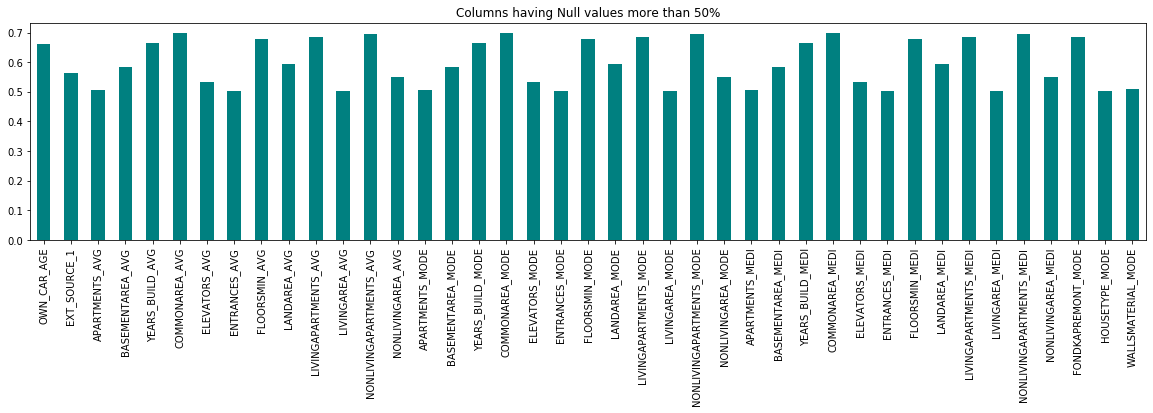

In [13]:
# View all columns with 50% or more null values

plt.figure(figsize=(20,4))
null_columns.plot(kind='bar',color="teal")
plt.title('Columns having Null values more than 50%')
plt.show()

In [14]:
#Check dataframe before drop operation:

app_data.shape

(307511, 122)

There is a possiblility that score for applicant has been collected only from source1 and not from other 2 sources. Even though EXT_SOURCE_1 has almost 56% of null values, considering the importance of applicant scores from external sources in risk analytics we will not drop this column now and will do further analysis on this.  

In [15]:
null_columns.drop(labels='EXT_SOURCE_1',inplace=True)
len(null_columns)

40

In [16]:
# Drop above columns having null values greater than 50%

null_columns_list=list(null_columns.index)
app_data.drop(labels=null_columns_list,axis=1,inplace=True)

In [17]:
#Check dataframe after drop operation:

app_data.shape

(307511, 82)

In [18]:
#Analyse missing value remaining after drop operation

app_data.isna().mean().sort_values(ascending = False)*100

EXT_SOURCE_1                    56.381073
FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
NAME_TYPE_SUITE                  0.420148
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0

#### Analyse each column missing value, outliers & suggest method of imputation for missing values

###### Let's analyse columns having null values less than 13% one by one.

In [20]:
#Define a common method for box plot analysis:

def distribution_analysis(data,title,column,ptype,bins=None):
    plt.figure(figsize=(14,4))
    if ptype == 'box':
        sns.boxplot(data[column])
    elif ptype == 'dist':
        sns.distplot(data,bins=bins)
    
    plt.title(title, fontsize=16,color="blue")
    plt.xlabel(column, fontsize=14,color="blue")
    plt.show()
    


In [21]:
#Analyse AMT_ANNUNITY column
#Describe AMT_ANNUITY
app_data.AMT_ANNUITY.describe()


count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

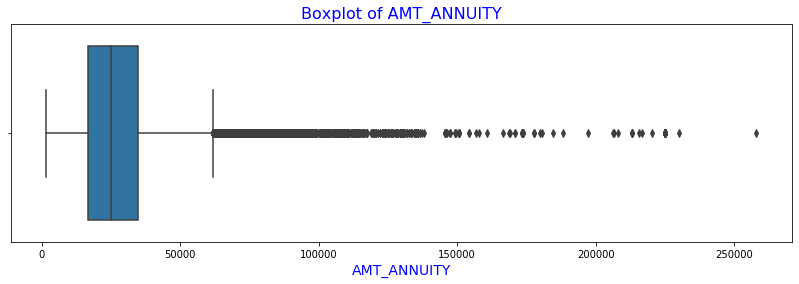

In [22]:
distribution_analysis(data=app_data,title="Boxplot of AMT_ANNUITY", column='AMT_ANNUITY',ptype='box')

In [23]:
#Check the qauntile values of AMT_ANNUITY column
app_data.AMT_ANNUITY.quantile([.75,.8,.9,.95,.99,.995,.997,.998,.999,1])

0.750     34596.0
0.800     37516.5
0.900     45954.0
0.950     53325.0
0.990     70006.5
0.995     79758.0
0.997     90000.0
0.998     96480.0
0.999    110047.5
1.000    258025.5
Name: AMT_ANNUITY, dtype: float64

###### Inference:
AMT_ANNUITY has only 0.0039% missing values. Those observations with NaN can be an indicator that the applicant doesn't have any annuity amount/account. So it is better to leave them as NaN.
AMT_ANNUITY column has very high outlier values.From the boxplot till value 110047 seems to be continuous. So naything beyond 110047 can be considered as outliers. As individuals with very high Loan Annuity can become a group of interest in issuing the loan, it is better to leave them as it is keeping in mind about the presence of outliers.

In [24]:
# Creating binned column for AMT_ANNUITY for easy analysis
bins = [0,20000,40000,60000,80000,100000,300000]
slot = ['0-20K', '20-40K','40-60K','60-80K','80K-1L','Above 1L']

app_data['AMT_ANNUITY_CAT'] = pd.cut(app_data['AMT_ANNUITY'],bins,labels=slot)


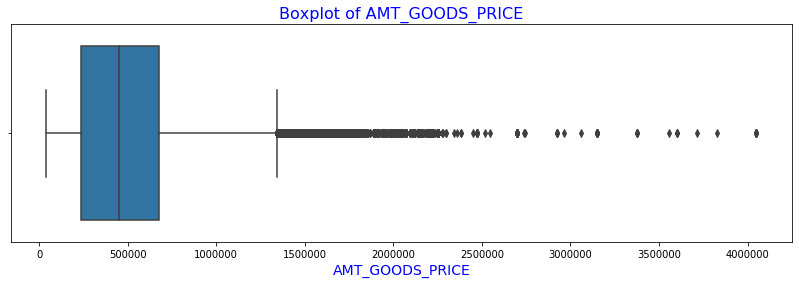

In [25]:
#Analyse AMT_GOODS_PRICE column
distribution_analysis(data=app_data,title="Boxplot of AMT_GOODS_PRICE", column='AMT_GOODS_PRICE',ptype='box')

In [26]:
#Describe AMT_GOODS_PRICE
pd.options.display.float_format = '{:.3f}'.format
app_data.AMT_GOODS_PRICE.describe()

count    307233.000
mean     538396.207
std      369446.461
min       40500.000
25%      238500.000
50%      450000.000
75%      679500.000
max     4050000.000
Name: AMT_GOODS_PRICE, dtype: float64

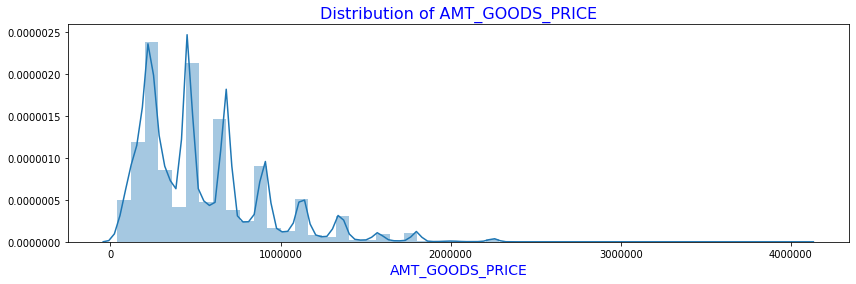

In [27]:
#Distribution of AMT_GOODS_PRICE
distribution_analysis(data=app_data[~app_data.AMT_GOODS_PRICE.isnull()]['AMT_GOODS_PRICE'],title="Distribution of AMT_GOODS_PRICE", column='AMT_GOODS_PRICE',ptype='dist')

In [28]:
#Check the qauntile values
app_data.AMT_GOODS_PRICE.quantile([.75,.9,.99,.995,.998])

0.750    679500.000
0.900   1093500.000
0.990   1800000.000
0.995   1800000.000
0.998   2250000.000
Name: AMT_GOODS_PRICE, dtype: float64

###### Inference: 
AMT_GOODS_PRICE has 0.09% of null values. Null values could indicate that the applicant is not buying the loan for any goods. So it is better to leave them as NaN for analysis. This field has large number of outlier values.From the boxplot it is clear that anything above 2250000 can be considered as outliers. As AMT_GOODS_PRICE has a non uniform distribution it's better to create a new variable with binned the values. Binning will help to reduce the effect of outliers.  

In [29]:
# Creating bins for AMT_GOODS_PRICE

bins = [0,250000,500000,1000000,2000000,3000000,5000000]
slot = ['0- 0.25M', '0.25-0.5M','0.5-1M','1-2M','2-3M','Above 3M']

app_data['AMT_GOODS_PRICE_CAT'] = pd.cut(app_data['AMT_GOODS_PRICE'],bins,labels=slot)

In [30]:
#Analyse NAME_TYPE_SUITE column

app_data.NAME_TYPE_SUITE.value_counts(dropna=False)

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

###### Inference: 
NAME_TYPE_SUITE is categorical column, so missing value can be replaced with the mode value 'Unaccompanied'. Also NaN could indicate that no one else accompanied the applicant.

In [31]:
#Set NAME_TYPE_SUITE Null values to it's mode value
app_data['NAME_TYPE_SUITE'].fillna('Unaccompanied',inplace=True)

In [32]:
app_data.NAME_TYPE_SUITE.value_counts(dropna=False)

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [33]:
#Analyse CNT_FAM_MEMBERS column

app_data.CNT_FAM_MEMBERS.value_counts(dropna=False)

2.000     158357
1.000      67847
3.000      52601
4.000      24697
5.000       3478
6.000        408
7.000         81
8.000         20
9.000          6
10.000         3
14.000         2
16.000         2
12.000         2
nan            2
20.000         2
11.000         1
13.000         1
15.000         1
Name: CNT_FAM_MEMBERS, dtype: int64

###### Inference: 
CNT_FAM_MEMBERS column has only 2 null values. Null values could mean that there are no family members for the applicant. So it's better to replace NaN with zero.


In [34]:
app_data.CNT_FAM_MEMBERS.fillna(0,inplace=True)
app_data.CNT_FAM_MEMBERS.value_counts(dropna=False)

2.000     158357
1.000      67847
3.000      52601
4.000      24697
5.000       3478
6.000        408
7.000         81
8.000         20
9.000          6
10.000         3
0.000          2
20.000         2
16.000         2
12.000         2
14.000         2
15.000         1
13.000         1
11.000         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [35]:
#change CNT_FAM_MEMBERS to object data type
#app_data.CNT_FAM_MEMBERS=app_data.CNT_FAM_MEMBERS.astype('object')

Creating a new variable EXT_SOURCE_mean by taking the average of non null score values.

In [36]:
# Set new column as nan
app_data.EXT_SOURCE_mean=np.nan

In [37]:
# Create new function to set score value for new column
def create_new_score(row):
    if np.isnan(row['EXT_SOURCE_1']) :
        if np.isnan(row['EXT_SOURCE_2']) and np.isnan(row['EXT_SOURCE_3']):
            row['EXT_SOURCE_mean']=np.nan
        elif np.isnan(row['EXT_SOURCE_2']) and row['EXT_SOURCE_3'] >=0 :
            row['EXT_SOURCE_mean'] = row['EXT_SOURCE_3']
        elif (row['EXT_SOURCE_2']>=0) and  np.isnan(row['EXT_SOURCE_3']):
            row['EXT_SOURCE_mean']=row['EXT_SOURCE_2']
        elif (row['EXT_SOURCE_2']>=0) and  row['EXT_SOURCE_3']>=0:
            row['EXT_SOURCE_mean']=(row['EXT_SOURCE_3']+row['EXT_SOURCE_2'])/2
    else:
        if np.isnan(row['EXT_SOURCE_2']) and np.isnan(row['EXT_SOURCE_3']):
            row['EXT_SOURCE_mean']= row['EXT_SOURCE_1']
        elif np.isnan(row['EXT_SOURCE_2']) and (row['EXT_SOURCE_3']>=0):
            row['EXT_SOURCE_mean']= (row['EXT_SOURCE_3']+ row['EXT_SOURCE_1'])/2
        elif (row['EXT_SOURCE_2'] >=0) and (np.isnan(row['EXT_SOURCE_3'])):
            row['EXT_SOURCE_mean']= (row['EXT_SOURCE_2']+row['EXT_SOURCE_1'])/2
        elif (row['EXT_SOURCE_2'] >=0) and ( row['EXT_SOURCE_3'] >=0):
            row['EXT_SOURCE_mean']= (row['EXT_SOURCE_3']+ row['EXT_SOURCE_2']+ row['EXT_SOURCE_1'])/3
    return row['EXT_SOURCE_mean'] 
app_data['EXT_SOURCE_mean']= app_data.apply(create_new_score,axis=1)

In [38]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0        202500.000  406597.500    24700.500   
1               N             0        270000.000 1293502.500    35698.500   
2               Y             0         67500.000  135000.000     6750.000   
3               Y             0        135000.000  312682.500    29686.500   
4               Y             0        121500.000  513000.000    21865.500   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0       351000.000   Unaccompanied          Working   
1      1129500.000          Family    State servant   
2       135000.000   Unaccompanied          Working   
3       297000.000   Unaccompanied          Working   
4       513000.000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                       0.019       -9461           -637          -3648.000   
1                       0.004      -16765          -1188          -1186.000   
2                       0.010      -19046           -225          -4260.000   
3                       0.008      -19005          -3039          -9833.000   
4                       0.029      -19932          -3038          -4311.000   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers            1.000   
1                 1           1           0      Core staff            2.000   
2                 1           1           0        Laborers            1.000   
3                 1           0           0        Laborers            2.000   
4                 1           0           0      Core staff            1.000   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [39]:
#Check null values for EXT_SOURCE_mean column
print('Percentage of null values:',app_data['EXT_SOURCE_mean'].isnull().mean()*100)
#describe
print(app_data['EXT_SOURCE_mean'].describe())

Percentage of null values: 0.05593295849579365
count   307339.000
mean         0.509
std          0.150
min          0.000
25%          0.414
50%          0.525
75%          0.623
max          0.879
Name: EXT_SOURCE_mean, dtype: float64


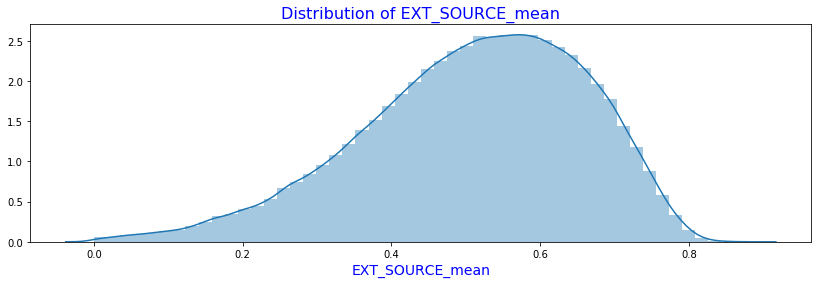

In [40]:
# Analyse EXT_SOURCE_mean column
distribution_analysis(data=app_data[~app_data['EXT_SOURCE_mean'].isnull()]['EXT_SOURCE_mean'],title="Distribution of EXT_SOURCE_mean", column='EXT_SOURCE_mean',ptype='dist')


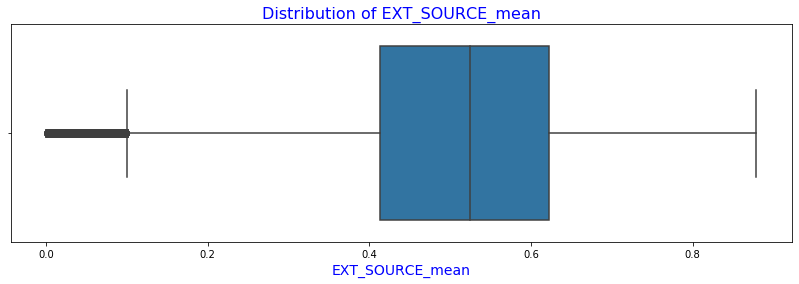

In [41]:
#boxplot
distribution_analysis(data=app_data,title="Distribution of EXT_SOURCE_mean", column='EXT_SOURCE_mean',ptype='box')


###### Inference:
EXT_SOURCE_mean has a slightly skewed distribution.From the boxplot its clear that all values are continuous and not far away from IQR.
Here null values can be replaced with mean values.

In [42]:
app_data['EXT_SOURCE_mean'].fillna(app_data['EXT_SOURCE_mean'].mean(),inplace=True)
app_data['EXT_SOURCE_mean'].isnull().sum()

0

In [43]:
#Dealing EXT_SOURCE_1 column:
#We have created a new score column utilizing all 3 score columns. As EXT_SOURCE_1 has more than 56% 
#of missing #values, it will be better to drop that column
app_data.drop(labels='EXT_SOURCE_1',axis=1,inplace=True)


In [44]:
app_data.shape

(307511, 84)

In [45]:
#Analyse EXT_SOURCE_2 column
#Describe EXT_SOURCE_2 data
app_data.EXT_SOURCE_2.describe()

count   306851.000
mean         0.514
std          0.191
min          0.000
25%          0.392
50%          0.566
75%          0.664
max          0.855
Name: EXT_SOURCE_2, dtype: float64

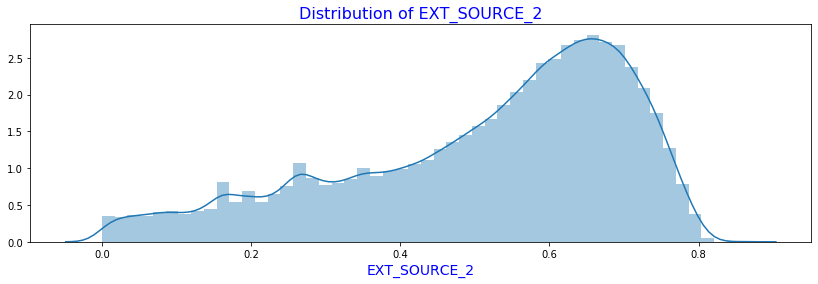

In [46]:
#Analyse EXT_SOURCE_2 column
distribution_analysis(data=app_data[~app_data.EXT_SOURCE_2.isnull()]['EXT_SOURCE_2'],title="Distribution of EXT_SOURCE_2", column='EXT_SOURCE_2',ptype='dist')

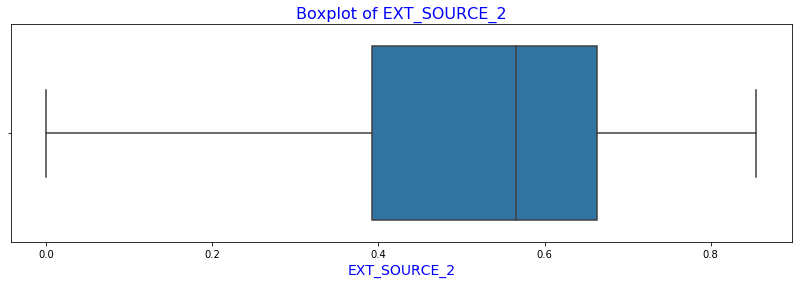

In [47]:
#Check if there are any outliers for EXT_SOURCE_2
distribution_analysis(data=app_data,title="Boxplot of EXT_SOURCE_2", column='EXT_SOURCE_2',ptype='box')

###### Inference:
EXT_SOURCE_2 has a negatively skewed distribution. So we can take the mean value to fill the missing values in case of EXT_SOURCE_2 column. It does not have any outliers.

In [48]:
# fill NaN with mean for EXT_SOURCE_2.
app_data.EXT_SOURCE_2.fillna(app_data.EXT_SOURCE_2.mean(),inplace=True)
app_data.EXT_SOURCE_2.isna().sum()

0

In [49]:
#Analyse OBS_30_CNT_SOCIAL_CIRCLE column

print(app_data.OBS_30_CNT_SOCIAL_CIRCLE.describe())
print(app_data.OBS_30_CNT_SOCIAL_CIRCLE.value_counts(dropna=False))

count   306490.000
mean         1.422
std          2.401
min          0.000
25%          0.000
50%          0.000
75%          2.000
max        348.000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64
0.000      163910
1.000       48783
2.000       29808
3.000       20322
4.000       14143
5.000        9553
6.000        6453
7.000        4390
8.000        2967
9.000        2003
10.000       1376
nan          1021
11.000        852
12.000        652
13.000        411
14.000        258
15.000        166
16.000        133
17.000         88
18.000         46
19.000         44
20.000         30
21.000         29
22.000         22
23.000         15
24.000         11
25.000         11
27.000          5
26.000          3
30.000          2
28.000          1
348.000         1
29.000          1
47.000          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64


#### Inference:
OBS_30_CNT_SOCIAL_CIRCLE has maximum value of 348 which is clearly an outlier as it is not possible for a client to have so many defaulters in his social surroundings. Also it has mode value of 0. Here null values can be replaced with zero as NaN could indicate that there are no defaulters in the area.

In [50]:
#fill na app_data.OBS_30_CNT_SOCIAL_CIRCLE
app_data.OBS_30_CNT_SOCIAL_CIRCLE.fillna(0,inplace=True)
app_data.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [51]:
#Analyse DEF_30_CNT_SOCIAL_CIRCLE column
print(app_data.DEF_30_CNT_SOCIAL_CIRCLE.value_counts(dropna=False))
print(app_data.DEF_30_CNT_SOCIAL_CIRCLE.describe())

0.000     271324
1.000      28328
2.000       5323
3.000       1192
nan         1021
4.000        253
5.000         56
6.000         11
7.000          1
8.000          1
34.000         1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64
count   306490.000
mean         0.143
std          0.447
min          0.000
25%          0.000
50%          0.000
75%          0.000
max         34.000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


###### Inference:
Similar to OBS_30_CNT_SOCIAL_CIRCLE, null values for DEF_30_CNT_SOCIAL_CIRCLE can be replaced with zero

In [52]:
#fill na 
app_data.DEF_30_CNT_SOCIAL_CIRCLE.fillna(0,inplace=True)
app_data.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [53]:
#Analyse OBS_60_CNT_SOCIAL_CIRCLE column

print(app_data.OBS_60_CNT_SOCIAL_CIRCLE.value_counts(dropna=False))
print(app_data.OBS_60_CNT_SOCIAL_CIRCLE.describe())

0.000      164666
1.000       48870
2.000       29766
3.000       20215
4.000       13946
5.000        9463
6.000        6349
7.000        4344
8.000        2886
9.000        1959
10.000       1335
nan          1021
11.000        837
12.000        620
13.000        401
14.000        238
15.000        166
16.000        137
17.000         73
18.000         49
19.000         44
20.000         30
21.000         28
22.000         20
23.000         13
24.000         12
25.000         11
27.000          5
29.000          2
28.000          1
344.000         1
47.000          1
26.000          1
30.000          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64
count   306490.000
mean         1.405
std          2.380
min          0.000
25%          0.000
50%          0.000
75%          2.000
max        344.000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


In [54]:
# Check the record with OBS_60_CNT_SOCIAL_CIRCLE > 50
app_data[app_data.OBS_60_CNT_SOCIAL_CIRCLE > 50] 


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
148403      272071       0    Revolving loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
148403               Y             0        202500.000  180000.000   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
148403     9000.000       180000.000          Family    State servant   

       NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
148403    Higher education  Single / not married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
148403                       0.020      -10111          -1917   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
148403          -2306.000            -2306           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
148403                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
148403      Core staff            1.000                     3   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
148403                            3                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
148403                        9                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
148403                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
148403                       0                       1   

        LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
148403                        1            Police         0.305         0.357   

        YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
148403                        0.987          0.333   

        YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
148403                         0.987           0.333   

        YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  \
148403                         0.987           0.333           0.030   

       EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
148403                  No                   348.000   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
148403                    34.000                   344.000   

        DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
148403                    24.000                -667.000                0   

        FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
148403                0                0                0                0   

        FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
148403                0                0                0                 0   

        FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
148403                 0                 0                 0   

        FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  \
148403                 0                 0                 0   

        FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
148403                 0                 0                 0   

        FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
148403                 0                 0                       0.000   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
148403                      0.000                       1.000   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
148403                      1.000                      0.000   

        AMT_REQ_CREDIT_BUREAU_YEAR AMT_ANNUITY_CAT AMT_GOODS_PRICE_CAT  \
148403                       3.000           0-20K            0- 0.25M   

        EXT_SOURCE_mean  
148403            0.341

######  Inference:
There is only one record that has high numbers of defaulters in the social circle with 	SK_ID_CURR 272071.We can drop that row as it looks like an outlier. Also fill null values with zero as it Nan could indicate that there are no defaulters.

In [55]:
#Drop outlier row
app_data=app_data[~(app_data.OBS_60_CNT_SOCIAL_CIRCLE > 50)]
#fill null values
app_data.OBS_60_CNT_SOCIAL_CIRCLE.fillna(0,inplace=True)
app_data.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [56]:
##Analyse DEF_60_CNT_SOCIAL_CIRCLE column

print(app_data.DEF_60_CNT_SOCIAL_CIRCLE.value_counts())
print(app_data.DEF_60_CNT_SOCIAL_CIRCLE.describe())

0.000    280721
1.000     21841
2.000      3170
3.000       598
4.000       135
5.000        20
6.000         3
7.000         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64
count   306489.000
mean         0.100
std          0.360
min          0.000
25%          0.000
50%          0.000
75%          0.000
max          7.000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


###### Inference:
Null values can be replaced with zero for DEF_60_CNT_SOCIAL_CIRCLE.


In [57]:
#fill null values
app_data.DEF_60_CNT_SOCIAL_CIRCLE.fillna(0,inplace=True)
app_data.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

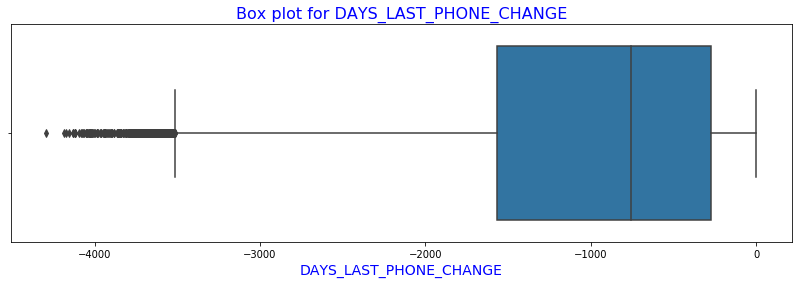

In [58]:
#Analysis for DAYS_LAST_PHONE_CHANGE

distribution_analysis(data=app_data,title="Box plot for DAYS_LAST_PHONE_CHANGE", column='DAYS_LAST_PHONE_CHANGE',ptype='box')

In [59]:
print('Number of null values for DAYS_LAST_PHONE_CHANGE',app_data.DAYS_LAST_PHONE_CHANGE.isnull().sum())


Number of null values for DAYS_LAST_PHONE_CHANGE 1


###### Inference:
DAYS_LAST_PHONE_CHANGE could take any values. So we can't say explicitly that there are outliers here in this column. Since only 1 row is present with missing value,it can be ignored and can be treated as Nan for analysis. 

##### Analyse columns with more than 12% missing values

In [60]:
(app_data.isna().mean()*100)[(app_data.isna().mean()*100) > 12 ]

OCCUPATION_TYPE                31.346
EXT_SOURCE_3                   19.825
YEARS_BEGINEXPLUATATION_AVG    48.781
FLOORSMAX_AVG                  49.761
YEARS_BEGINEXPLUATATION_MODE   48.781
FLOORSMAX_MODE                 49.761
YEARS_BEGINEXPLUATATION_MEDI   48.781
FLOORSMAX_MEDI                 49.761
TOTALAREA_MODE                 48.269
EMERGENCYSTATE_MODE            47.398
AMT_REQ_CREDIT_BUREAU_HOUR     13.502
AMT_REQ_CREDIT_BUREAU_DAY      13.502
AMT_REQ_CREDIT_BUREAU_WEEK     13.502
AMT_REQ_CREDIT_BUREAU_MON      13.502
AMT_REQ_CREDIT_BUREAU_QRT      13.502
AMT_REQ_CREDIT_BUREAU_YEAR     13.502
dtype: float64

In [61]:
#Analysing OCCUPATION_TYPE column
app_data.OCCUPATION_TYPE.value_counts(normalize=True,dropna=False)*100

NaN                     31.346
Laborers                17.946
Sales staff             10.439
Core staff               8.965
Managers                 6.950
Drivers                  6.050
High skill tech staff    3.701
Accountants              3.191
Medicine staff           2.776
Security staff           2.186
Cooking staff            1.934
Cleaning staff           1.513
Private service staff    0.862
Low-skill Laborers       0.681
Waiters/barmen staff     0.438
Secretaries              0.424
Realty agents            0.244
HR staff                 0.183
IT staff                 0.171
Name: OCCUPATION_TYPE, dtype: float64

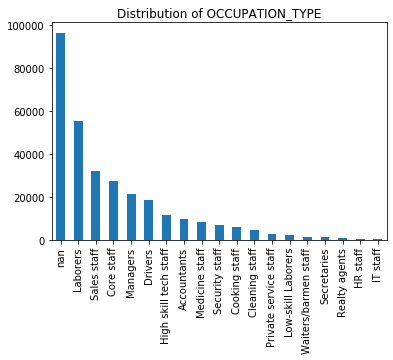

In [62]:
app_data.OCCUPATION_TYPE.value_counts(dropna=False).plot.bar()
plt.title('Distribution of OCCUPATION_TYPE')
plt.show()

###### Inference:
In the OCCUPATION_TYPE column, 31% of values are null and we are not exactly sure whether all these null values belong to one single category that is missed to capture or they belong to all existing categories and missed due to error. If we assign mode value to nan values it can exagurate the information. So we decide to leave the missing values as it is.

Removing columns YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,
YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI, TOTALAREA_MODE,EMERGENCYSTATE_MODE as they seem to be less relevant
and also has nearly 50% of missing values

In [63]:
#Removing columns YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,
#YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI, TOTALAREA_MODE,EMERGENCYSTATE_MODE 

app_data.drop(labels=['YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE',
'YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI', 'TOTALAREA_MODE','EMERGENCYSTATE_MODE'],axis=1,inplace=True)
           

In [64]:
app_data.shape

(307510, 76)

In [65]:
#Changing requests to CREDIT_BUREAU columns to object type as it has discrete value

app_data[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]=app_data[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].astype('object')
#Describe requests to CREDIT_BUREAU columns
app_data[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                   265991.000                 265991.000   
unique                       5.000                      9.000   
top                          0.000                      0.000   
freq                    264365.000                 264502.000   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                   265991.000                 265991.000   
unique                       9.000                     24.000   
top                          0.000                      0.000   
freq                    257456.000                 222233.000   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count                  265991.000                  265991.000  
unique                     11.000                      25.000  
top                         0.000                       0.000  
freq                   215416.000                   71801.000

###### Inference:
Null values in Number of enquiries from bureau columns can be filled with zero as it could indicate that no enquiries were requested in the specified periods.Here mode value is also zero.

In [66]:
#Fill missing values with zero
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0,inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0,inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0,inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0,inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0,inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0,inplace=True)


In [67]:
app_data[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].isnull().mean()


AMT_REQ_CREDIT_BUREAU_HOUR   0.000
AMT_REQ_CREDIT_BUREAU_DAY    0.000
AMT_REQ_CREDIT_BUREAU_WEEK   0.000
AMT_REQ_CREDIT_BUREAU_MON    0.000
AMT_REQ_CREDIT_BUREAU_QRT    0.000
AMT_REQ_CREDIT_BUREAU_YEAR   0.000
dtype: float64

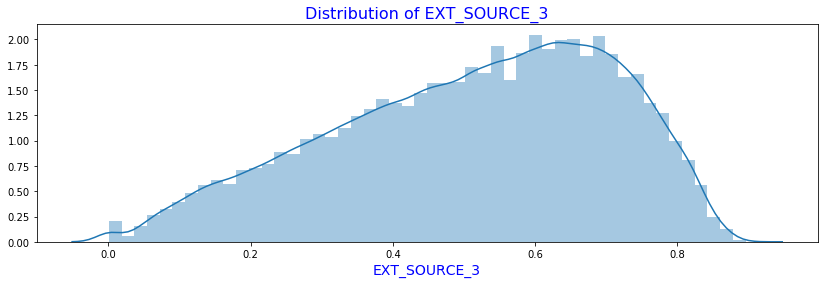

In [68]:
# Analyse 'EXT_SOURCE_3'
distribution_analysis(data=app_data[~app_data.EXT_SOURCE_3.isnull()]['EXT_SOURCE_3'],title="Distribution of EXT_SOURCE_3", column='EXT_SOURCE_3',ptype='dist')


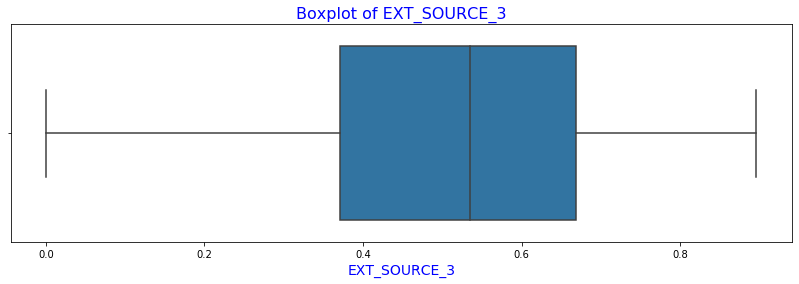

In [69]:
distribution_analysis(data=app_data,title="Boxplot of EXT_SOURCE_3", column='EXT_SOURCE_3',ptype='box')


In [70]:
app_data.EXT_SOURCE_3.describe()

count   246545.000
mean         0.511
std          0.195
min          0.001
25%          0.371
50%          0.535
75%          0.669
max          0.896
Name: EXT_SOURCE_3, dtype: float64

###### Inference:
EXT_SOURCE_3 also has a skewed distribution. It doesn't have any outliers also. So filling the missing values of EXT_SOURCE_3 with mean value.    

In [71]:
app_data.EXT_SOURCE_3.fillna(app_data.EXT_SOURCE_3.mean(),inplace=True)
app_data.EXT_SOURCE_3.isnull().sum()

0

###### Remove columns that are not necessary

In [72]:
# We will remove columns from this dataset that are not necessary

drop_cols=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
           'FLAG_PHONE', 'FLAG_EMAIL','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
           'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
           'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 
           'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 
           'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

app_data.drop(labels=drop_cols,axis=1,inplace=True)

In [73]:
app_data.shape


(307510, 49)

In [74]:
app_data.isnull().mean().sort_values(ascending=False)*100

OCCUPATION_TYPE               31.346
AMT_GOODS_PRICE                0.090
AMT_GOODS_PRICE_CAT            0.090
AMT_ANNUITY_CAT                0.004
AMT_ANNUITY                    0.004
TARGET                         0.000
NAME_EDUCATION_TYPE            0.000
DAYS_ID_PUBLISH                0.000
DAYS_REGISTRATION              0.000
DAYS_EMPLOYED                  0.000
DAYS_BIRTH                     0.000
REGION_POPULATION_RELATIVE     0.000
NAME_HOUSING_TYPE              0.000
NAME_FAMILY_STATUS             0.000
NAME_INCOME_TYPE               0.000
NAME_CONTRACT_TYPE             0.000
NAME_TYPE_SUITE                0.000
CNT_FAM_MEMBERS                0.000
AMT_CREDIT                     0.000
AMT_INCOME_TOTAL               0.000
CNT_CHILDREN                   0.000
FLAG_OWN_REALTY                0.000
FLAG_OWN_CAR                   0.000
CODE_GENDER                    0.000
EXT_SOURCE_mean                0.000
REGION_RATING_CLIENT_W_CITY    0.000
REGION_RATING_CLIENT           0.000
O

##### Analyse Continuous variables - AMT_INCOME_TOTAL and AMT_CREDIT

In [75]:
# Analyse AMT_INCOME_TOTAL
app_data.AMT_INCOME_TOTAL.describe()

count      307510.000
mean       168797.810
std        237123.524
min         25650.000
25%        112500.000
50%        147150.000
75%        202500.000
max     117000000.000
Name: AMT_INCOME_TOTAL, dtype: float64

In [76]:
app_data.AMT_INCOME_TOTAL.quantile([.75,0.8,0.9,.99,.995,.999])

0.750   202500.000
0.800   225000.000
0.900   270000.000
0.990   472500.000
0.995   630000.000
0.999   900000.000
Name: AMT_INCOME_TOTAL, dtype: float64

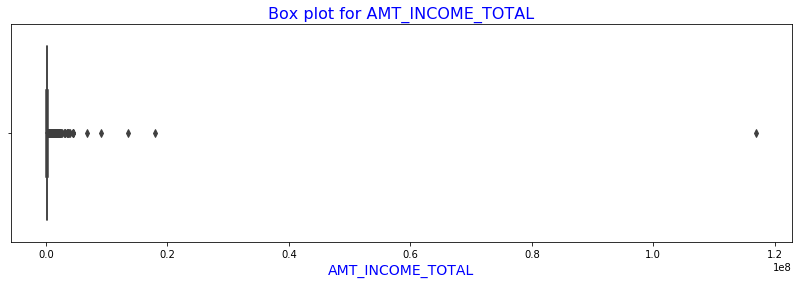

In [77]:
#Box plot for AMT_INCOME_TOTAL
distribution_analysis(data=app_data,title="Box plot for AMT_INCOME_TOTAL", column='AMT_INCOME_TOTAL',ptype='box')

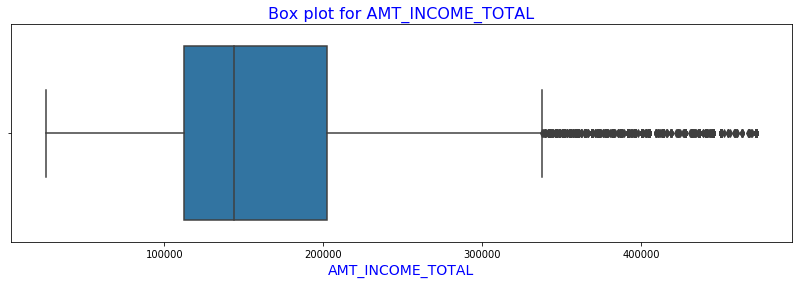

In [78]:
# Plotting with AMT_INCOME_TOTAL<472501
distribution_analysis(data=app_data[app_data.AMT_INCOME_TOTAL<472501],title="Box plot for AMT_INCOME_TOTAL", column='AMT_INCOME_TOTAL',ptype='box')

###### Inference:
AMT_INCOME_TOTAL has outliers which are greater than 472500. As applicants with high income can become cases of interest , we can leave them as it is keeping in mind about the presence of outliers. We will bin this column for better understanding.

In [79]:
# Creating bins for AMT_INCOME_TOTAL

bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,10000000000]
slot = ['0-50000','50000-100000','100000-150000', '150000-200000','200000-250000','250000-300000','300000-350000',
        '350000-400000','400000-450000','450000 and above']

app_data['AMT_INCOME_TOTAL_CAT'] = pd.cut(app_data['AMT_INCOME_TOTAL'],bins,labels=slot)

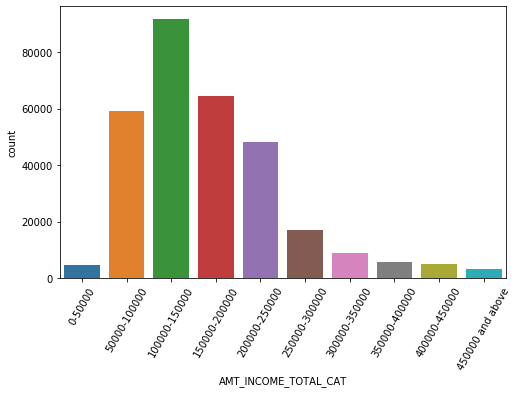

In [80]:
#Plotting the distribution income using countplot.
plt.figure(figsize=(8,5))
sns.countplot(app_data['AMT_INCOME_TOTAL_CAT'])
plt.xticks(rotation=60)
plt.show()

Most people are in the income range of 1,00,000-1,50,000.Income has a skewed distribution. 

In [81]:
# Analysing AMT_CREDIT column
app_data.AMT_CREDIT.quantile([0,.25,.5,.75,.8,.9,.99,.995,.999,1])

0.000     45000.000
0.250    270000.000
0.500    513531.000
0.750    808650.000
0.800    900000.000
0.900   1133748.000
0.990   1854000.000
0.995   2022565.500
0.999   2517300.000
1.000   4050000.000
Name: AMT_CREDIT, dtype: float64

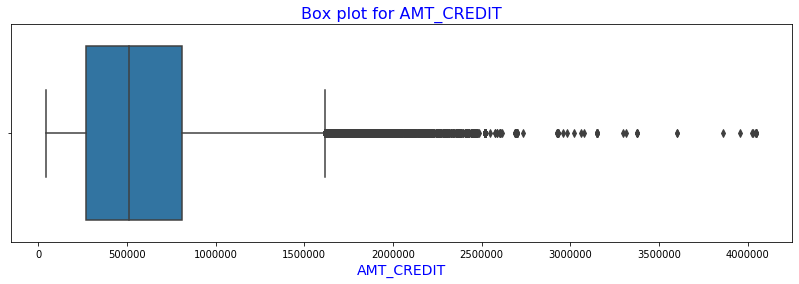

In [82]:
# Plotting boxplot  for AMT_CREDIT
distribution_analysis(data=app_data,title="Box plot for AMT_CREDIT", column='AMT_CREDIT',ptype='box')


###### Inference:
From the box plot it is clear that values above 2517300 can be considered as outliers as those data points are very far away from the rest of the data. These high credit customers can come under risk category.
As of now we will deal these high values by binning the variable.

In [83]:
# Creating bins for AMT_CREDIT

bins = [0,200000,400000,600000,800000,1000000,1200000,1400000,1000000000]
slots = ['0-200000', '200000-400000','400000-600000', '600000-800000', '800000-1000000', '1000000-1200000','1200000-1400000',
        '1400000 and above']

app_data['AMT_CREDIT_CAT']=pd.cut(app_data['AMT_CREDIT'],bins=bins,labels=slots)

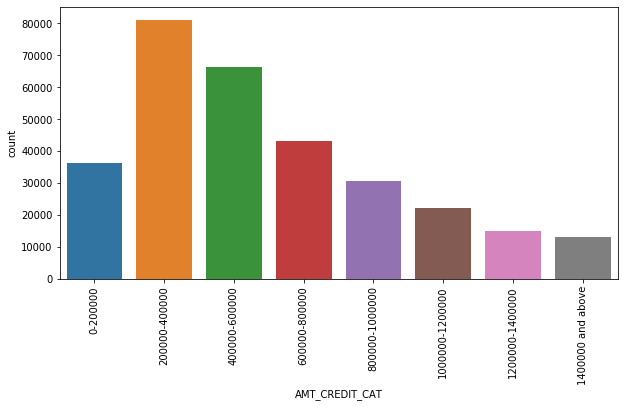

In [84]:
#Plotting the distribution of credit amount using countplot.
plt.figure(figsize=(10,5))
sns.countplot(app_data['AMT_CREDIT_CAT'])
plt.xticks(rotation=90)
plt.show()

Most applicants have got the credit in the range of 200000-400000

In [85]:
#Chnaging column CNT_CHILDREN to int type
app_data.CNT_CHILDREN=app_data.CNT_CHILDREN.astype('int')

In [86]:
#Taking absolute value for DAYS_BIRTH column and create new columns YEARS_BIRTH
app_data['YEARS_BIRTH']=abs(app_data.DAYS_BIRTH)/365

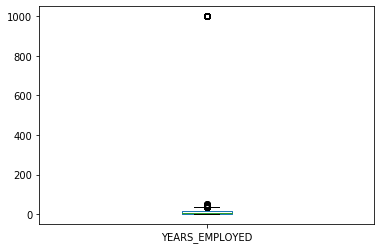

In [87]:
#Converting days employed column and plotting
app_data['YEARS_EMPLOYED']=(abs(app_data.DAYS_EMPLOYED)/365)
app_data['YEARS_EMPLOYED'].plot.box()
plt.show()


0.800     25.173
0.810     29.899
0.820   1000.666
0.900   1000.666
0.990   1000.666
Name: YEARS_EMPLOYED, dtype: float64


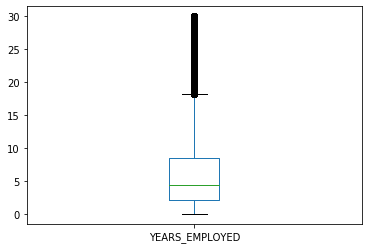

In [88]:
print(app_data['YEARS_EMPLOYED'].quantile([0.8,.81,.82,.9,.99]))
app_data[app_data['YEARS_EMPLOYED']<30]['YEARS_EMPLOYED'].plot.box()
plt.show()

In [89]:
app_data[app_data['YEARS_EMPLOYED']>30].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
8       100011       0         Cash loans           F            N   
11      100015       0         Cash loans           F            N   
23      100027       0         Cash loans           F            N   
38      100045       0         Cash loans           F            N   
43      100050       0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
8                Y             0        112500.000 1019610.000    33826.500   
11               Y             0         38419.155  148365.000    10678.500   
23               Y             0         83250.000  239850.000    23850.000   
38               Y             0         99000.000  247275.000    17338.500   
43               Y             0        108000.000  746280.000    42970.500   

    AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
8        913500.000        Children        Pensioner   
11       135000.000        Children        Pensioner   
23       225000.000   Unaccompanied        Pensioner   
38       225000.000   Unaccompanied        Pensioner   
43       675000.000   Unaccompanied        Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
8   Secondary / secondary special               Married  House / apartment   
11  Secondary / secondary special               Married  House / apartment   
23  Secondary / secondary special               Married  House / apartment   
38  Secondary / secondary special               Married  House / apartment   
43               Higher education  Single / not married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
8                        0.019      -20099         365243          -7427.000   
11                       0.015      -20417         365243          -5246.000   
23                       0.006      -24827         365243          -9012.000   
38                       0.006      -23920         365243          -9817.000   
43                       0.011      -23548         365243          -5745.000   

    DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
8             -3514             NaN            2.000                     2   
11            -2512             NaN            2.000                     2   
23            -3684             NaN            2.000                     3   
38            -4969             NaN            2.000                     2   
43            -4576             NaN            1.000                     2   

    REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
8                             2                  WEDNESDAY   
11                            2                     FRIDAY   
23                            3                     FRIDAY   
38                            2                     FRIDAY   
43                            2                  WEDNESDAY   

    HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
8                        14                           0   
11                        7                           0   
23                       12                           0   
38                       11                           0   
43                        9                           0   

    REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
8                            0                            0   
11                           0                            0   
23                           0                            0   
38                           0                            0   
43                           0                            0   

    REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
8                        0                       0                        0   
11                       0                       0                        0   
23      

There are observations with years employed greater than 1000. This is defenitely an outlier and must have wrongly inputed a value of -365243 as days_employed. These rows can be dropped from the dataframe.

In [90]:
app_data.shape

(307510, 53)

In [91]:
#Change the data type to object
app_data[['AMT_ANNUITY_CAT', 'AMT_GOODS_PRICE_CAT','AMT_INCOME_TOTAL_CAT', 'AMT_CREDIT_CAT','REGION_RATING_CLIENT',
 'LIVE_CITY_NOT_WORK_CITY',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'REGION_RATING_CLIENT_W_CITY']]=app_data[['AMT_ANNUITY_CAT', 'AMT_GOODS_PRICE_CAT',
 'AMT_INCOME_TOTAL_CAT','AMT_CREDIT_CAT','REGION_RATING_CLIENT',
 'LIVE_CITY_NOT_WORK_CITY',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'REGION_RATING_CLIENT_W_CITY']].astype('object')

In [92]:
#Get categorical columns
objcols=[col for col in app_data.columns if app_data[col].dtypes =='object'] 
objcols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'AMT_ANNUITY_CAT',
 'AMT_GOODS_PRICE_CAT',
 'AMT_INCOME_TOTAL_CAT',
 'AMT_CREDIT_CAT']

In [93]:
#Get continuous data columns
contcols=list(set(app_data.columns)-set(objcols))
contcols

['CNT_FAM_MEMBERS',
 'YEARS_EMPLOYED',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_ANNUITY',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'CNT_CHILDREN',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'DAYS_BIRTH',
 'YEARS_BIRTH',
 'AMT_GOODS_PRICE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'REGION_POPULATION_RELATIVE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_CREDIT',
 'SK_ID_CURR',
 'DAYS_ID_PUBLISH',
 'DAYS_EMPLOYED',
 'HOUR_APPR_PROCESS_START',
 'TARGET',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'DAYS_REGISTRATION',
 'EXT_SOURCE_3',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_mean',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2']

In [94]:
#Check whether we have all columns
print(len(objcols)+len(contcols))
app_data.shape[1]

53


53

## Data Analysis

0   91.927
1    8.073
Name: TARGET, dtype: float64


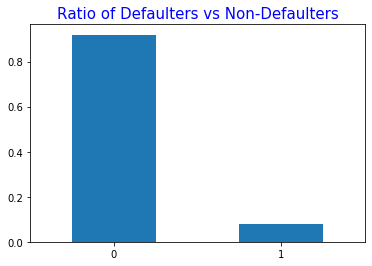

In [95]:
# Analyse Target variable
print(app_data.TARGET.value_counts(normalize=True)*100)
(app_data.TARGET.value_counts()/ len(app_data)).plot.bar()
plt.xticks(rotation=0)
plt.title('Ratio of Defaulters vs Non-Defaulters', fontsize=15,color="blue")
plt.show()

#### Divide the Data

Data is highly imbalanced with 91.9% non defaulters and 8.07% of defaulters. Dividing the data into two dataframes based on the TARGET varible values for further analysis. Below are the TARGET column categories.
- 1: Defaulters (i.e.,client with payment difficulties)
- 0: Non-Defaulters (i.e.,all other cases)

In [96]:
# Dividing the dataset into two datasets of target=1(customer with defaults) and target=0(all other)

ad_0 = app_data.loc[app_data["TARGET"]==0]
ad_1 = app_data.loc[app_data["TARGET"]==1]

In [97]:
ad_0.shape

(282685, 53)

In [98]:
ad_1.shape

(24825, 53)

In [99]:
# Imbalance Ratio

round(len(ad_0)/len(ad_1),2)

11.39

### Univariate analysis of Categorical Data

In [103]:
#Define plotting method for categorical variables.
def plotting_catdata(data,target_0, target_1, col):
    
    fig = plt.figure(figsize=(13,10))
    
    print('Plots for ',col)
    ax1 = plt.subplot(221)
    sns.countplot(x= 'TARGET', hue = col, data = data, ax = ax1,palette='bright')
    plt.xticks(rotation=0)
    plt.yscale('log')
    plt.legend(loc='best')
    plt.title('Plotting total count based on TARGET values for '+col)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= col, hue = 'TARGET', data = data, ax = ax2)
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.legend(loc='upper right')
    plt.title('Plotting total count based on TARGET values for '+col)

    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= target_0[col].value_counts(normalize=True)*100
    df['1']= target_1[col].value_counts(normalize=True)*100
    df.plot.bar(ax=ax3,color=['green','red'])
    plt.xticks(rotation=90)
    plt.xlabel(col)
    plt.legend(loc='upper right')
    plt.title('Plotting percentage of categories based on TARGET values')
    
    ax4 = plt.subplot(224)
    (data[col].value_counts(normalize=True)*100).plot.bar()
    plt.xticks(rotation=90)
    plt.xlabel(col)
    plt.title('Plotting composition data for the column: '+ column)
    
    fig.tight_layout() 

    plt.show()
      

In [104]:
objcols_ro = objcols.copy()
objcols_ro.remove('ORGANIZATION_TYPE')


Plots for  NAME_CONTRACT_TYPE


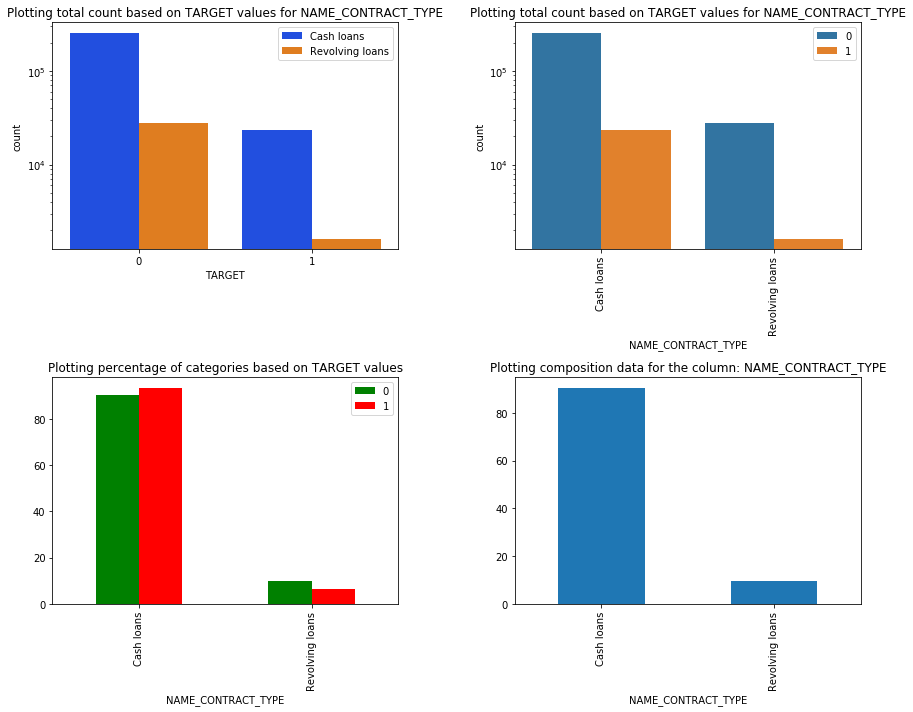

Plots for  CODE_GENDER


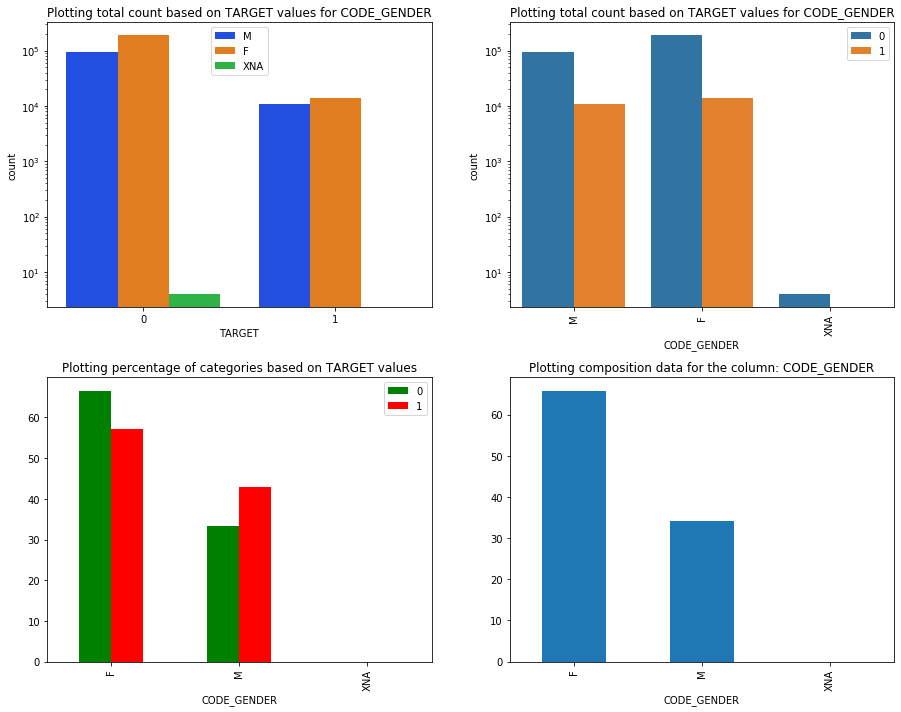

Plots for  FLAG_OWN_CAR


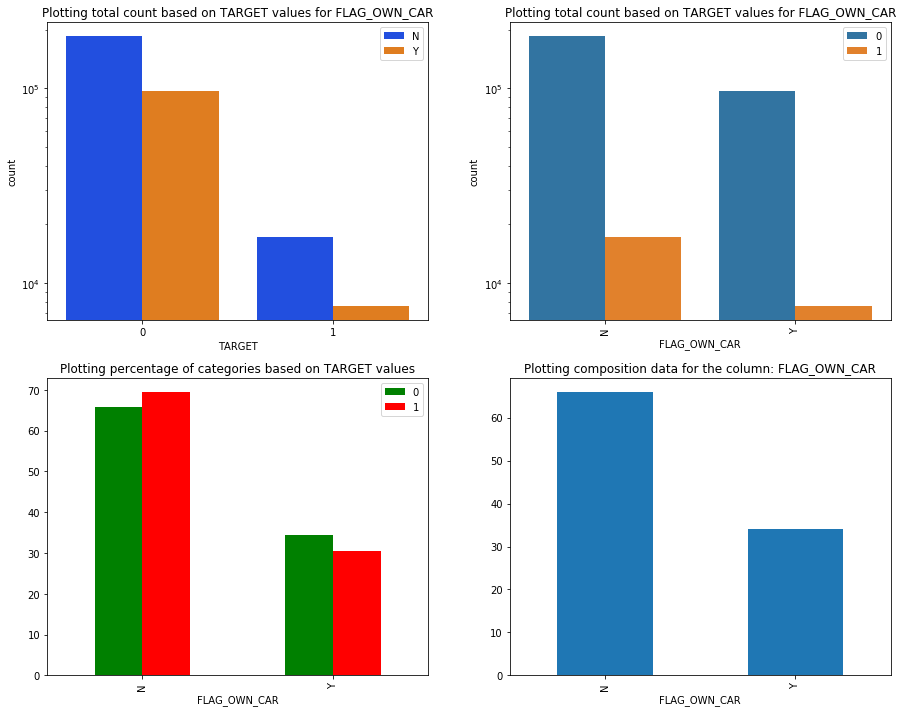

Plots for  FLAG_OWN_REALTY


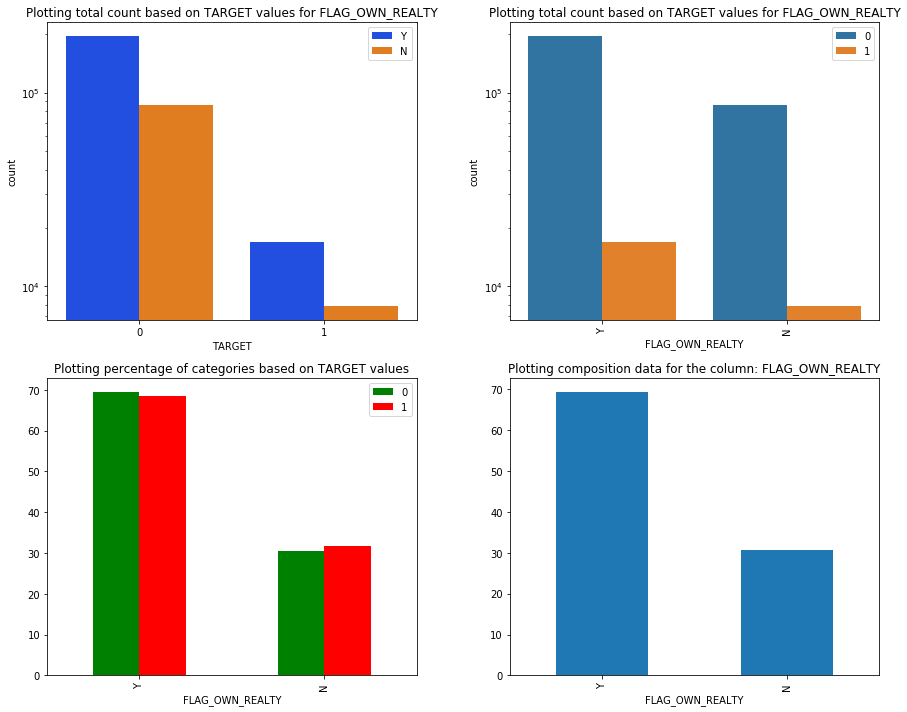

Plots for  NAME_TYPE_SUITE


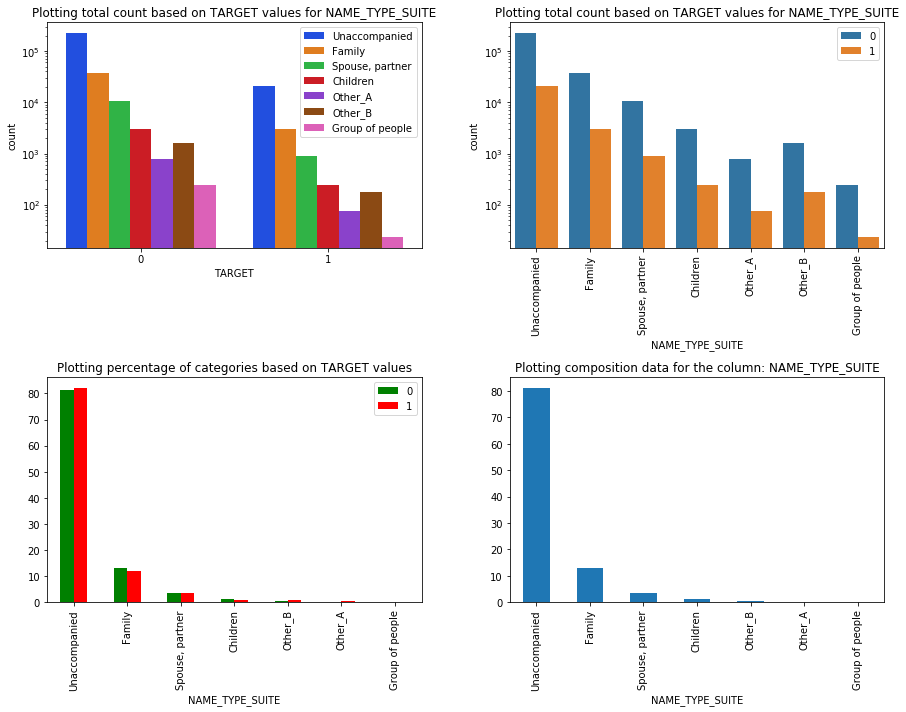

Plots for  NAME_INCOME_TYPE


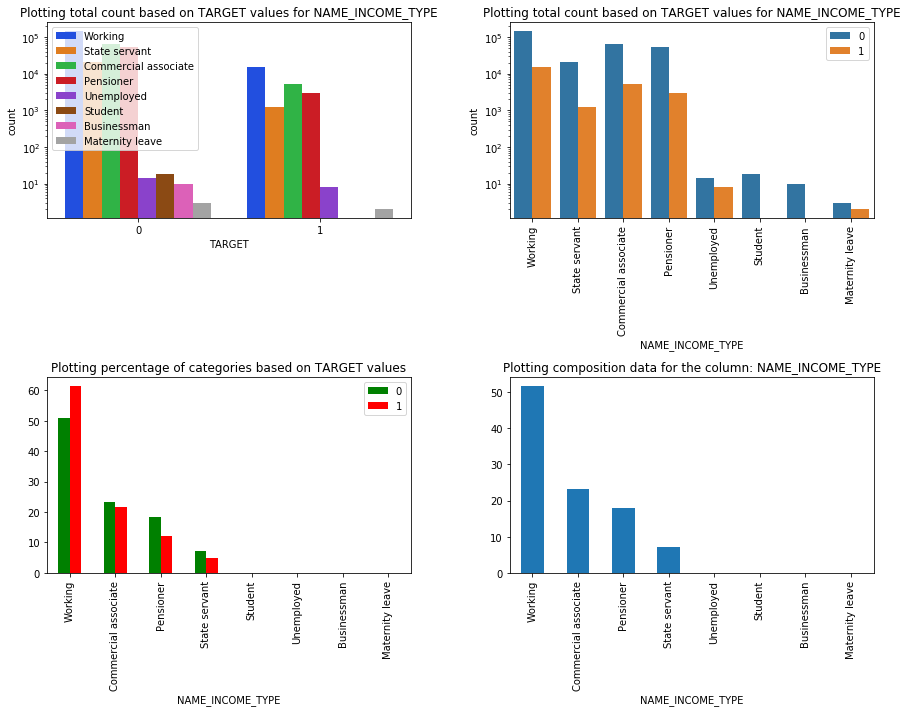

Plots for  NAME_EDUCATION_TYPE


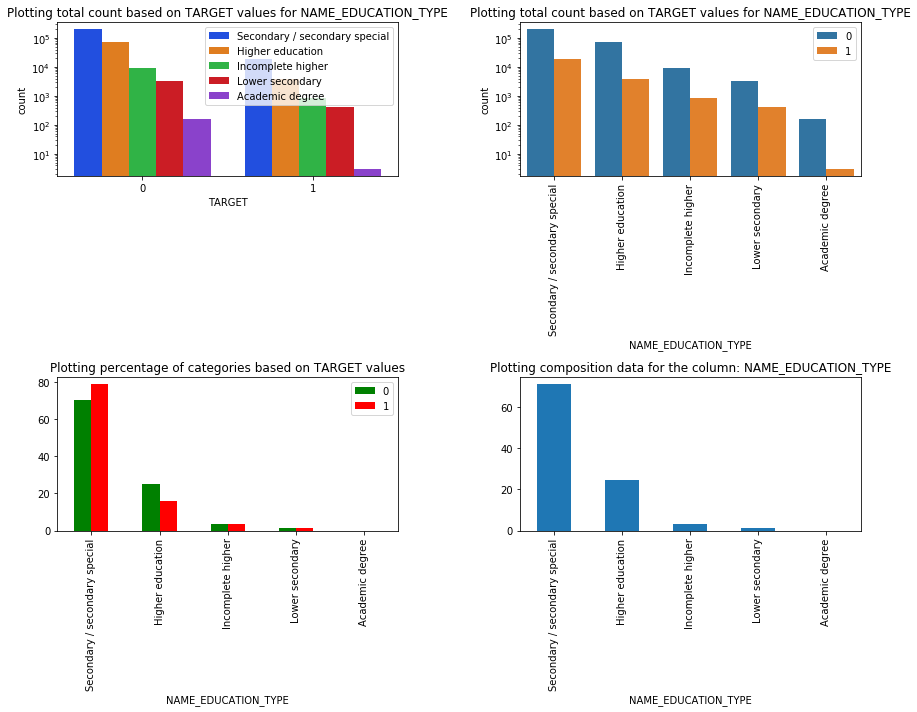

Plots for  NAME_FAMILY_STATUS


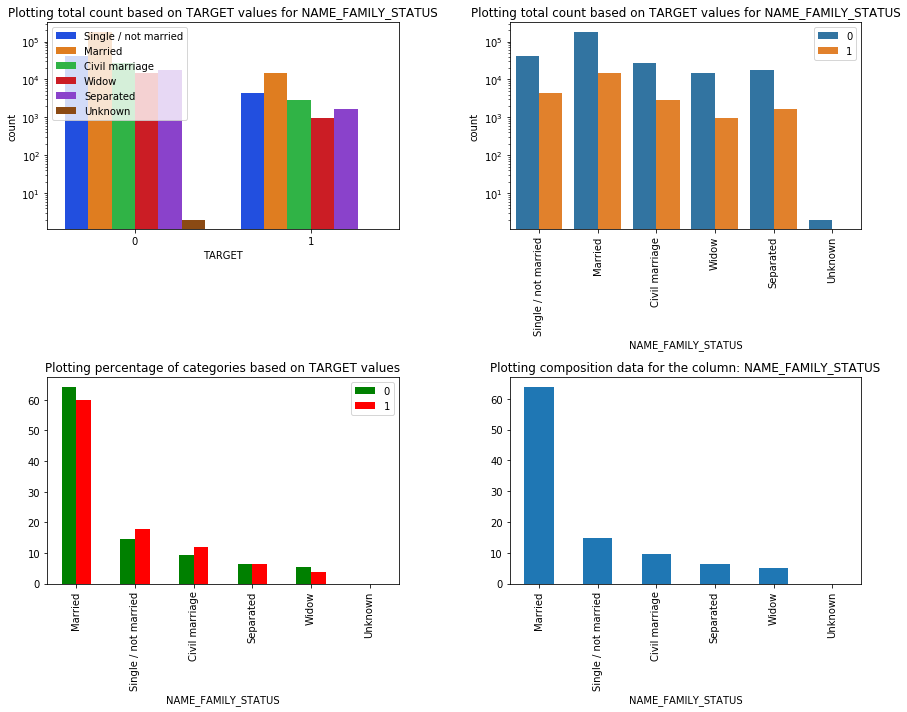

Plots for  NAME_HOUSING_TYPE


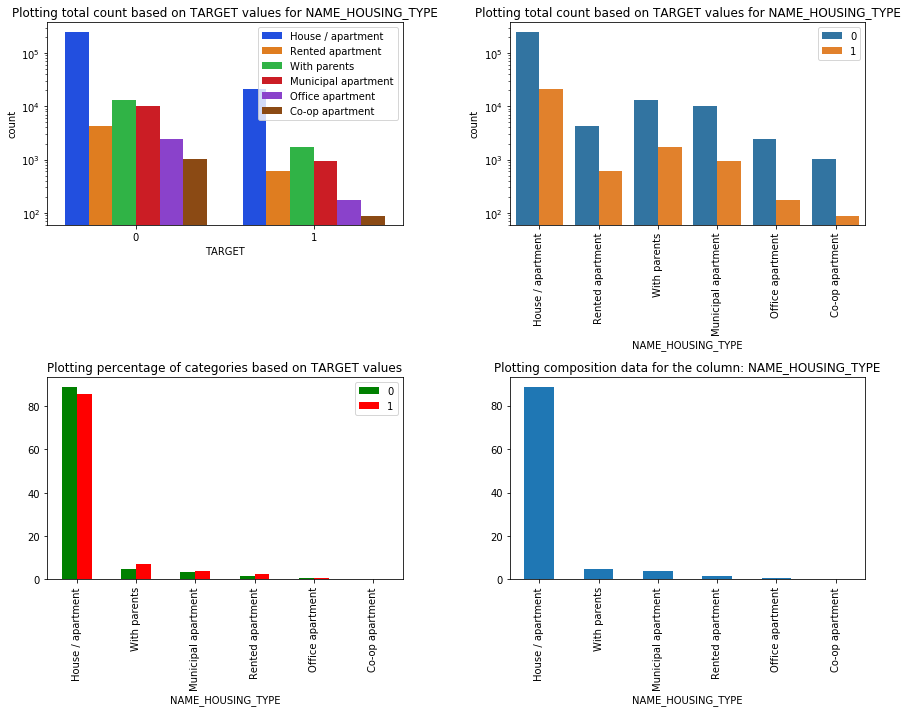

Plots for  OCCUPATION_TYPE


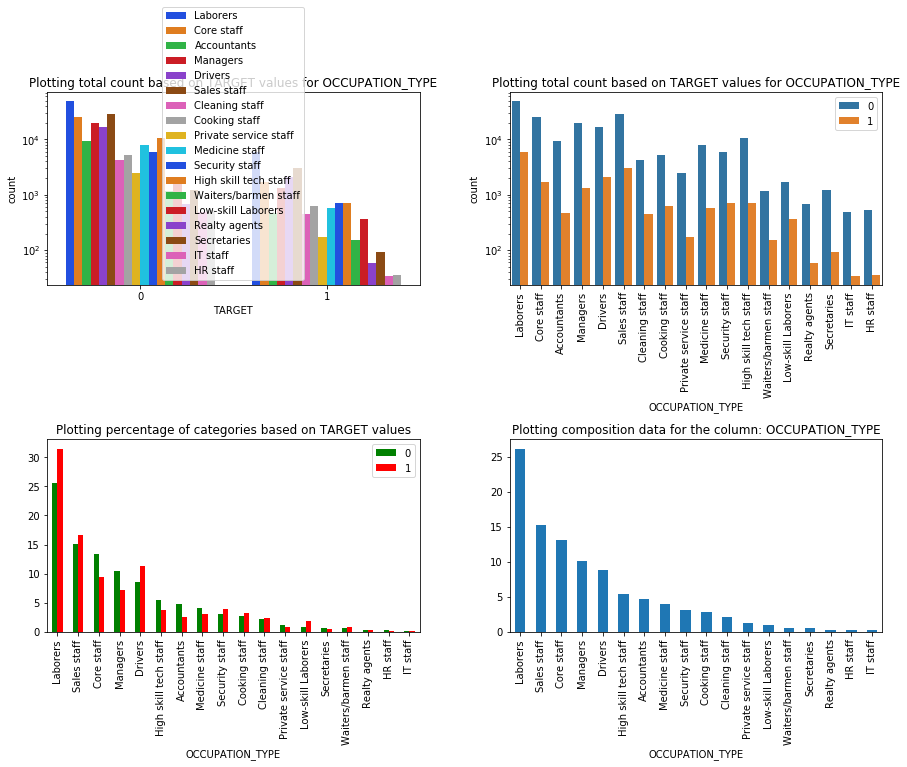

Plots for  REGION_RATING_CLIENT


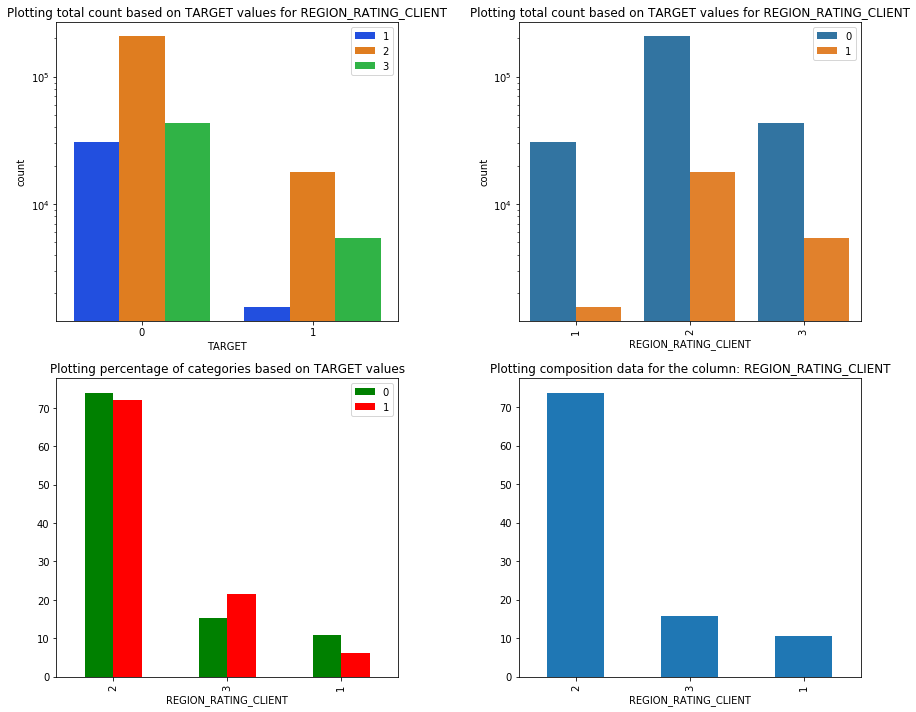

Plots for  REGION_RATING_CLIENT_W_CITY


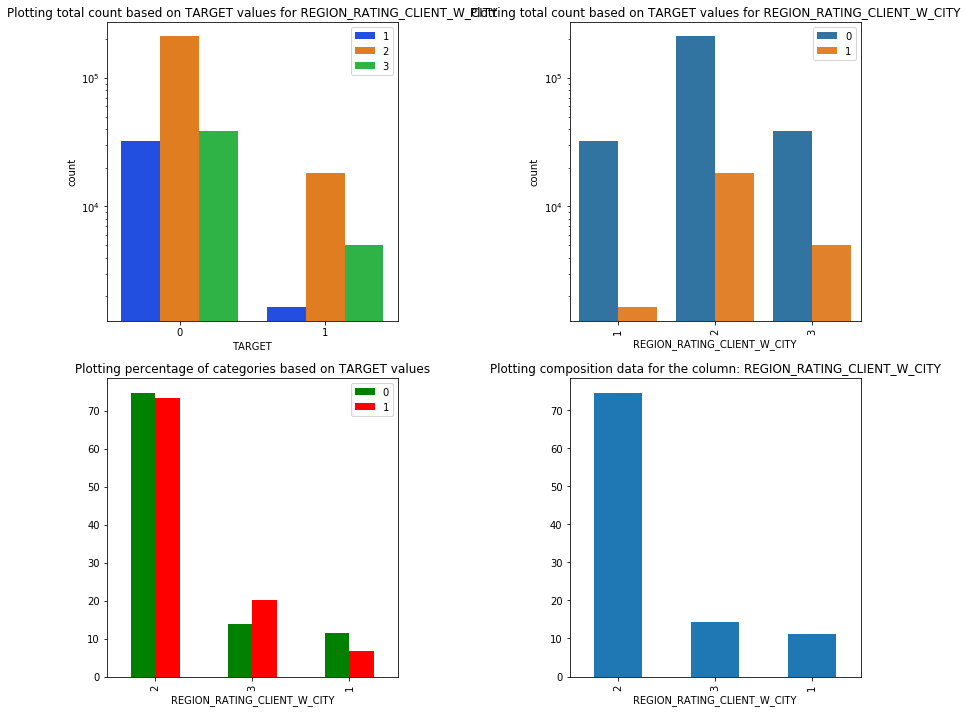

Plots for  WEEKDAY_APPR_PROCESS_START


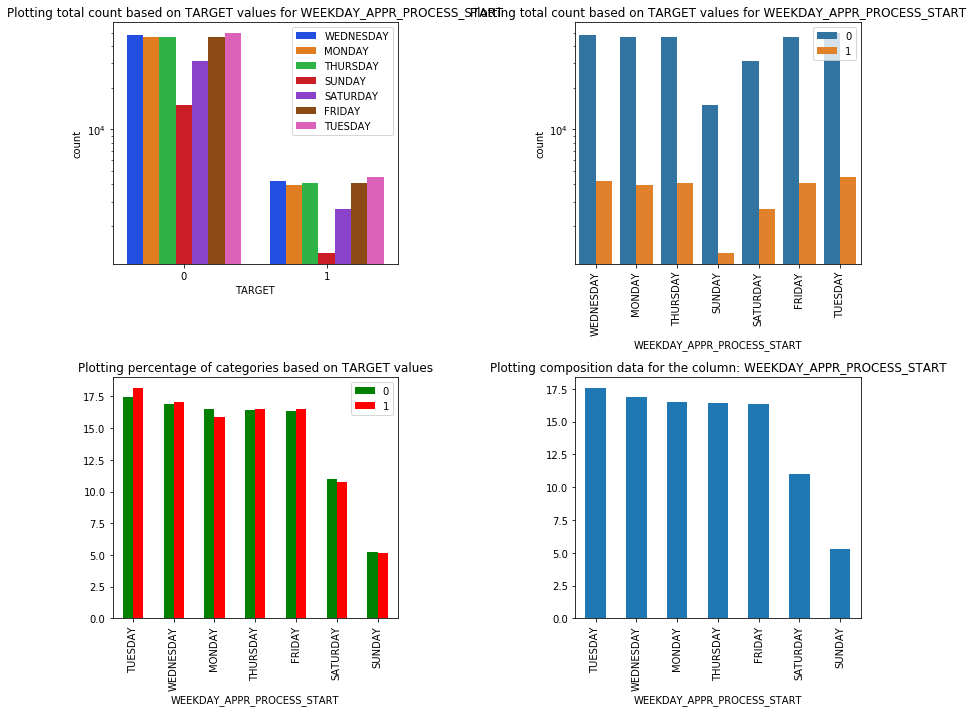

Plots for  REG_REGION_NOT_LIVE_REGION


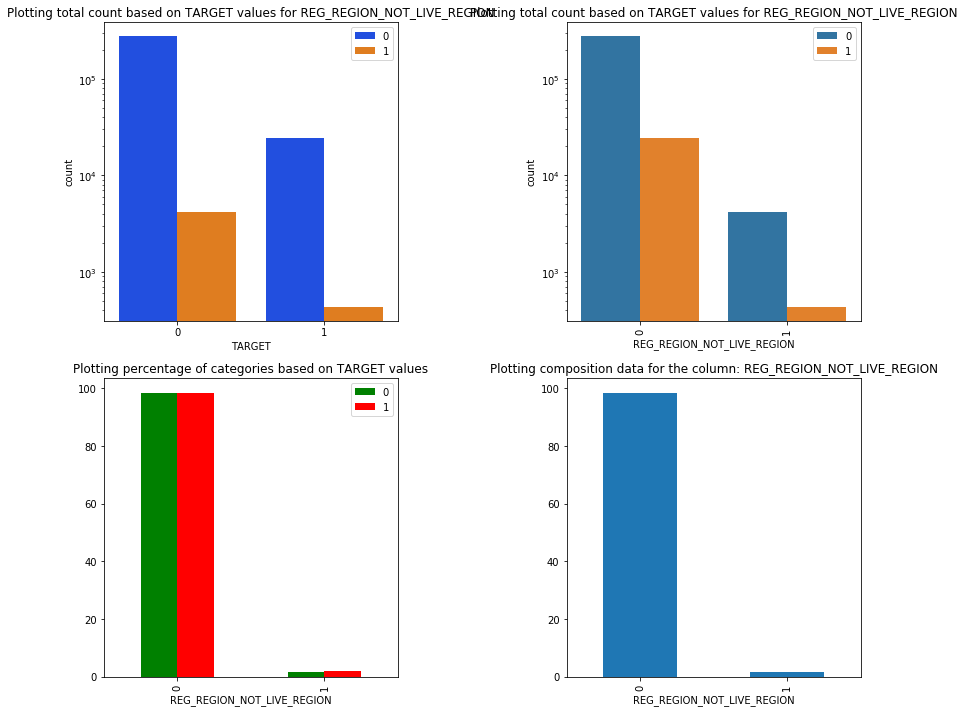

Plots for  REG_REGION_NOT_WORK_REGION


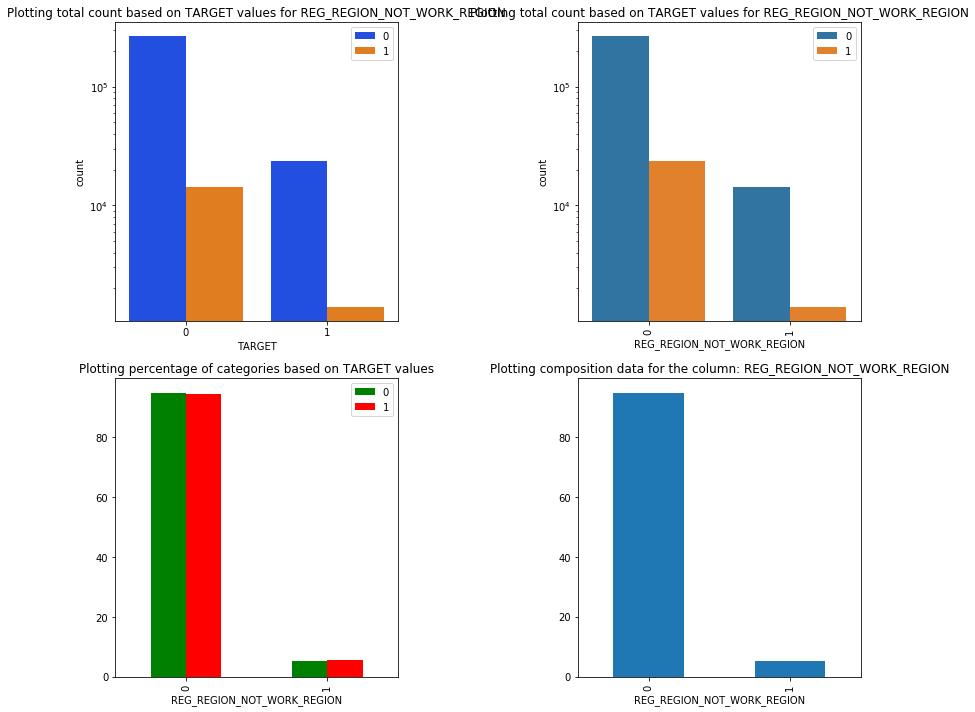

Plots for  LIVE_REGION_NOT_WORK_REGION


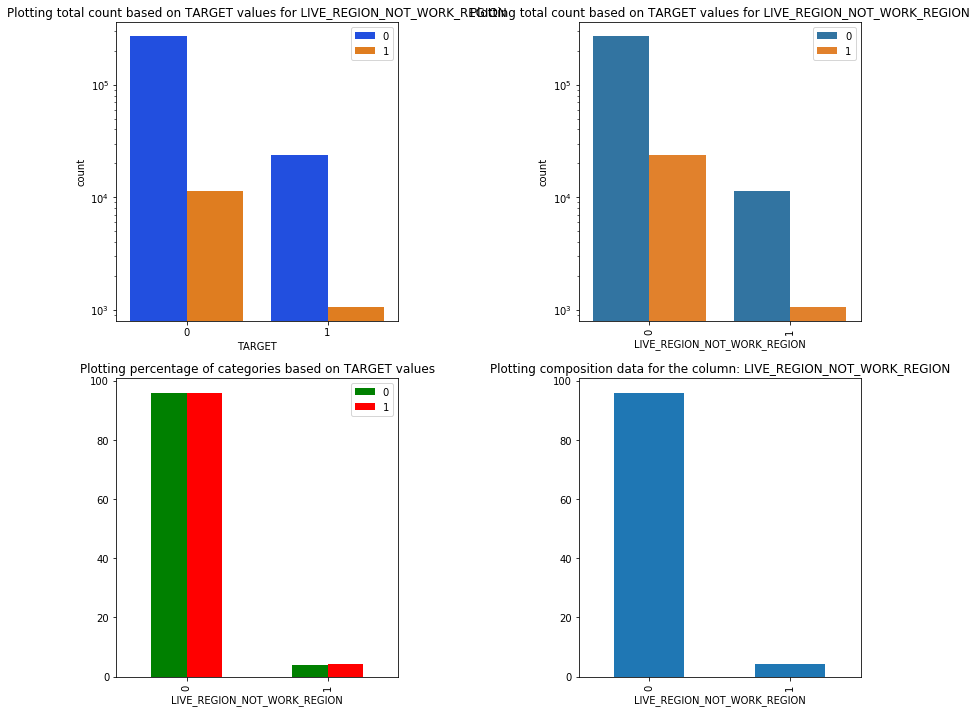

Plots for  REG_CITY_NOT_LIVE_CITY


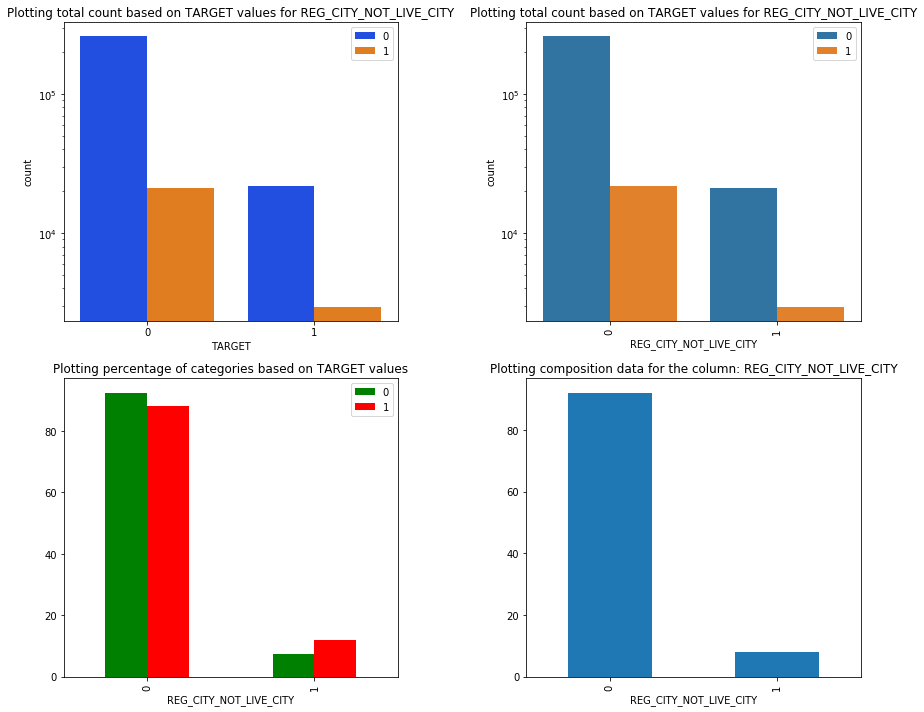

Plots for  REG_CITY_NOT_WORK_CITY


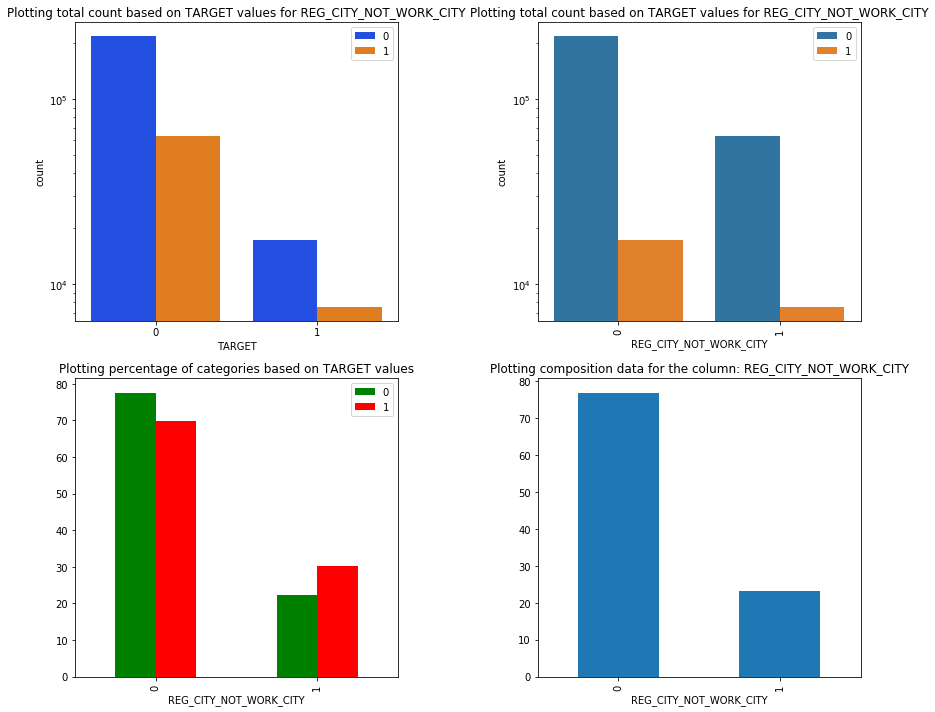

Plots for  LIVE_CITY_NOT_WORK_CITY


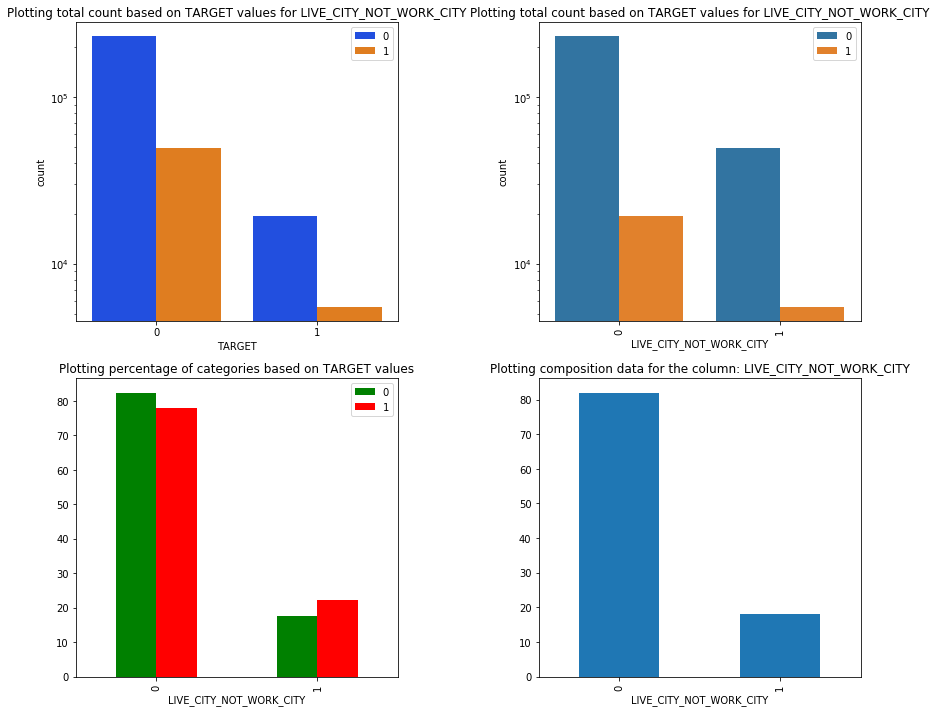

Plots for  AMT_ANNUITY_CAT


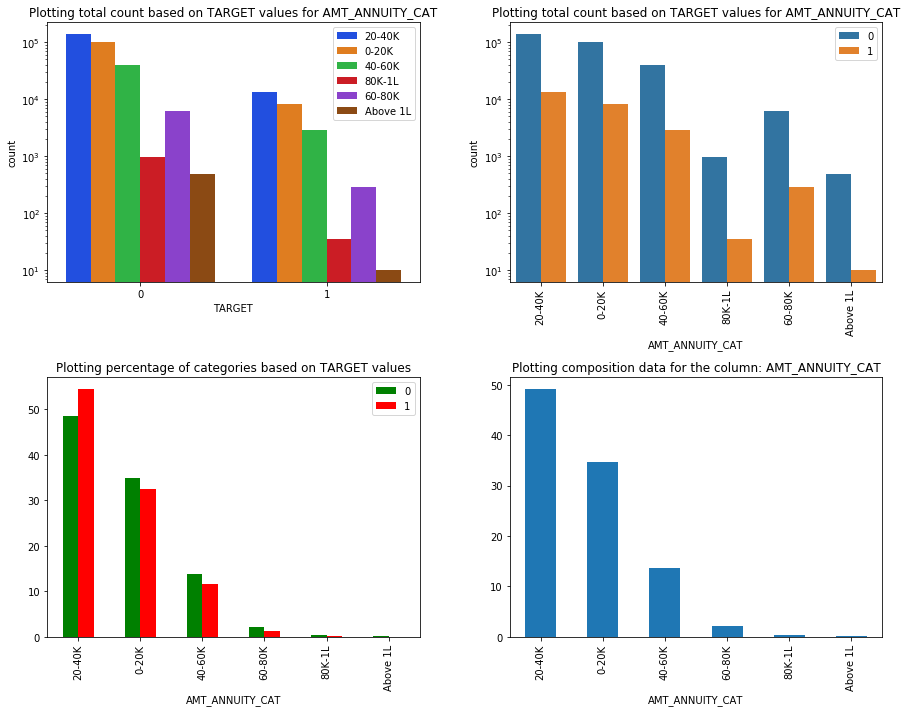

Plots for  AMT_GOODS_PRICE_CAT


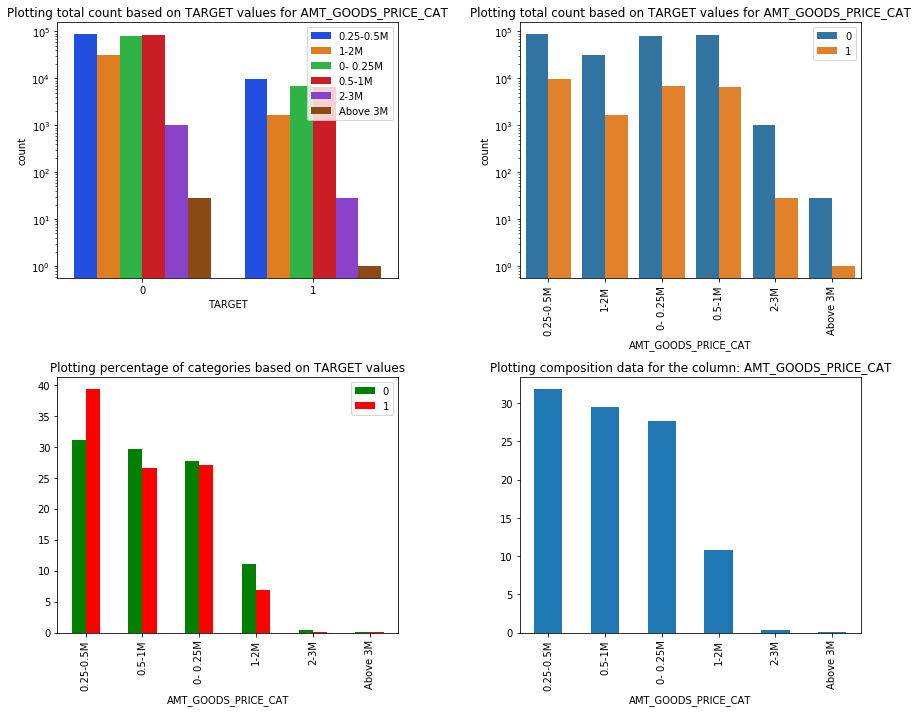

Plots for  AMT_INCOME_TOTAL_CAT


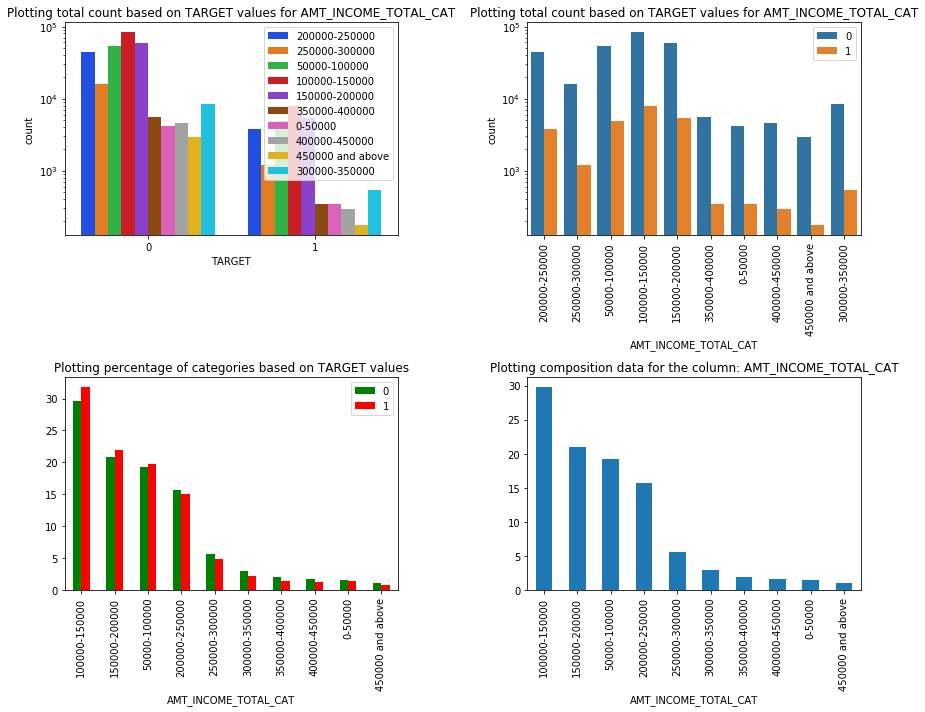

Plots for  AMT_CREDIT_CAT


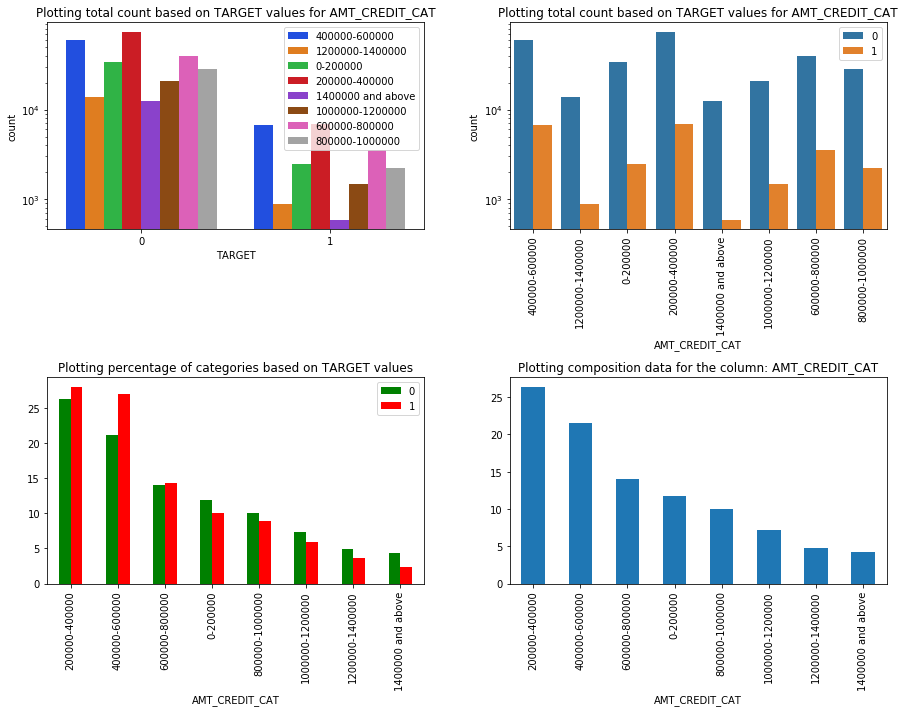

In [105]:
for column in objcols_ro:
    plotting_catdata(app_data,ad_0,ad_1,column)

###### Inference:
1.	Cash loan applicants are far higher than revolving loan applicants. But still around 10% of defaulters are from revolving loan applicants. 
2.	There are nearly twice female applicants than male applicants. Even though there are defaulters from both genders proportional to the gender counts, male applicants tend to default more than female applicants.	
3.	Clients from Region2 seems to be availing and getting more loans. People from region with rating 3 have high default percentage.
4.	Among all categories in INCOME_TYPE, working people get more number of loans and they tend to default more than other categories.
5.	Single/not married and civil marriage type constitute less percentage of loan applicants compared to married applicants. But they tend to default more when we compare the proportions. Nearly 20% of married applicants will default. 
6.	In Housing_TYPE, with parents and rented-apartment have more percentage of defaults on comparing to other categories.
7.	Very few loan applicants have different permanent address and contact address
8.	Annuity loan with 20-40K category tend to default more.
9.	Most applicants with AMT_GOOS_PRICE has value in range of 0 to 1 million. People from 0.25 to 1 million has high default percentage.
10.	Under occupation type, Laborers have highest composition. Nearly 10 to15 % of laborers default. Default percentage of drivers and sales staff are also high. 
11.	INCOME- Most loans applied from 100000-150000 bracket. Default ratio also high in 50000- 200000 range.
12.	Highest credits are given in 200000 – 600000 range. Hence default ratio also more in that range. Looks like 400000 – 600000 range of credit applicants defaults more.

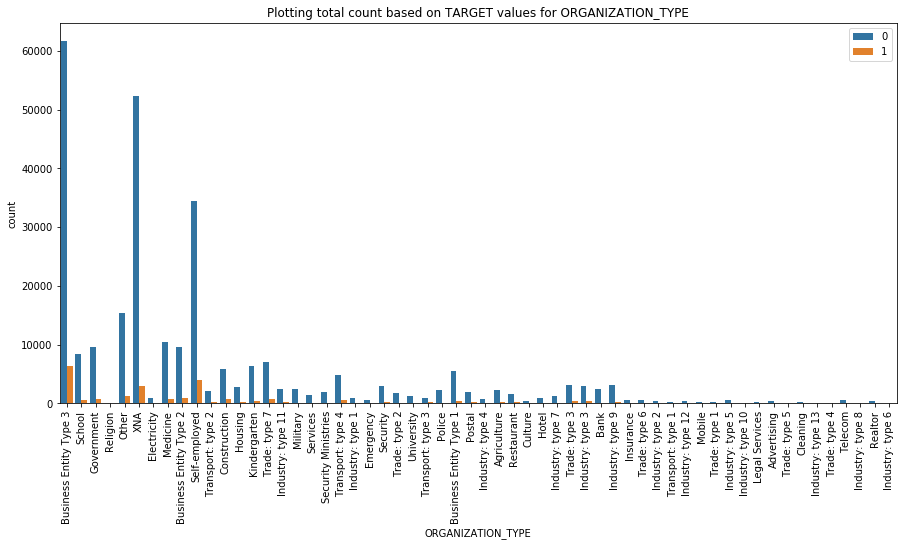

In [106]:
#Plot for 'ORGANIZATION_TYPE'
plt.figure(figsize=(15,7))
sns.countplot(x= 'ORGANIZATION_TYPE', hue = 'TARGET', data = app_data)
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.title('Plotting total count based on TARGET values for ORGANIZATION_TYPE')
plt.show()

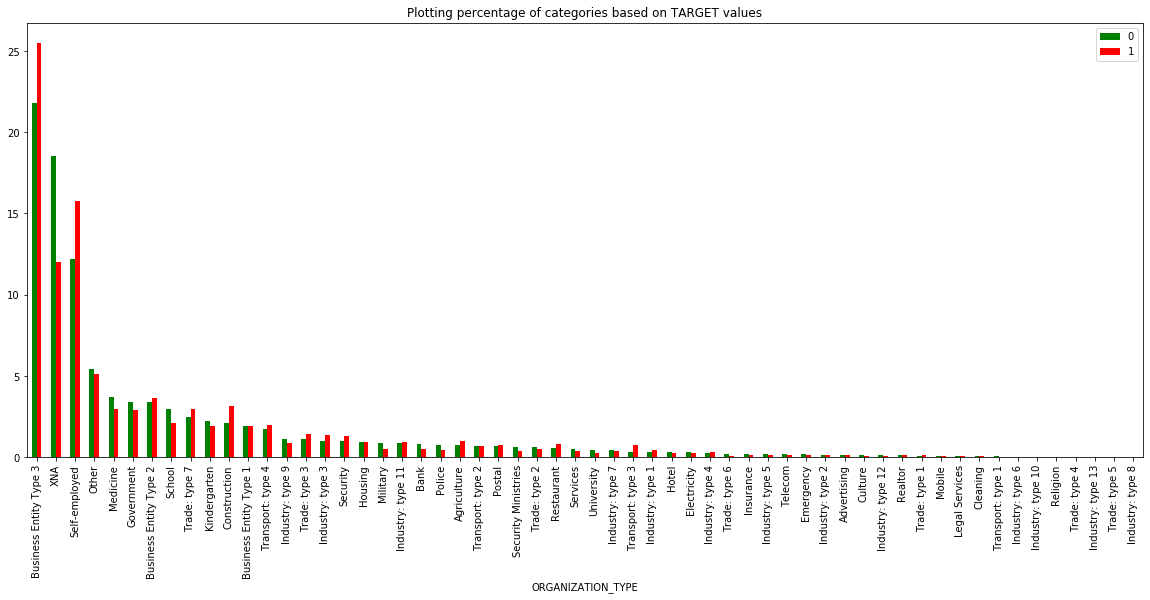

In [107]:

df = pd.DataFrame()
df['0']= ad_0['ORGANIZATION_TYPE'].value_counts(normalize=True)*100
df['1']= ad_1['ORGANIZATION_TYPE'].value_counts(normalize=True)*100
df.plot.bar(color=['green','red'],figsize=(20,8))
plt.xticks(rotation=90)
plt.xlabel('ORGANIZATION_TYPE')
plt.legend(loc='upper right')
plt.title('Plotting percentage of categories based on TARGET values')

plt.show()

In the ORGANIZATION_TYPE column, Buisness Entity Type 3 and Self-employed tend to be having high default percentage. Eventhough applicants from construction organization are less, it also has considerable defaulters.

### Univariate analysis for continuous variables


In [108]:
def distribution_t_categories(t0,t1,column,bins=None):
    plt.figure(figsize=(15,5))
    
    ax1=plt.subplot(1,2,1)
    sns.distplot(t0[~t0[column].isnull()][column],bins=bins,ax=ax1)
    plt.title('Distribution of '+column+ ' for non defaulter')
    
    ax2=plt.subplot(1,2,2)
    sns.distplot(t1[~t1[column].isnull()][column],bins=bins,ax=ax2)
    plt.title('Distribution of '+column+ ' for defaulter')
    
    plt.show()
    

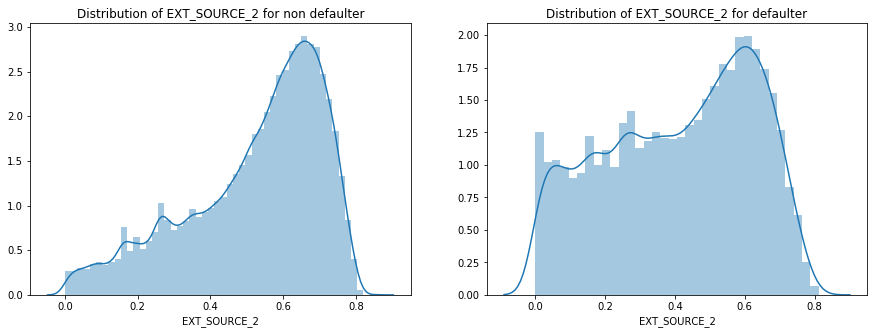

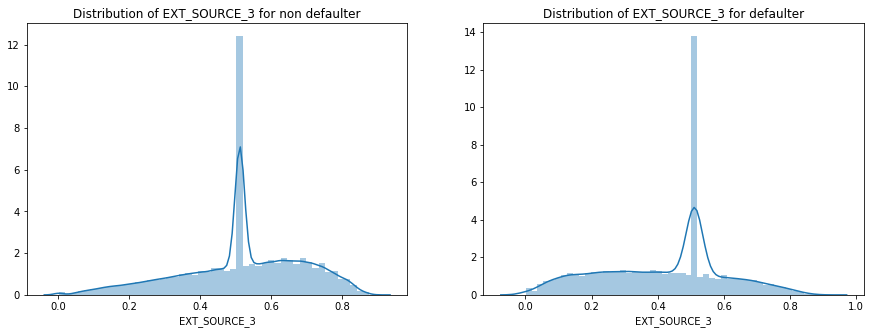

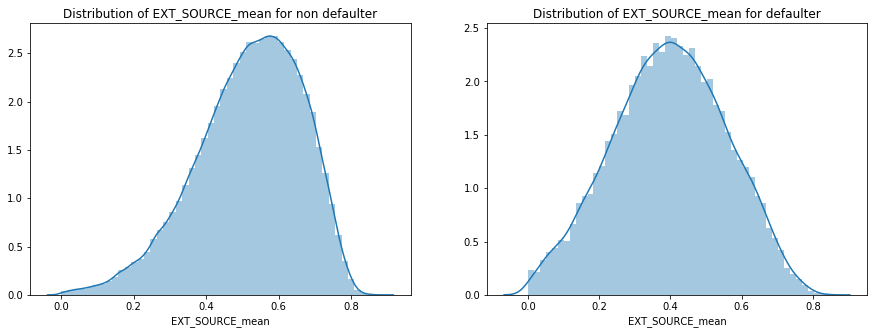

In [109]:
for col in ['EXT_SOURCE_2','EXT_SOURCE_3','EXT_SOURCE_mean']:
    distribution_t_categories(ad_0,ad_1,column=col)


###### Inference:
In case of EXT_SOURCE_2 score non-defaulter’s distribution, number of applicants with score between 0 and 0.3 are high compared to defaulters. This means that applicants with score <0.3 has higher chance to default.


## Bivariate analysis


##### Check correlation for numerical variables

In [110]:
# Finding correlation for numerical columns for both TARGET-0 and TARGET-1 

target0_corr = ad_0.iloc[0:,2:]
target1_corr = ad_1.iloc[0:,2:]

target0 = target0_corr.corr(method='pearson')
target1 = target1_corr.corr(method='pearson')

In [111]:
# Correlation for target 0 - Non-Defaulters

target0

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                       1.000             0.027       0.003   
AMT_INCOME_TOTAL                   0.027             1.000       0.343   
AMT_CREDIT                         0.003             0.343       1.000   
AMT_ANNUITY                        0.021             0.419       0.771   
AMT_GOODS_PRICE                   -0.001             0.349       0.987   
REGION_POPULATION_RELATIVE        -0.024             0.168       0.101   
DAYS_BIRTH                         0.337             0.063      -0.047   
DAYS_EMPLOYED                     -0.243            -0.141      -0.073   
DAYS_REGISTRATION                  0.186             0.065       0.013   
DAYS_ID_PUBLISH                   -0.029             0.023      -0.001   
CNT_FAM_MEMBERS                    0.879             0.034       0.065   
HOUR_APPR_PROCESS_START           -0.005             0.077       0.054   
EXT_SOURCE_2                      -0.015             0.140       0.129   
EXT_SOURCE_3                      -0.037            -0.059       0.034   
OBS_30_CNT_SOCIAL_CIRCLE           0.015            -0.030       0.000   
DEF_30_CNT_SOCIAL_CIRCLE          -0.002            -0.028      -0.019   
OBS_60_CNT_SOCIAL_CIRCLE           0.015            -0.030       0.000   
DEF_60_CNT_SOCIAL_CIRCLE          -0.002            -0.028      -0.022   
AMT_REQ_CREDIT_BUREAU_HOUR         0.000             0.003      -0.002   
AMT_REQ_CREDIT_BUREAU_DAY          0.001             0.008       0.005   
AMT_REQ_CREDIT_BUREAU_WEEK        -0.000             0.009       0.001   
AMT_REQ_CREDIT_BUREAU_MON         -0.008             0.059       0.055   
AMT_REQ_CREDIT_BUREAU_QRT         -0.004             0.018       0.022   
AMT_REQ_CREDIT_BUREAU_YEAR        -0.031             0.043      -0.028   
EXT_SOURCE_mean                   -0.066             0.079       0.140   
YEARS_BIRTH                       -0.337            -0.063       0.047   
YEARS_EMPLOYED                    -0.245            -0.140      -0.070   

                            AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                      0.021           -0.001   
AMT_INCOME_TOTAL                  0.419            0.349   
AMT_CREDIT                        0.771            0.987   
AMT_ANNUITY                       1.000            0.777   
AMT_GOODS_PRICE                   0.777            1.000   
REGION_POPULATION_RELATIVE        0.121            0.104   
DAYS_BIRTH                        0.012           -0.045   
DAYS_EMPLOYED                    -0.106           -0.071   
DAYS_REGISTRATION                 0.039            0.016   
DAYS_ID_PUBLISH                   0.014           -0.004   
CNT_FAM_MEMBERS                   0.076            0.063   
HOUR_APPR_PROCESS_START           0.054            0.063   
EXT_SOURCE_2                      0.127            0.136   
EXT_SOURCE_3                      0.025            0.036   
OBS_30_CNT_SOCIAL_CIRCLE         -0.012            0.000   
DEF_30_CNT_SOCIAL_CIRCLE         -0.022           -0.021   
OBS_60_CNT_SOCIAL_CIRCLE         -0.012            0.000   
DEF_60_CNT_SOCIAL_CIRCLE         -0.023           -0.023   
AMT_REQ_CREDIT_BUREAU_HOUR        0.003           -0.002   
AMT_REQ_CREDIT_BUREAU_DAY         0.002            0.006   
AMT_REQ_CREDIT_BUREAU_WEEK        0.012            0.001   
AMT_REQ_CREDIT_BUREAU_MON         0.036            0.057   
AMT_REQ_CREDIT_BUREAU_QRT         0.012            0.022   
AMT_REQ_CREDIT_BUREAU_YEAR       -0.006           -0.030   
EXT_SOURCE_mean                   0.125            0.147   
YEARS_BIRTH                      -0.012            0.045   
YEARS_EMPLOYED                   -0.105           -0.069   

                            REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
CNT_CHILDREN                                    -0.024       0.337   
AMT_INCOME_TOTAL                                 0.168       0.063   
AMT_CREDIT                                       0.101      -0.0

In [113]:
# Correlation for target 1 - Defaulters

target1

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                       1.000             0.005      -0.002   
AMT_INCOME_TOTAL                   0.005             1.000       0.038   
AMT_CREDIT                        -0.002             0.038       1.000   
AMT_ANNUITY                        0.031             0.046       0.752   
AMT_GOODS_PRICE                   -0.008             0.038       0.983   
REGION_POPULATION_RELATIVE        -0.032             0.009       0.069   
DAYS_BIRTH                         0.259             0.003      -0.135   
DAYS_EMPLOYED                     -0.192            -0.015      -0.001   
DAYS_REGISTRATION                  0.149             0.000      -0.026   
DAYS_ID_PUBLISH                   -0.032            -0.004      -0.052   
CNT_FAM_MEMBERS                    0.885             0.007       0.051   
HOUR_APPR_PROCESS_START           -0.024             0.014       0.032   
EXT_SOURCE_2                      -0.012             0.007       0.120   
EXT_SOURCE_3                      -0.024            -0.018       0.052   
OBS_30_CNT_SOCIAL_CIRCLE           0.026            -0.005       0.020   
DEF_30_CNT_SOCIAL_CIRCLE           0.002            -0.005      -0.026   
OBS_60_CNT_SOCIAL_CIRCLE           0.025            -0.005       0.020   
DEF_60_CNT_SOCIAL_CIRCLE          -0.005            -0.005      -0.030   
AMT_REQ_CREDIT_BUREAU_HOUR         0.000             0.001      -0.004   
AMT_REQ_CREDIT_BUREAU_DAY         -0.011             0.000       0.004   
AMT_REQ_CREDIT_BUREAU_WEEK        -0.009             0.001       0.011   
AMT_REQ_CREDIT_BUREAU_MON         -0.009             0.006       0.056   
AMT_REQ_CREDIT_BUREAU_QRT         -0.013             0.001      -0.007   
AMT_REQ_CREDIT_BUREAU_YEAR        -0.022             0.007      -0.009   
EXT_SOURCE_mean                   -0.039             0.004       0.153   
YEARS_BIRTH                       -0.259            -0.003       0.135   
YEARS_EMPLOYED                    -0.193            -0.015       0.002   

                            AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                      0.031           -0.008   
AMT_INCOME_TOTAL                  0.046            0.038   
AMT_CREDIT                        0.752            0.983   
AMT_ANNUITY                       1.000            0.753   
AMT_GOODS_PRICE                   0.753            1.000   
REGION_POPULATION_RELATIVE        0.072            0.076   
DAYS_BIRTH                       -0.014           -0.136   
DAYS_EMPLOYED                    -0.083            0.004   
DAYS_REGISTRATION                 0.034           -0.026   
DAYS_ID_PUBLISH                  -0.017           -0.056   
CNT_FAM_MEMBERS                   0.076            0.047   
HOUR_APPR_PROCESS_START           0.031            0.044   
EXT_SOURCE_2                      0.116            0.131   
EXT_SOURCE_3                      0.032            0.053   
OBS_30_CNT_SOCIAL_CIRCLE          0.005            0.021   
DEF_30_CNT_SOCIAL_CIRCLE         -0.022           -0.021   
OBS_60_CNT_SOCIAL_CIRCLE          0.006            0.021   
DEF_60_CNT_SOCIAL_CIRCLE         -0.027           -0.026   
AMT_REQ_CREDIT_BUREAU_HOUR        0.013           -0.002   
AMT_REQ_CREDIT_BUREAU_DAY         0.000            0.005   
AMT_REQ_CREDIT_BUREAU_WEEK        0.029            0.011   
AMT_REQ_CREDIT_BUREAU_MON         0.049            0.059   
AMT_REQ_CREDIT_BUREAU_QRT        -0.007           -0.006   
AMT_REQ_CREDIT_BUREAU_YEAR       -0.007           -0.012   
EXT_SOURCE_mean                   0.118            0.163   
YEARS_BIRTH                       0.014            0.136   
YEARS_EMPLOYED                   -0.081            0.007   

                            REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
CNT_CHILDREN                                    -0.032       0.259   
AMT_INCOME_TOTAL                                 0.009       0.003   
AMT_CREDIT                                       0.069      -0.1

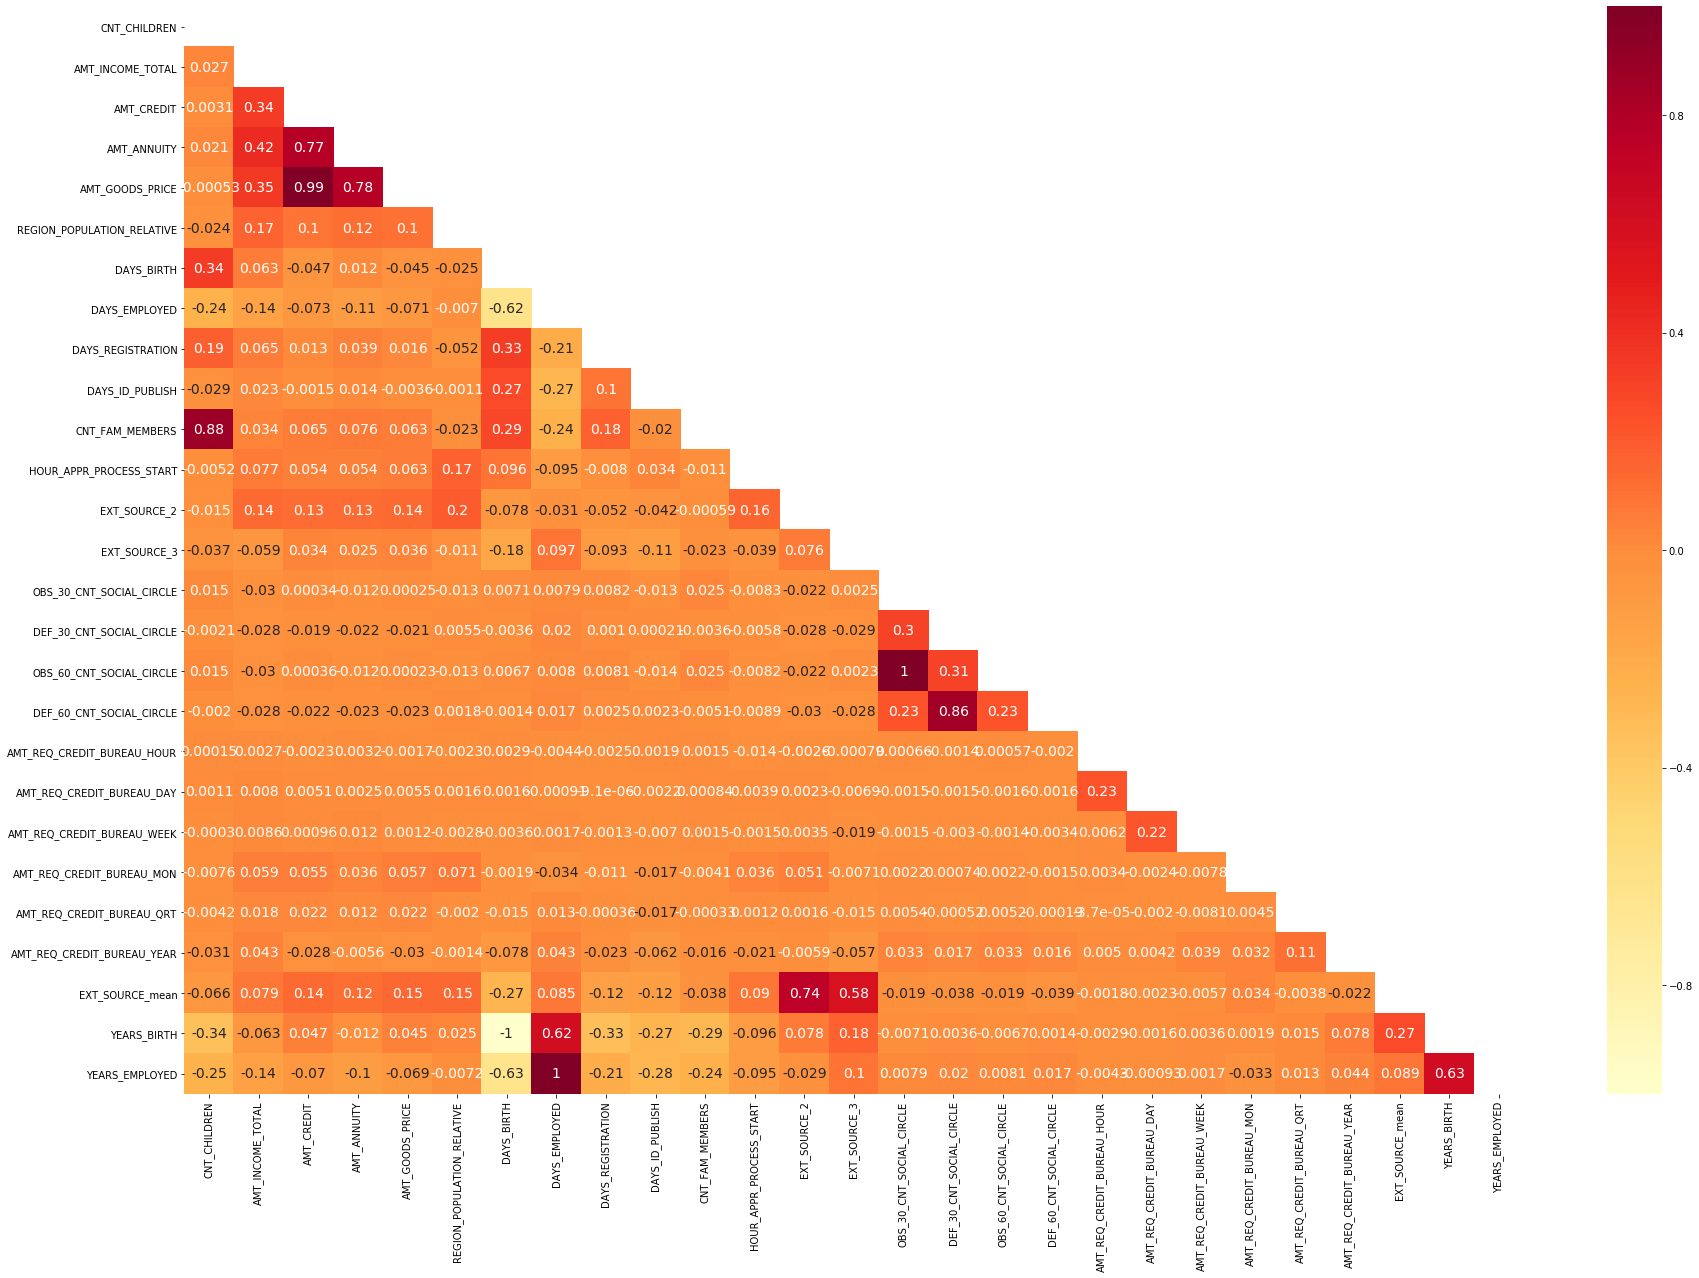

In [114]:
#Plot heatmap for correlation of non-defaulters.
msk = np.zeros_like(target0)
msk[np.triu_indices_from(msk)] = True
plt.figure(figsize=(30,20))
sns.heatmap(target0,cmap="YlOrRd",mask=msk,annot=True,annot_kws={"fontsize":14},center=0)
plt.show()

##### Inferences: 
- AMT_INCOME_TOTAL is positively correlated to AMT_ANNUITY. As income increases annuity savings can also  increase.
- AMT_ANNUITY has high positive correlation with AMT_CREDITED. People with high ANNUITY savings are given high  credits.
- AMT_GOODS_PRICE has the highest correlation with AMT_CREDIT  compared to all other values. As credit is based on  the goods price, these two are highly correlated.
- AMT_GOODS_PRICE also has high correlation with AMT_ANNUITY.
- DAYS_EMPLOYED and DAYS_BIRTH has high correlation
- EXT_SOURCE_mean(scores) is positively related to REGION_POPULATION_RELATIVE and DAYS_BIRTH. 
- OBS_30_CNT_SOCIAL_CIRCLE and  OBS_60_CNT_SOCIAL_CIRCLE has a correlation coefficient of one, which could mean  that both variables contain exactly same data. Or it could mean that with in 60 days of duration data is not changing for a same social circle
- The income,AMT_ANNUITY is higher in densely populated area.
- Count of family members increases with count of children.

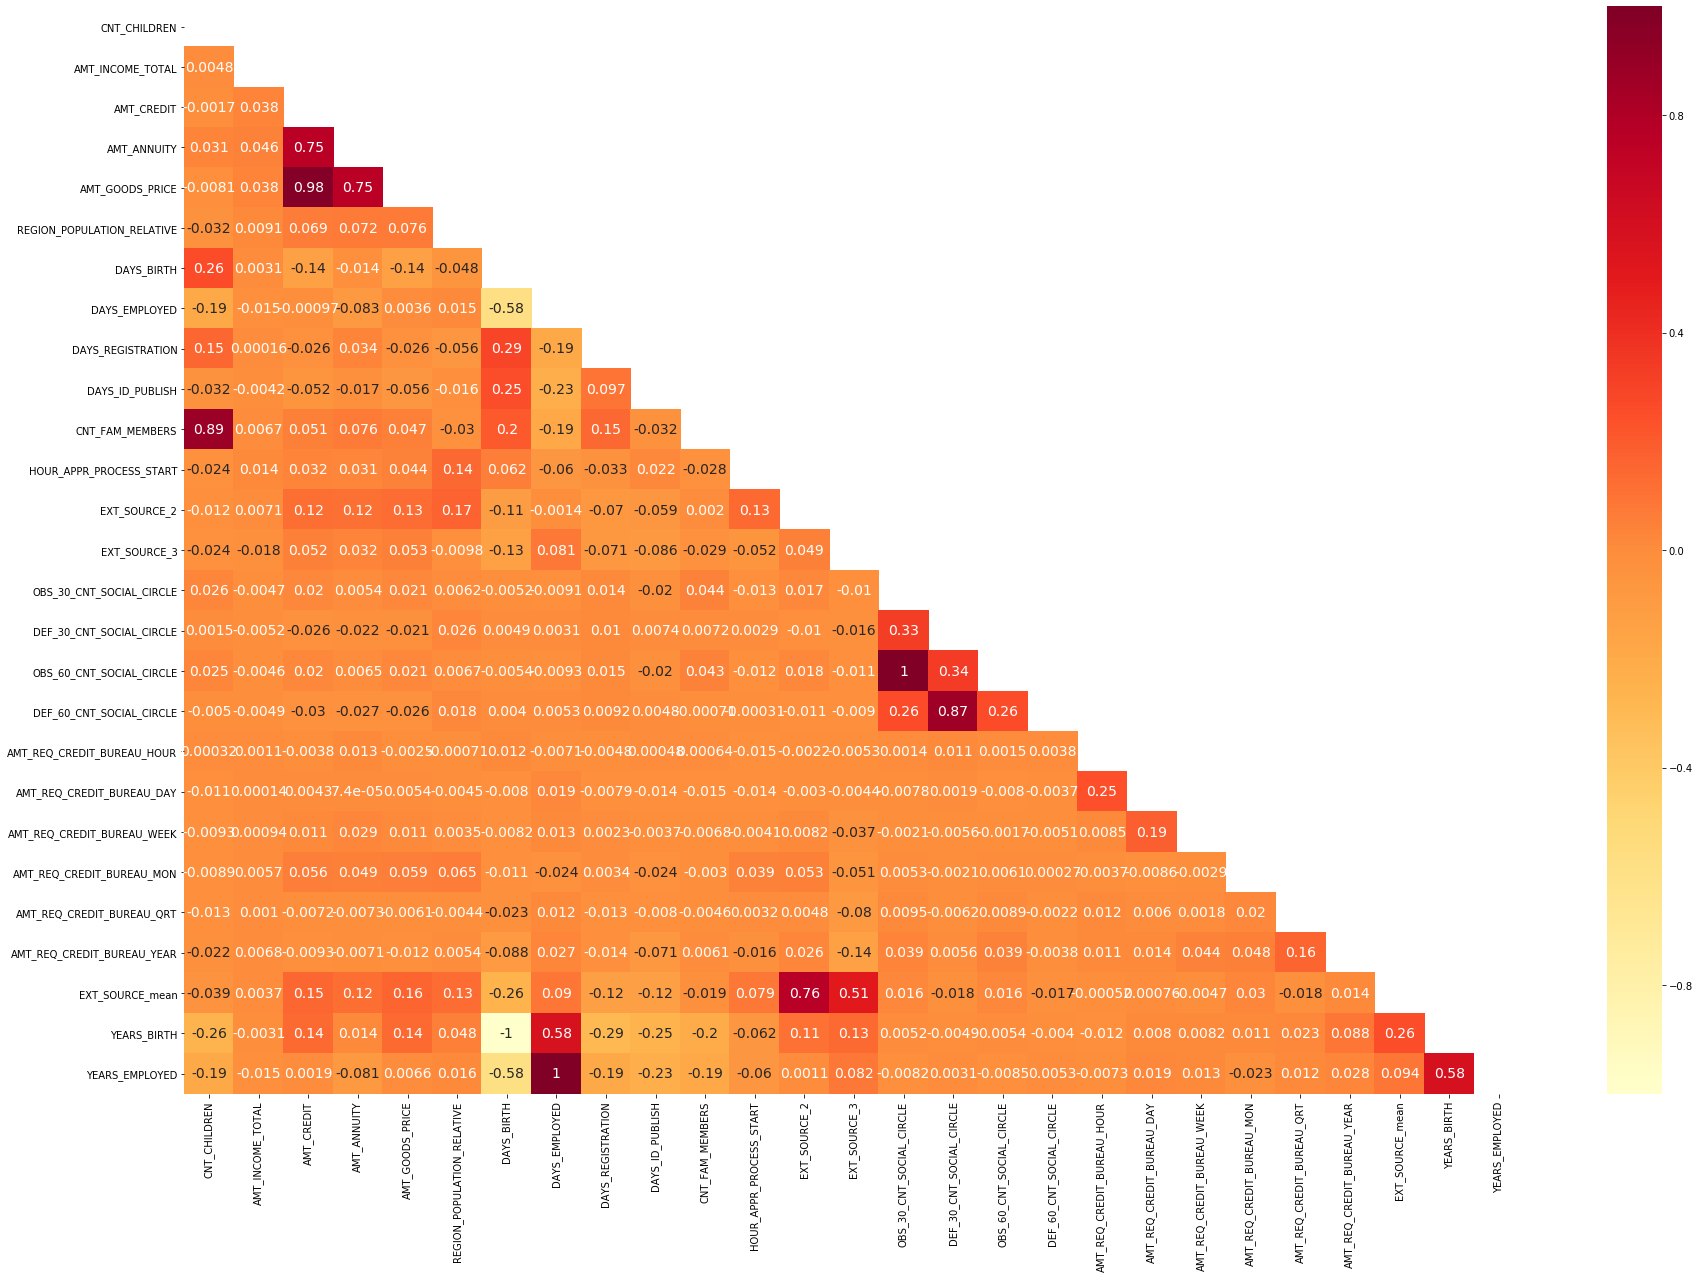

In [115]:
#Plot heatmap for correlation of defaulters.
msk1 = np.zeros_like(target1)
msk1[np.triu_indices_from(msk1)] = True
plt.figure(figsize=(30,20))
sns.heatmap(target1,cmap="YlOrRd",mask=msk1,annot=True,annot_kws={"fontsize":14},center=0)
plt.show()

###### Inference:
- When AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE had a correlation greater than 0.3 with AMT_INCOME_TOTAL in case of non-defaulters, it is less than 0.04 in case of defaulters. This could mean that for defaulters even if AMT_INCOME_TOTAL increases, there will not be a corresponding increase in AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE.
- Similar to non-defauters correlation, in the cae of defaulters also AMT_CREDIT has high correlation with AMT_ANNUITY and AMT_GOODS_PRICE.
- In case of correlation between DAYS_EMPLOYED and DAYS_BIRTH, it is less for defaulters compared to non-defaulters.
- EXT_SOURCE_mean has slight correlation with AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE and DAYS_BIRTH for both defaulters and non-defaulters.


###### Doing Categorical Analysis for target=0(client with no payment difficulties) with CODE_GENDER

In [120]:
#Defining a custom method for plots:

def plot_def(df,col,title,plottype,hue =None):

    
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] =14
    plt.rcParams['axes.titlesize'] = 15
    plt.rcParams['axes.titlepad'] = 18
    
    if plottype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(25,20))
        ax[0].set_title(title)
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title(title)
        sns.boxplot(data =df, x=col,ax=ax[1],orient='v')
    
    if plottype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        plt.xticks(rotation=45)
        plt.yscale('log')
        plt.title(title)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette = "Blues_r")
        ax.legend(loc='upper right')
    else:
        exit
        
    plt.show()

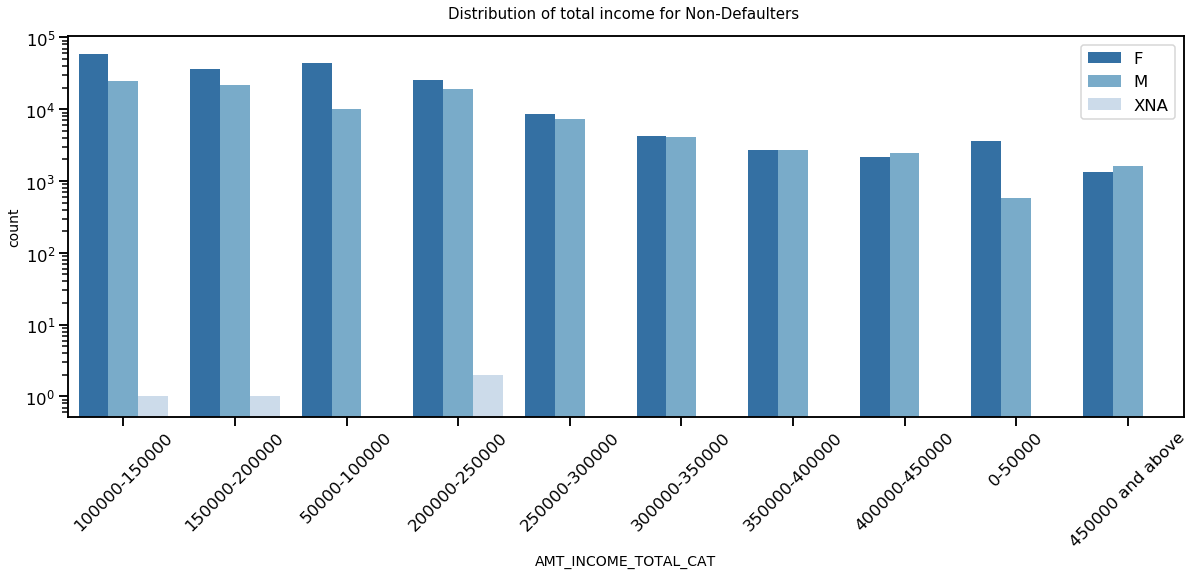

In [121]:
# PLotting for AMT_INCOME_TOTAL_CAT

plot_def(ad_0,col='AMT_INCOME_TOTAL_CAT',title='Distribution of total income for Non-Defaulters ',plottype = 1,hue='CODE_GENDER')


###### Inferences:
- For Non-Defaulters, Female counts are higher than male.
- Income range from 100000 to 150000 is having higher income.
- Female applicants have more income in almost all ranges than male applicants


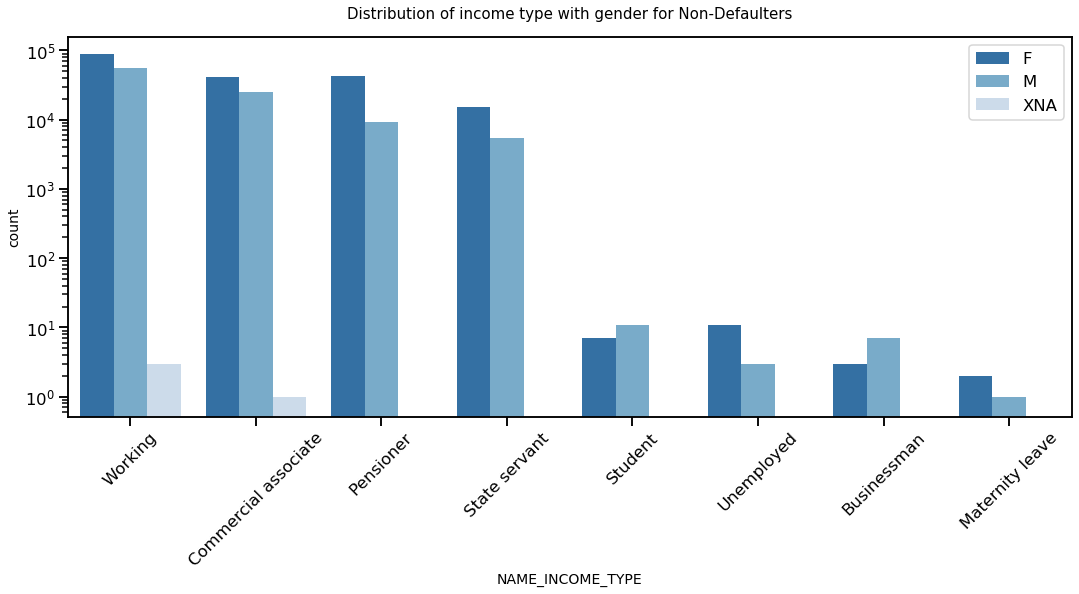

In [122]:
# PLotting for NAME_INCOME_TYPE

plot_def(ad_0,col='NAME_INCOME_TYPE',title='Distribution of income type with gender for Non-Defaulters',plottype = 1,hue='CODE_GENDER')

#### Inferences:
- Most loan applicants belong to income type ‘working’, ’commercial associate’, 'Pensioner', and ‘State Servant’.

- For The above three mentioned categories, Females are more in number than male.

- Less number of applicants from income type ‘student’ , ‘Businessman’ and ‘Maternity leave’.

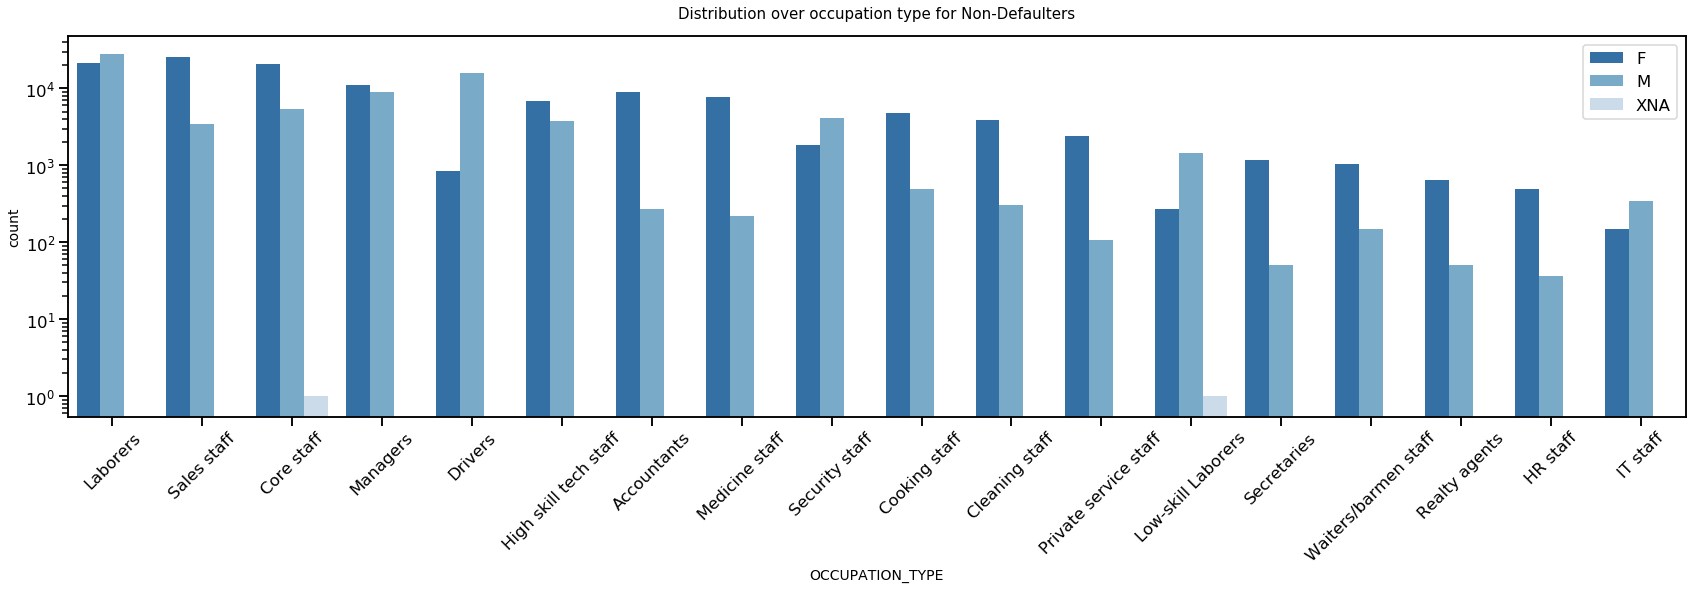

In [123]:
# PLotting for OCCUPATION_TYPE

plot_def(ad_0,col='OCCUPATION_TYPE',title='Distribution over occupation type for Non-Defaulters',plottype = 1,hue='CODE_GENDER')

##### Inferences :
- Female counts are less compared to male in the categories of Laborers,Drivers,Security Staff,Low-skill, laborers and IT staff.

- Female counts are very high as compared to male in the Sales staff,Core staff,Accountants and Medicine staff.

###### Doing Categorical Analysis for target=1(client with payment difficulties) with CODE_GENDER

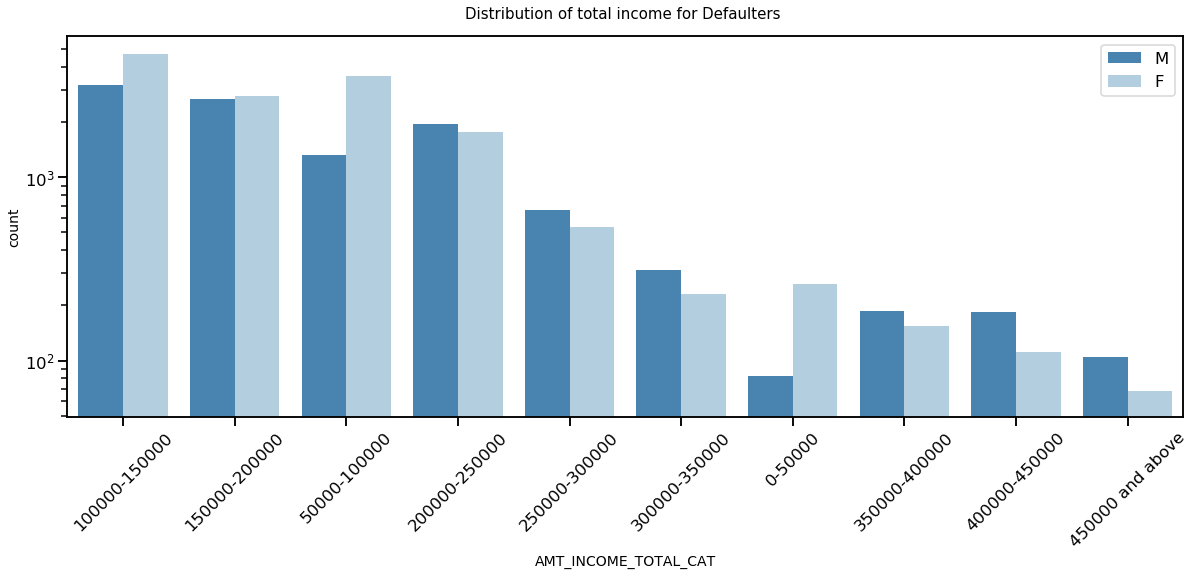

In [124]:
# PLotting for AMT_INCOME_TOTAL_CAT

plot_def(ad_1,col='AMT_INCOME_TOTAL_CAT',title='Distribution of total income for Defaulters ',plottype = 1,hue='CODE_GENDER')

#### Inferences:
1.For Defaulters, Female counts are nearly equal for most of the categories as compared to male.

2.Income range from 100000 to 150000 is having a greater counts.

3.Lowest counts in the income ranges for males and females in above 450000.

###### For Target-0 - Non-Defaulters

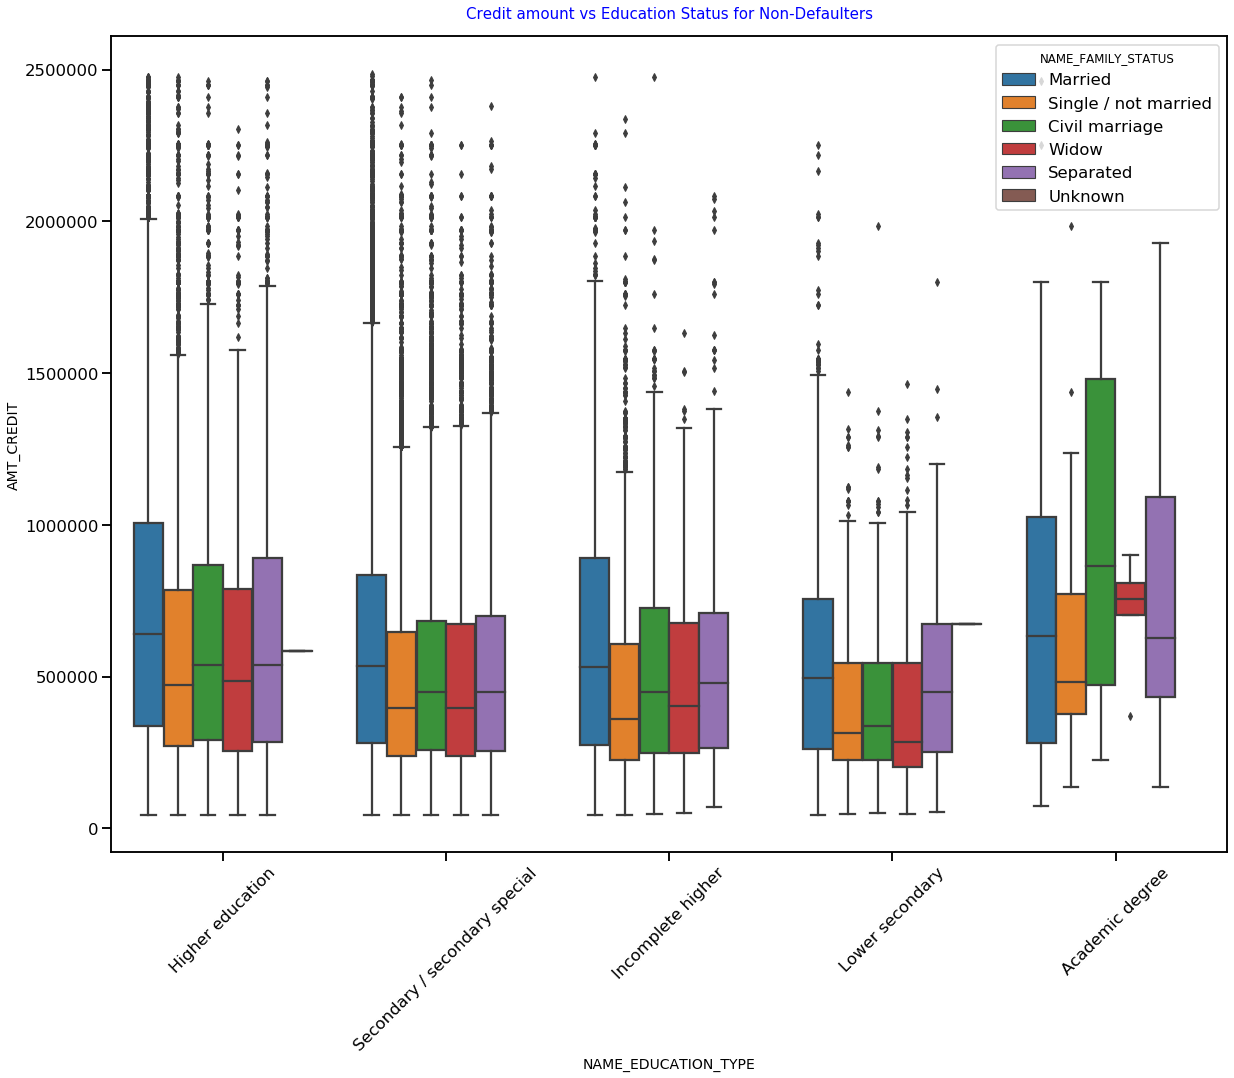

In [125]:
# Box plotting for Credit amount

plt.figure(figsize=(20,15))
plt.xticks(rotation=45)
sns.boxplot(data =ad_0[ad_0.AMT_CREDIT<2517300], x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status for Non-Defaulters',color="blue")
plt.show()

People under Civil marriage with academic degree has highest median credit amount in case of non-defaulters.

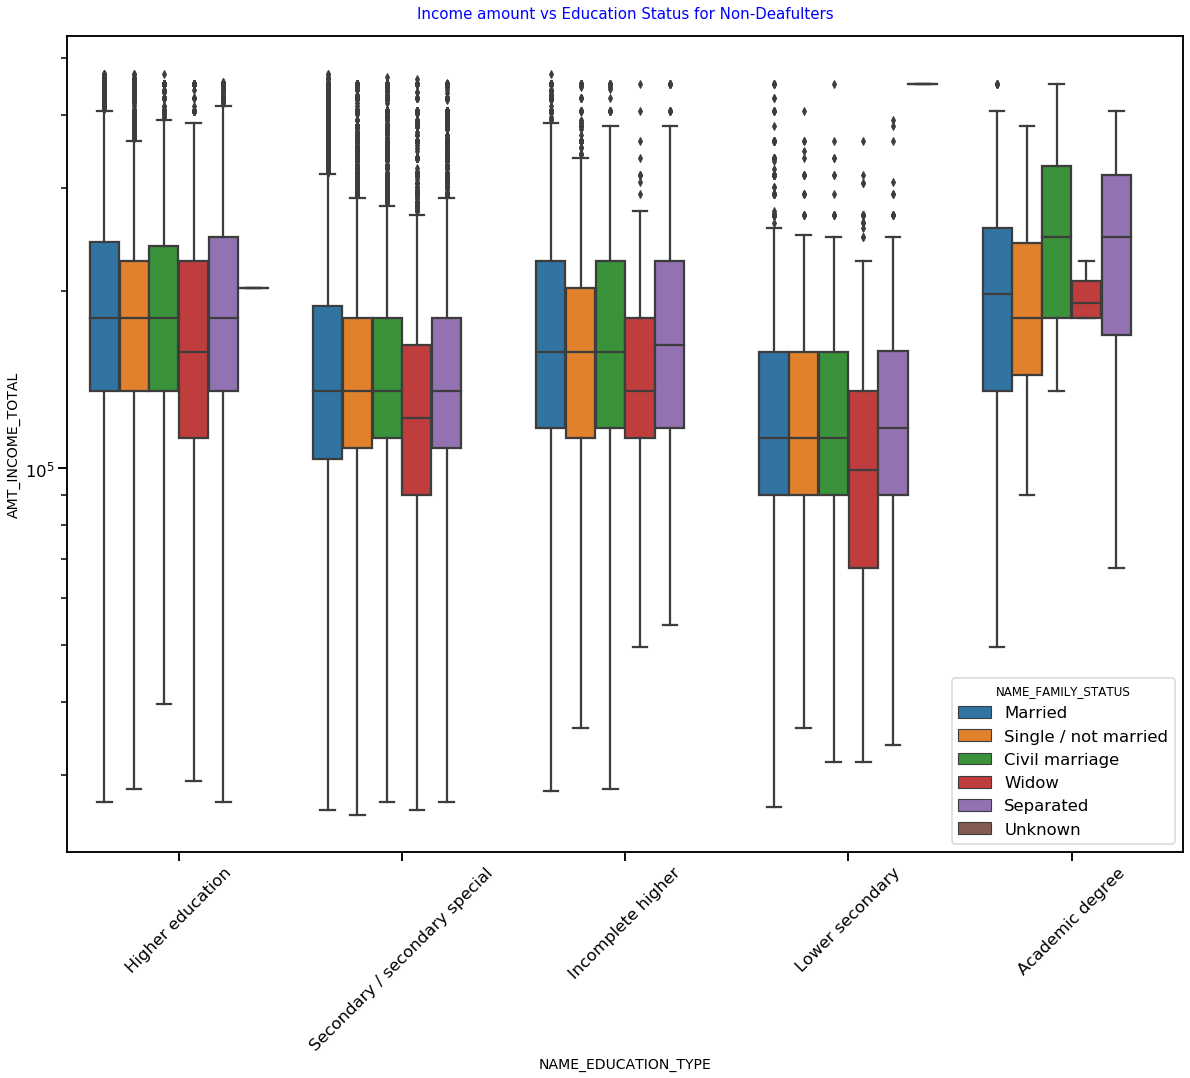

In [126]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(20,15))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =ad_0[ad_0.AMT_INCOME_TOTAL<472500], x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status for Non-Deafulters',color="blue")
plt.show()

#### Inference:
1.Least number of outliers in income are present for applicants with Academic degree & the median income  is mostly higher than that of all other education categories.

2.When compared to others, people with Lower secondary education and widow status have less income amount.

3.Except for Academic degree holders, in all other education categories, median income is almost same for all family statuses with widow as an exception.

### For Target 1 - Defaulters

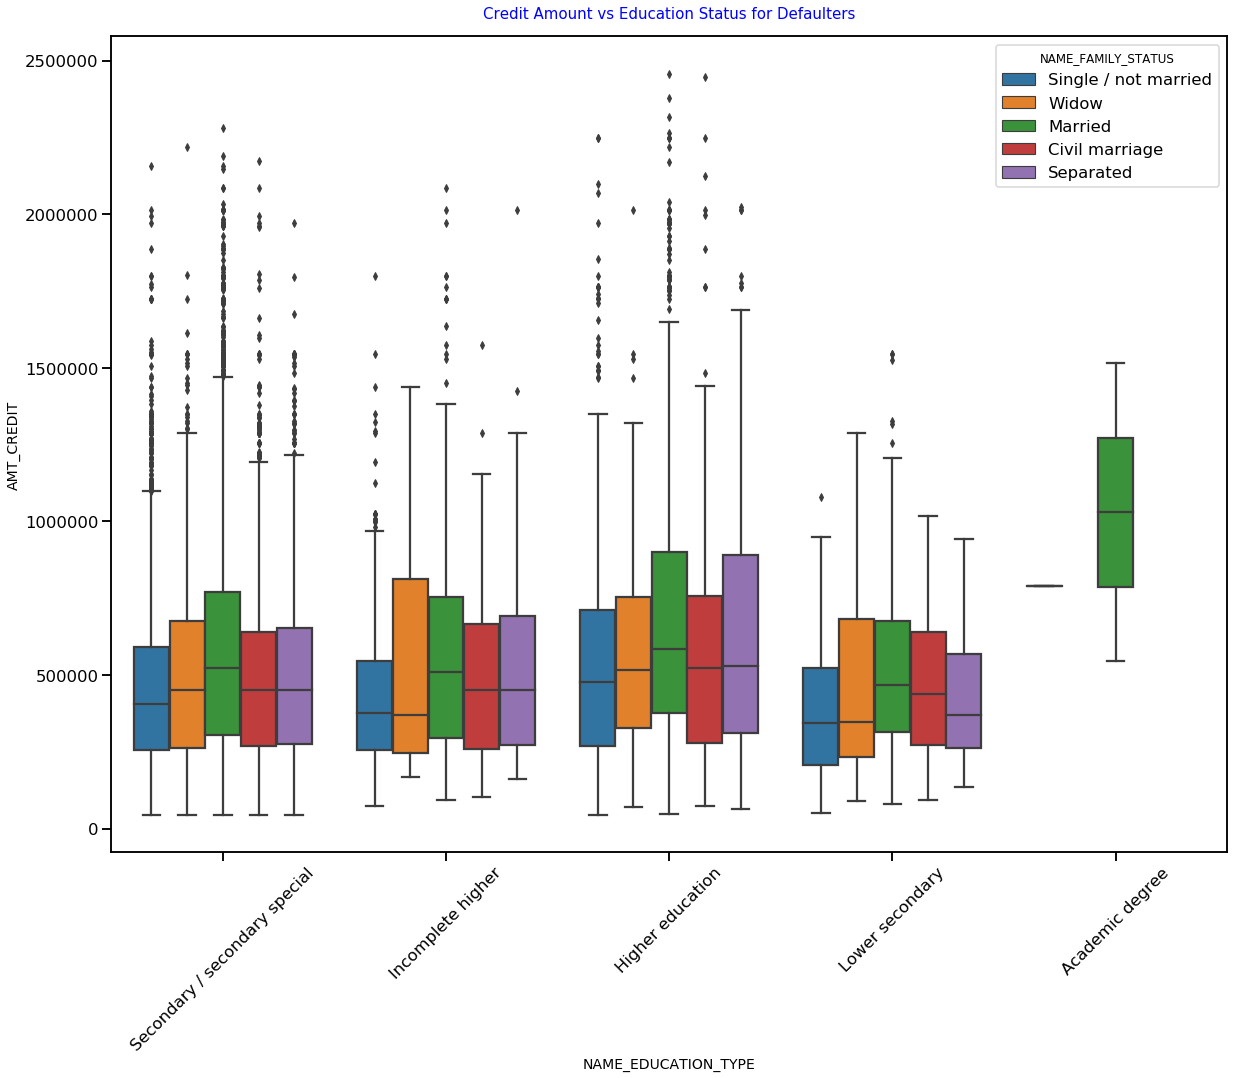

In [127]:
# Box plotting for credit amount

plt.figure(figsize=(20,15))
plt.xticks(rotation=45)
sns.boxplot(data =ad_1[ad_1.AMT_CREDIT<2517300], x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status for Defaulters',color="blue")
plt.show()

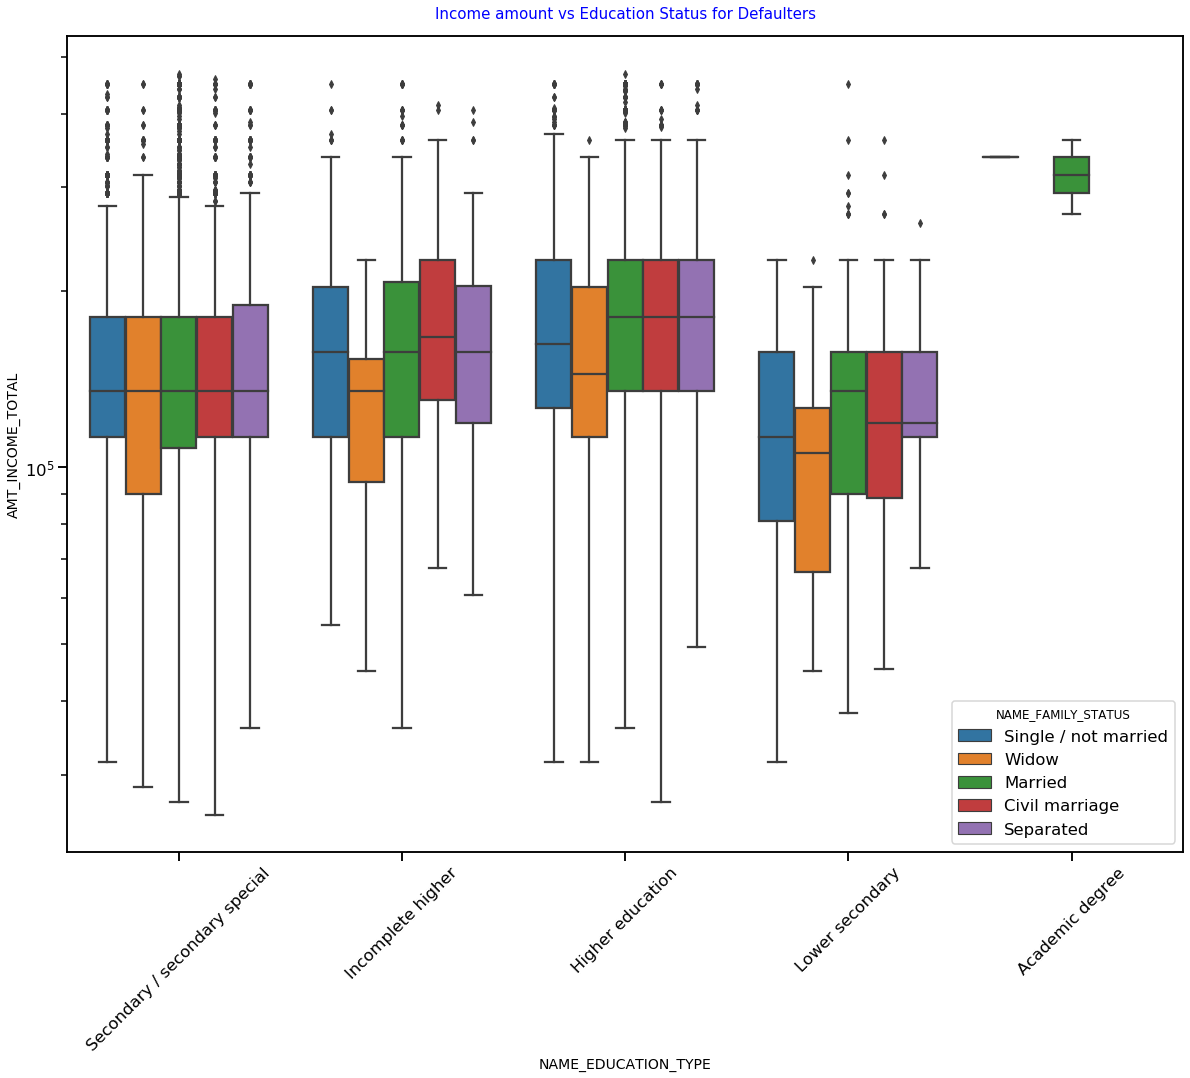

In [128]:
# Analysis for income vs education status for defaulters
# Box plotting for Income amount in logarithmic scale, ignoring income outlier values

plt.figure(figsize=(20,15))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =ad_1[ad_1.AMT_INCOME_TOTAL<472500], x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status for Defaulters',color="blue")
plt.show()

### Inference:
1. People with Academic degree tend to default less. Even then married people with academic category defaults.

2. The income amount is higher for Academic degree than Higher education with minimum number of outliers.

3. Lower secondary have less income amount than others.

4. More number of outliers are present for Married status people who are secondary/ secondary special qualified.

In [129]:
# Analyse heatmap for NAME_EDUCATION_TYPE vs AMT_INCOME_TOTAL_CAT vs TARGET(defaulters)
def1=pd.pivot_table(data=app_data,index='NAME_EDUCATION_TYPE',columns='AMT_INCOME_TOTAL_CAT',values='TARGET')


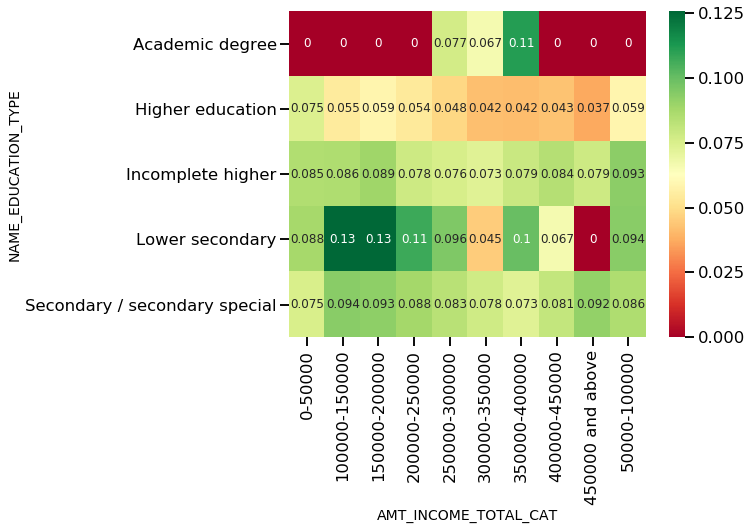

In [130]:
plt.figure(figsize=(8,6))
sns.heatmap(def1,annot=True,cmap='RdYlGn',annot_kws={"fontsize":12})
plt.show()

###### Inference:
High percentage of defaulters come from Lower secondary education background with income range 100000-200000.
Even though academic degree education background with all income ranges show very less or zero percentage of defaulters,350000 to 400000 income range has few defaulters.


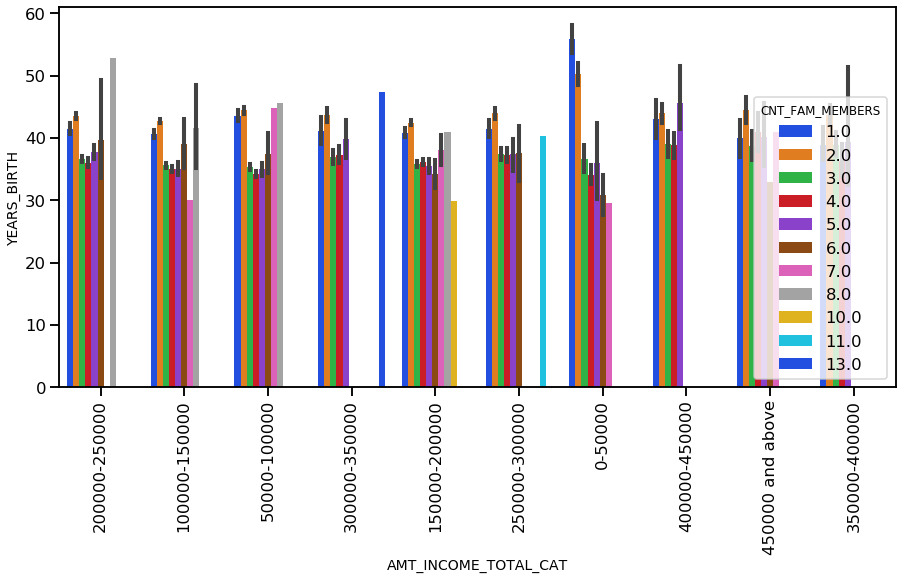

In [132]:
# Relation between AMT_INCOME_TOTAL_CAT,YEARS_BIRTH and CNT_FAM_MEMBERS among defaulters.
plt.figure(figsize=(15,7))
sns.barplot(x='AMT_INCOME_TOTAL_CAT',y='YEARS_BIRTH',hue='CNT_FAM_MEMBERS',data=ad_1,palette='bright')
plt.xticks(rotation=90)
plt.show()

Inference:
In all income categories, applicant with only 1 or 2 family member has age above 40. Almost all defaulters are above 30.

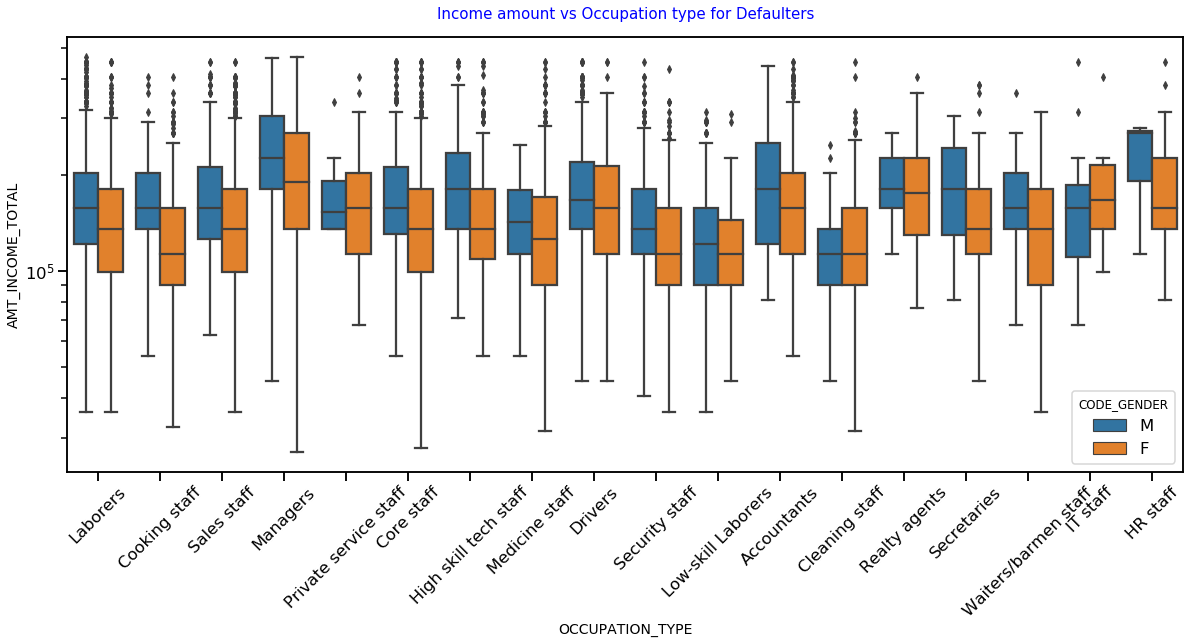

In [133]:
#Analysis Income amount vs Occupation type for Defaulters
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =ad_1[ad_1.AMT_INCOME_TOTAL<472500], x='OCCUPATION_TYPE',y='AMT_INCOME_TOTAL',hue='CODE_GENDER',orient='v')
plt.title('Income amount vs Occupation type for Defaulters',color="blue")
plt.show()

###### Inference
In case of defaulters median income for females are less than male median income for all occupation types.
Managers have higher income among other default occupation types.

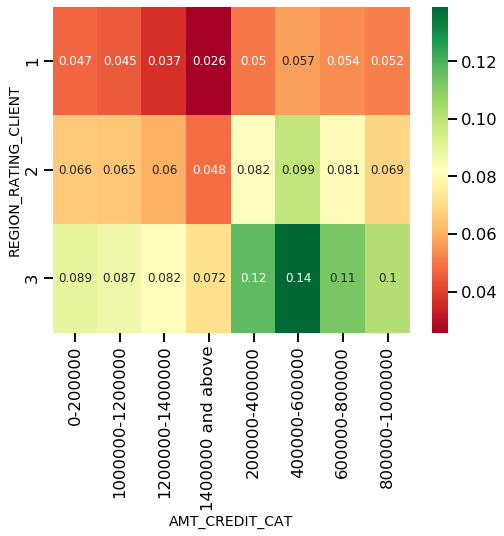

In [134]:
# Analyse REGION_RATING_CLIENT vs AMT_CREDIT_CAT for Defaulters
def2=pd.pivot_table(data=app_data,index='REGION_RATING_CLIENT',columns='AMT_CREDIT_CAT',values='TARGET')
plt.figure(figsize=(8,6))
sns.heatmap(def2,annot=True,cmap='RdYlGn',annot_kws={"fontsize":12})
plt.show()

We can observe more defaulters from client region rated 3 with credit amount between 200000 to 800000 which is a middle range value of credit.

## Analysis with Previous Loan Application

### Reading Second Data file and perform Cleaning

In [135]:
# Read the csv file using 'read_csv'.
pre_data = pd.read_csv("previous_application.csv")

In [136]:
# Printing the shape and no. of dimension of the dataframe

print("Shape : ",pre_data.shape)
print("Dimensions : ",pre_data.ndim)

Shape :  (1670214, 37)
Dimensions :  2


In [137]:
# Print description of statistical information for all columns

pre_data.describe()

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
count 1670214.000 1670214.000  1297979.000      1670214.000 1670213.000   
mean  1923089.135  278357.174    15955.121       175233.860  196114.021   
std    532597.959  102814.824    14782.137       292779.762  318574.617   
min   1000001.000  100001.000        0.000            0.000       0.000   
25%   1461857.250  189329.000     6321.780        18720.000   24160.500   
50%   1923110.500  278714.500    11250.000        71046.000   80541.000   
75%   2384279.750  367514.000    20658.420       180360.000  216418.500   
max   2845382.000  456255.000   418058.145      6905160.000 6905160.000   

       AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count        774370.000      1284699.000              1670214.000   
mean           6697.402       227847.279                   12.484   
std           20921.495       315396.558                    3.334   
min              -0.900            0.000                    0.000   
25%               0.000        50841.000                   10.000   
50%            1638.000       112320.000                   12.000   
75%            7740.000       234000.000                   15.000   
max         3060045.000      6905160.000                   23.000   

       NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
count             1670214.000         774370.000               5951.000   
mean                    0.996              0.080                  0.188   
std                     0.059              0.108                  0.088   
min                     0.000             -0.000                  0.035   
25%                     1.000              0.000                  0.161   
50%                     1.000              0.052                  0.189   
75%                     1.000              0.109                  0.193   
max                     1.000              1.000                  1.000   

       RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  \
count                  5951.000    1670214.000       1670214.000  1297984.000   
mean                      0.774       -880.680           313.951       16.054   
std                       0.101        779.100          7127.443       14.567   
min                       0.373      -2922.000            -1.000        0.000   
25%                       0.716      -1300.000            -1.000        6.000   
50%                       0.835       -581.000             3.000       12.000   
75%                       0.853       -280.000            82.000       24.000   
max                       1.000         -1.000       4000000.000       84.000   

       DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count          997149.000      997149.000                 997149.000   
mean           342209.855       13826.269                  33767.774   
std             88916.116       72444.870                 106857.035   
min             -2922.000       -2892.000                  -2801.000   
25%            365243.000       -1628.000                  -1242.000   
50%            365243.000        -831.000                   -361.000   
75%            365243.000        -411.000                    129.000   
max            365243.000      365243.000                 365243.000   

       DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count     997149.000        997149.000                 997149.000  
mean       76582.403         81992.344                      0.333  
std       149647.415        153303.517                      0.471  
min        -2889.000         -2874.000                      0.000  
25%        -1314.000         -1270.000                      0.000  
50%         -537.000          -499.000                      0.000  
75%          -74.000           -44.000                      1.000  
max       365243.000        365243.000                      1.000

In [138]:
#Print columns info

pre_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [139]:
#Understand missing values & use approriate method to deal with it.
nullcols_1 = pre_data.isnull().sum()
nullcols_1 = nullcols_1[nullcols_1.values>(0.5*len(nullcols_1))]
len(nullcols_1)

15

In [140]:
nullcols_1

AMT_ANNUITY                   372235
AMT_DOWN_PAYMENT              895844
AMT_GOODS_PRICE               385515
RATE_DOWN_PAYMENT             895844
RATE_INTEREST_PRIMARY        1664263
RATE_INTEREST_PRIVILEGED     1664263
NAME_TYPE_SUITE               820405
CNT_PAYMENT                   372230
PRODUCT_COMBINATION              346
DAYS_FIRST_DRAWING            673065
DAYS_FIRST_DUE                673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_LAST_DUE                 673065
DAYS_TERMINATION              673065
NFLAG_INSURED_ON_APPROVAL     673065
dtype: int64

In [141]:
# Drop all columns with 50% or more null values
nullcols_1 = list(nullcols_1[nullcols_1.values >= 0.5].index)
pre_data.drop(labels = nullcols_1,axis=1,inplace=True)

pre_data.shape

(1670214, 22)

In [142]:
#Check for null percentage
pre_data.isnull().mean()*100

SK_ID_PREV                    0.000
SK_ID_CURR                    0.000
NAME_CONTRACT_TYPE            0.000
AMT_APPLICATION               0.000
AMT_CREDIT                    0.000
WEEKDAY_APPR_PROCESS_START    0.000
HOUR_APPR_PROCESS_START       0.000
FLAG_LAST_APPL_PER_CONTRACT   0.000
NFLAG_LAST_APPL_IN_DAY        0.000
NAME_CASH_LOAN_PURPOSE        0.000
NAME_CONTRACT_STATUS          0.000
DAYS_DECISION                 0.000
NAME_PAYMENT_TYPE             0.000
CODE_REJECT_REASON            0.000
NAME_CLIENT_TYPE              0.000
NAME_GOODS_CATEGORY           0.000
NAME_PORTFOLIO                0.000
NAME_PRODUCT_TYPE             0.000
CHANNEL_TYPE                  0.000
SELLERPLACE_AREA              0.000
NAME_SELLER_INDUSTRY          0.000
NAME_YIELD_GROUP              0.000
dtype: float64

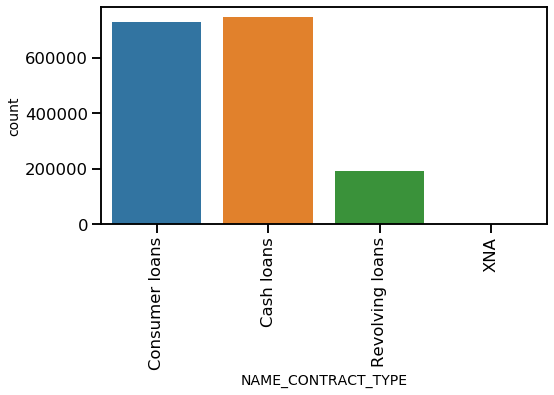

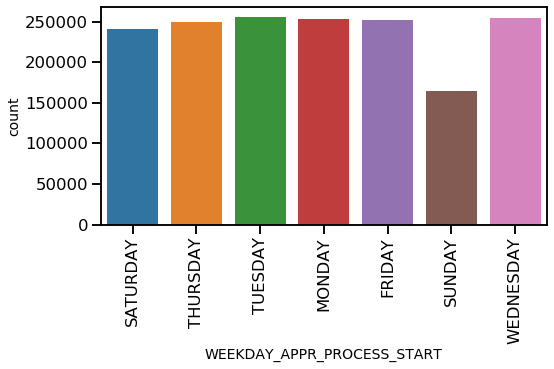

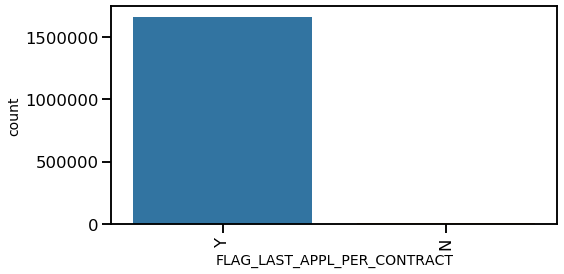

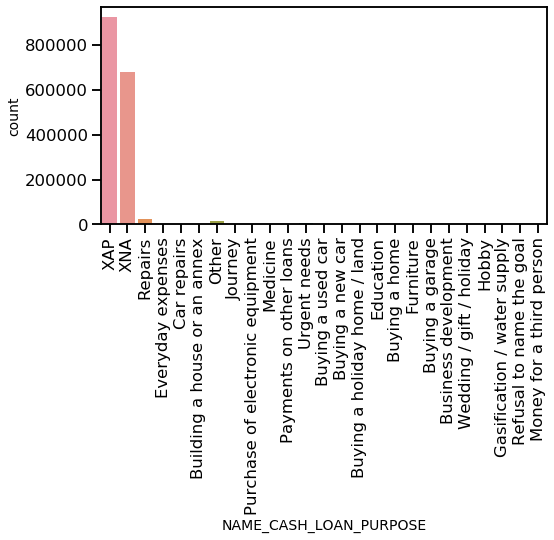

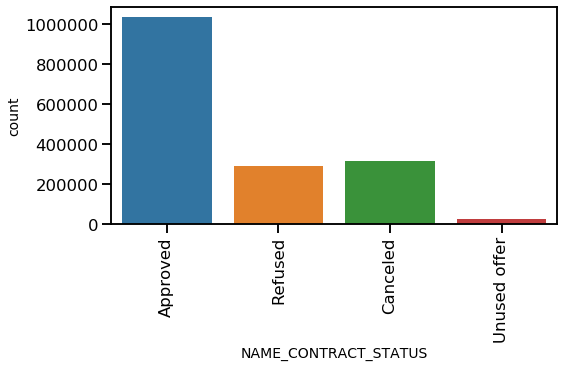

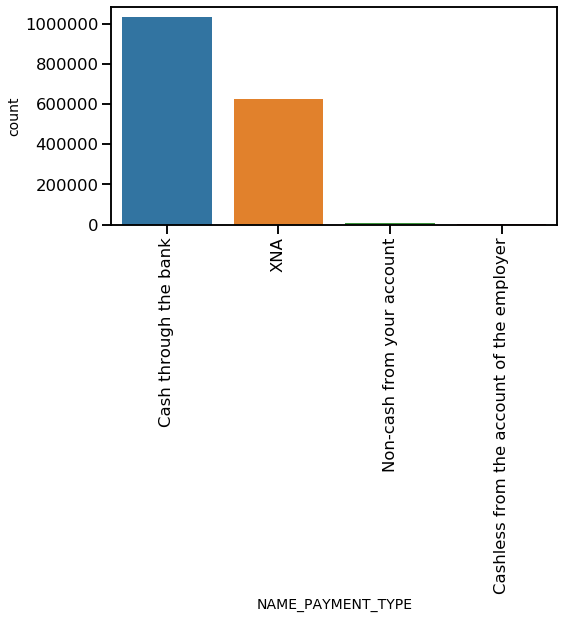

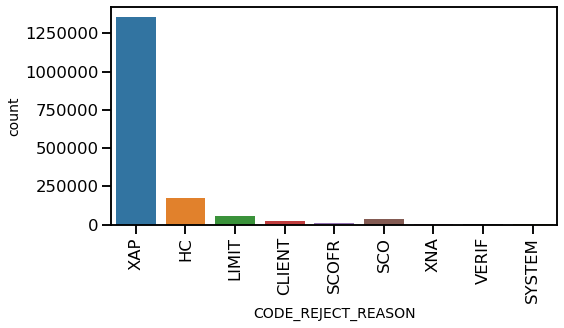

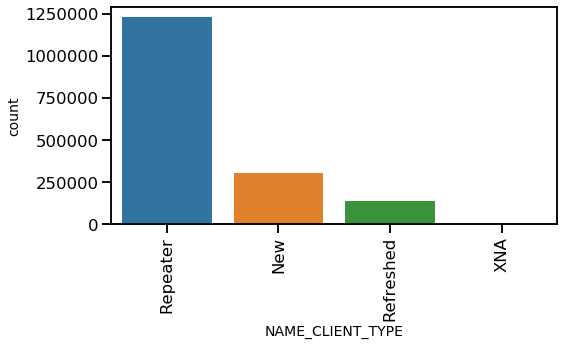

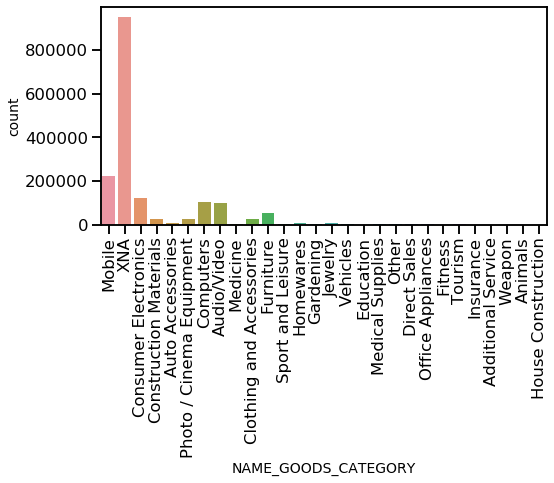

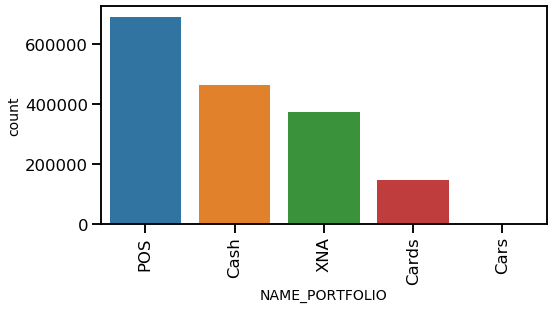

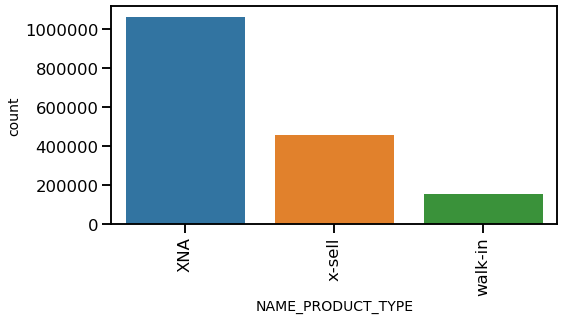

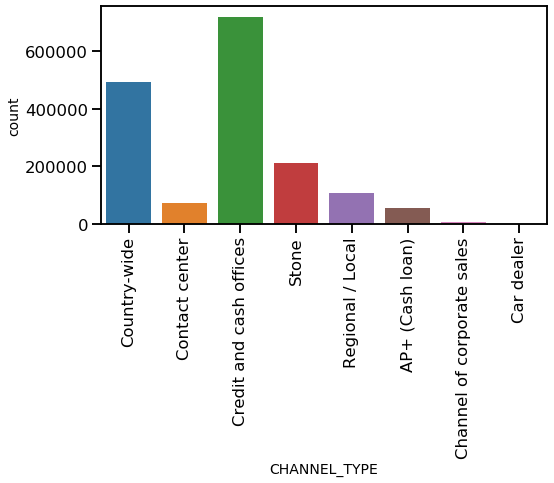

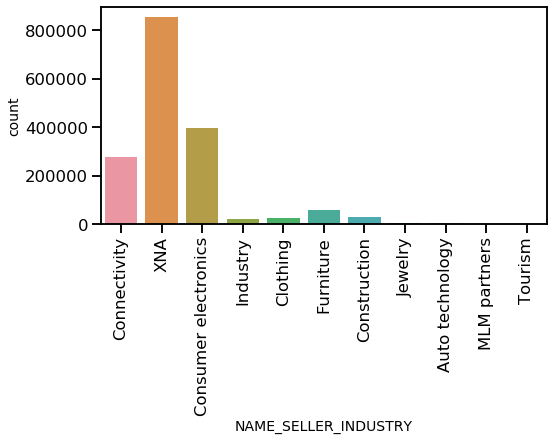

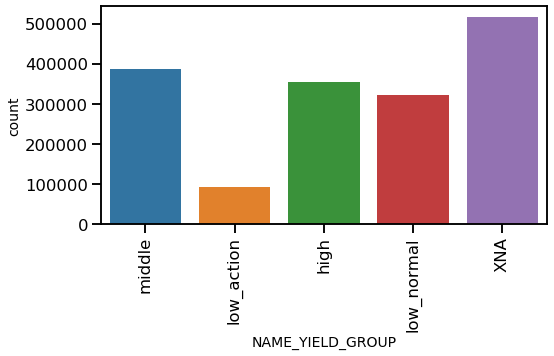

In [143]:
# Check the categories and distribution of categorical variable
pobjcols=[col for col in pre_data.columns if pre_data[col].dtypes =='object'] 
for col in pobjcols:
    plt.figure(figsize=(8,4))
    sns.countplot(pre_data[col])
    plt.xticks(rotation=90)
    plt.show()



In [144]:
# Now merging the Application dataset with previous appliaction dataset

app_prev=pd.merge(left=app_data,right=pre_data,how='inner',on='SK_ID_CURR',suffixes=('_A','_P'))
app_prev.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_A CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_A  AMT_ANNUITY  \
0               Y             0        202500.000    406597.500    24700.500   
1               N             0        270000.000   1293502.500    35698.500   
2               N             0        270000.000   1293502.500    35698.500   
3               N             0        270000.000   1293502.500    35698.500   
4               Y             0         67500.000    135000.000     6750.000   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0       351000.000   Unaccompanied          Working   
1      1129500.000          Family    State servant   
2      1129500.000          Family    State servant   
3      1129500.000          Family    State servant   
4       135000.000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                       0.019       -9461           -637          -3648.000   
1                       0.004      -16765          -1188          -1186.000   
2                       0.004      -16765          -1188          -1186.000   
3                       0.004      -16765          -1188          -1186.000   
4                       0.010      -19046           -225          -4260.000   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
0            -2120        Laborers            1.000                    2   
1             -291      Core staff            2.000                    1   
2             -291      Core staff            2.000                    1   
3             -291      Core staff            2.000                    1   
4            -2531        Laborers            1.000                    2   

  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_A  \
0                           2                    WEDNESDAY   
1                           1                       MONDAY   
2                           1                       MONDAY   
3                           1                       MONDAY   
4                           2                       MONDAY   

   HOUR_APPR_PROCESS_START_A REG_REGION_NOT_LIVE_REGION  \
0                         10                          0   
1                         11                          0   
2                         11                          0   
3                         11                          0   
4                          9                          0   

  REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

  REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  \
0                      0                      0                       0   
1                      0                      0                       0   
2                      0                      0        

In [145]:
# Removing unwanted columns for analysis

app_prev.drop(['SK_ID_CURR','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)



In [146]:
app_prev.shape

(1413698, 65)

## Data Analysis

XAP                                0.557
XNA                                0.401
Repairs                            0.014
Other                              0.010
Urgent needs                       0.005
Buying a used car                  0.002
Building a house or an annex       0.002
Everyday expenses                  0.001
Medicine                           0.001
Payments on other loans            0.001
Education                          0.001
Journey                            0.001
Purchase of electronic equipment   0.001
Buying a new car                   0.001
Wedding / gift / holiday           0.001
Buying a home                      0.000
Car repairs                        0.000
Furniture                          0.000
Buying a holiday home / land       0.000
Business development               0.000
Gasification / water supply        0.000
Buying a garage                    0.000
Hobby                              0.000
Money for a third person           0.000
Refusal to name 

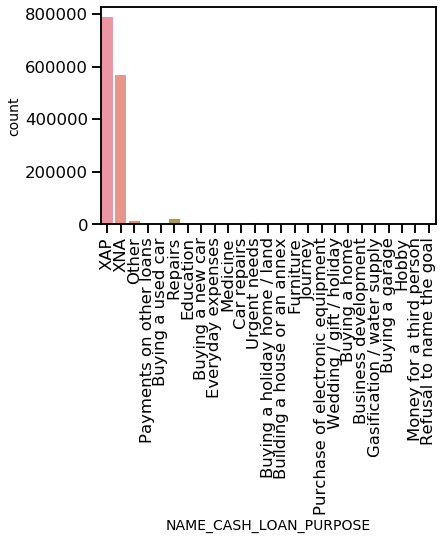

In [147]:
#Check the distribution of loan purpose column
print(app_prev.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True))
sns.countplot(x='NAME_CASH_LOAN_PURPOSE',data=app_prev)
plt.xticks(rotation=90)
plt.show()

In [148]:
# As nearly 95% of loan purpose distribution contains XAP and XNA as values, it will anyway influence the target
#variable. To check the importance of other categories we are removing the column values of 'XNA' and 'XAP' and 
#store to other variable.
app_prev_purpose = app_prev[~app_prev.NAME_CASH_LOAN_PURPOSE.isin(['XAP','XNA'])].copy()

app_prev_purpose.shape

(59413, 65)

In [149]:
#Define function for countploting
def plot_count(data,col,order,title,hue,palette):
               
    sns.set_style('darkgrid')
    sns.set_context('talk')

    plt.figure(figsize=(20,35))
    plt.xticks(rotation=90)
    plt.xscale('log')
    plt.title(title)
    ax = sns.countplot(data = data, y= col, order = order,hue = hue,palette=palette)
    plt.show()



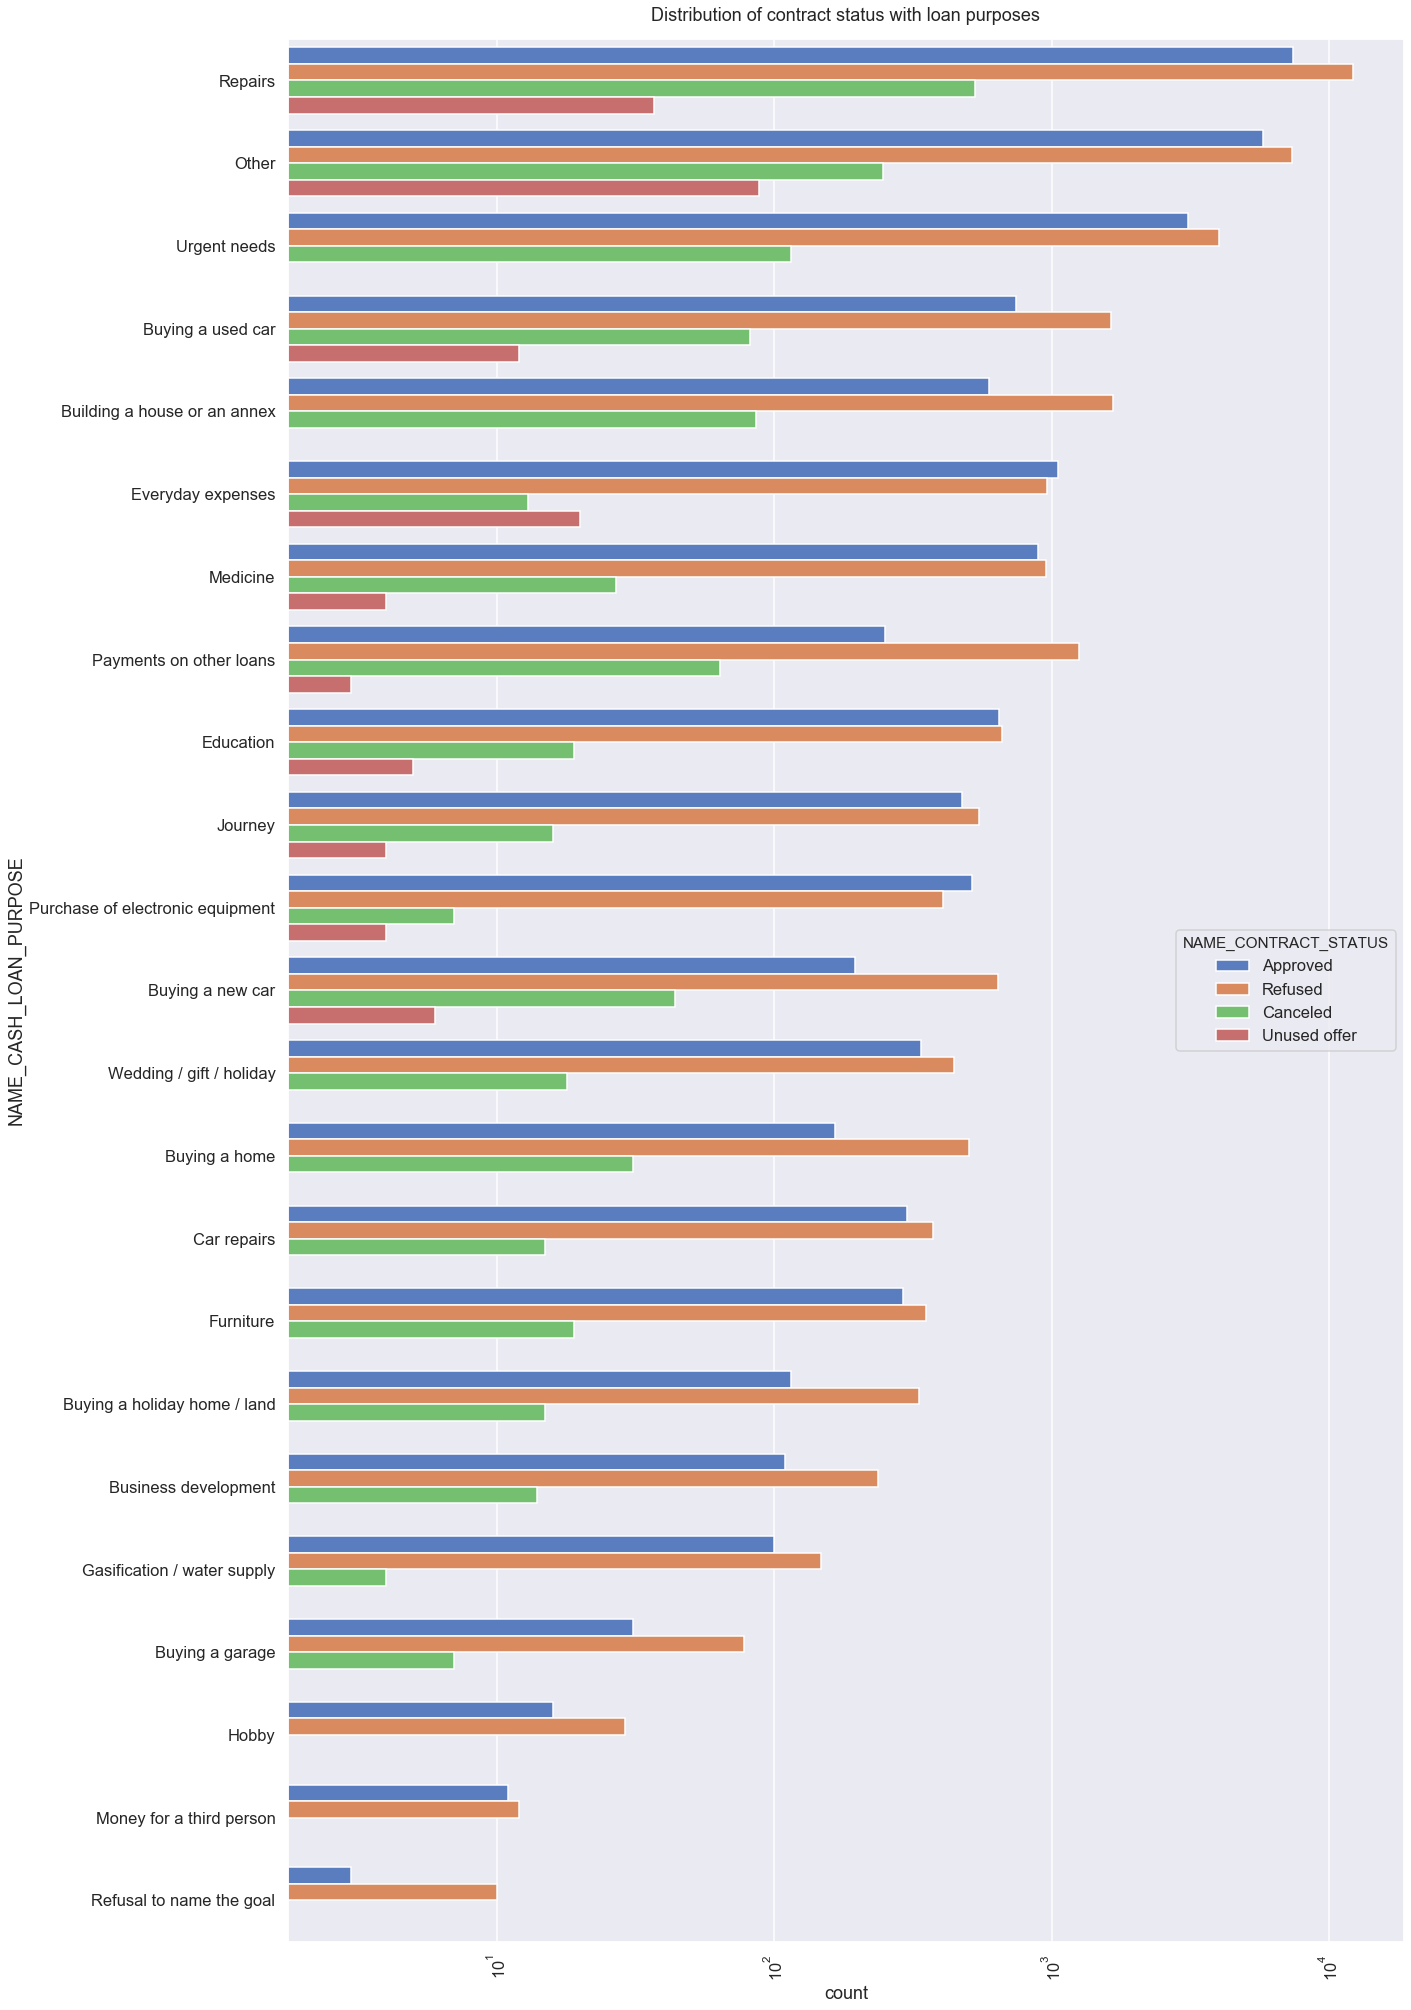

In [150]:
# plotting for loan purpose and status of loan
plot_count(data = app_prev_purpose, col= 'NAME_CASH_LOAN_PURPOSE',order = app_prev_purpose['NAME_CASH_LOAN_PURPOSE'].value_counts().index,
           title='Distribution of contract status with loan purposes',hue = 'NAME_CONTRACT_STATUS',palette='muted')


### Inferences
1. Highest number of applicantions for the loan purpose are of category XAP and XNA.
2. In almost all categories of loan purpose, most of the loans were rejected by the bank except for education, everyday expense, purchase of electronic equipment.
3. Moslty applicants has cancelled a loan applied for buying something,urgent needs and repairs.
4. There are equal number of approvals & refusals in “Education” loan requests
5. When the applicant refuses to name the goal of taking loan, bank mostly rejects it.
6. Around 10000 requests for “Repair” type loans and “Payment on other loans” have been refused & holds highest rejections.

In [151]:
#Create a dataframe with 'NAME_CASH_LOAN_PURPOSE' and 'TARGET'
data_loan_purpose=(app_prev_purpose.groupby(['NAME_CASH_LOAN_PURPOSE','TARGET'])['NAME_CASH_LOAN_PURPOSE'].count()).unstack()

In [152]:
(data_loan_purpose[1]/sum(data_loan_purpose[1])*100).sort_values(ascending=False)

NAME_CASH_LOAN_PURPOSE
Repairs                            33.803
Other                              21.618
Urgent needs                       13.981
Building a house or an annex        4.187
Buying a used car                   4.109
Payments on other loans             3.256
Medicine                            3.243
Everyday expenses                   2.791
Education                           1.809
Car repairs                         1.641
Purchase of electronic equipment    1.512
Journey                             1.434
Wedding / gift / holiday            1.215
Furniture                           1.098
Buying a home                       1.085
Buying a new car                    1.034
Buying a holiday home / land        0.711
Business development                0.594
Gasification / water supply         0.581
Hobby                               0.116
Buying a garage                     0.090
Money for a third person            0.052
Refusal to name the goal            0.039
Name: 1, dt

In [153]:
(data_loan_purpose[0]/sum(data_loan_purpose[0])*100).sort_values(ascending=False)

NAME_CASH_LOAN_PURPOSE
Repairs                            33.868
Other                              22.756
Urgent needs                       11.909
Buying a used car                   4.163
Building a house or an annex        3.909
Everyday expenses                   3.553
Medicine                            3.135
Payments on other loans             2.556
Education                           2.311
Journey                             1.802
Purchase of electronic equipment    1.581
Buying a new car                    1.560
Wedding / gift / holiday            1.368
Buying a home                       1.194
Furniture                           1.113
Car repairs                         1.091
Buying a holiday home / land        0.790
Business development                0.606
Gasification / water supply         0.399
Buying a garage                     0.211
Hobby                               0.070
Money for a third person            0.037
Refusal to name the goal            0.019
Name: 0, dt

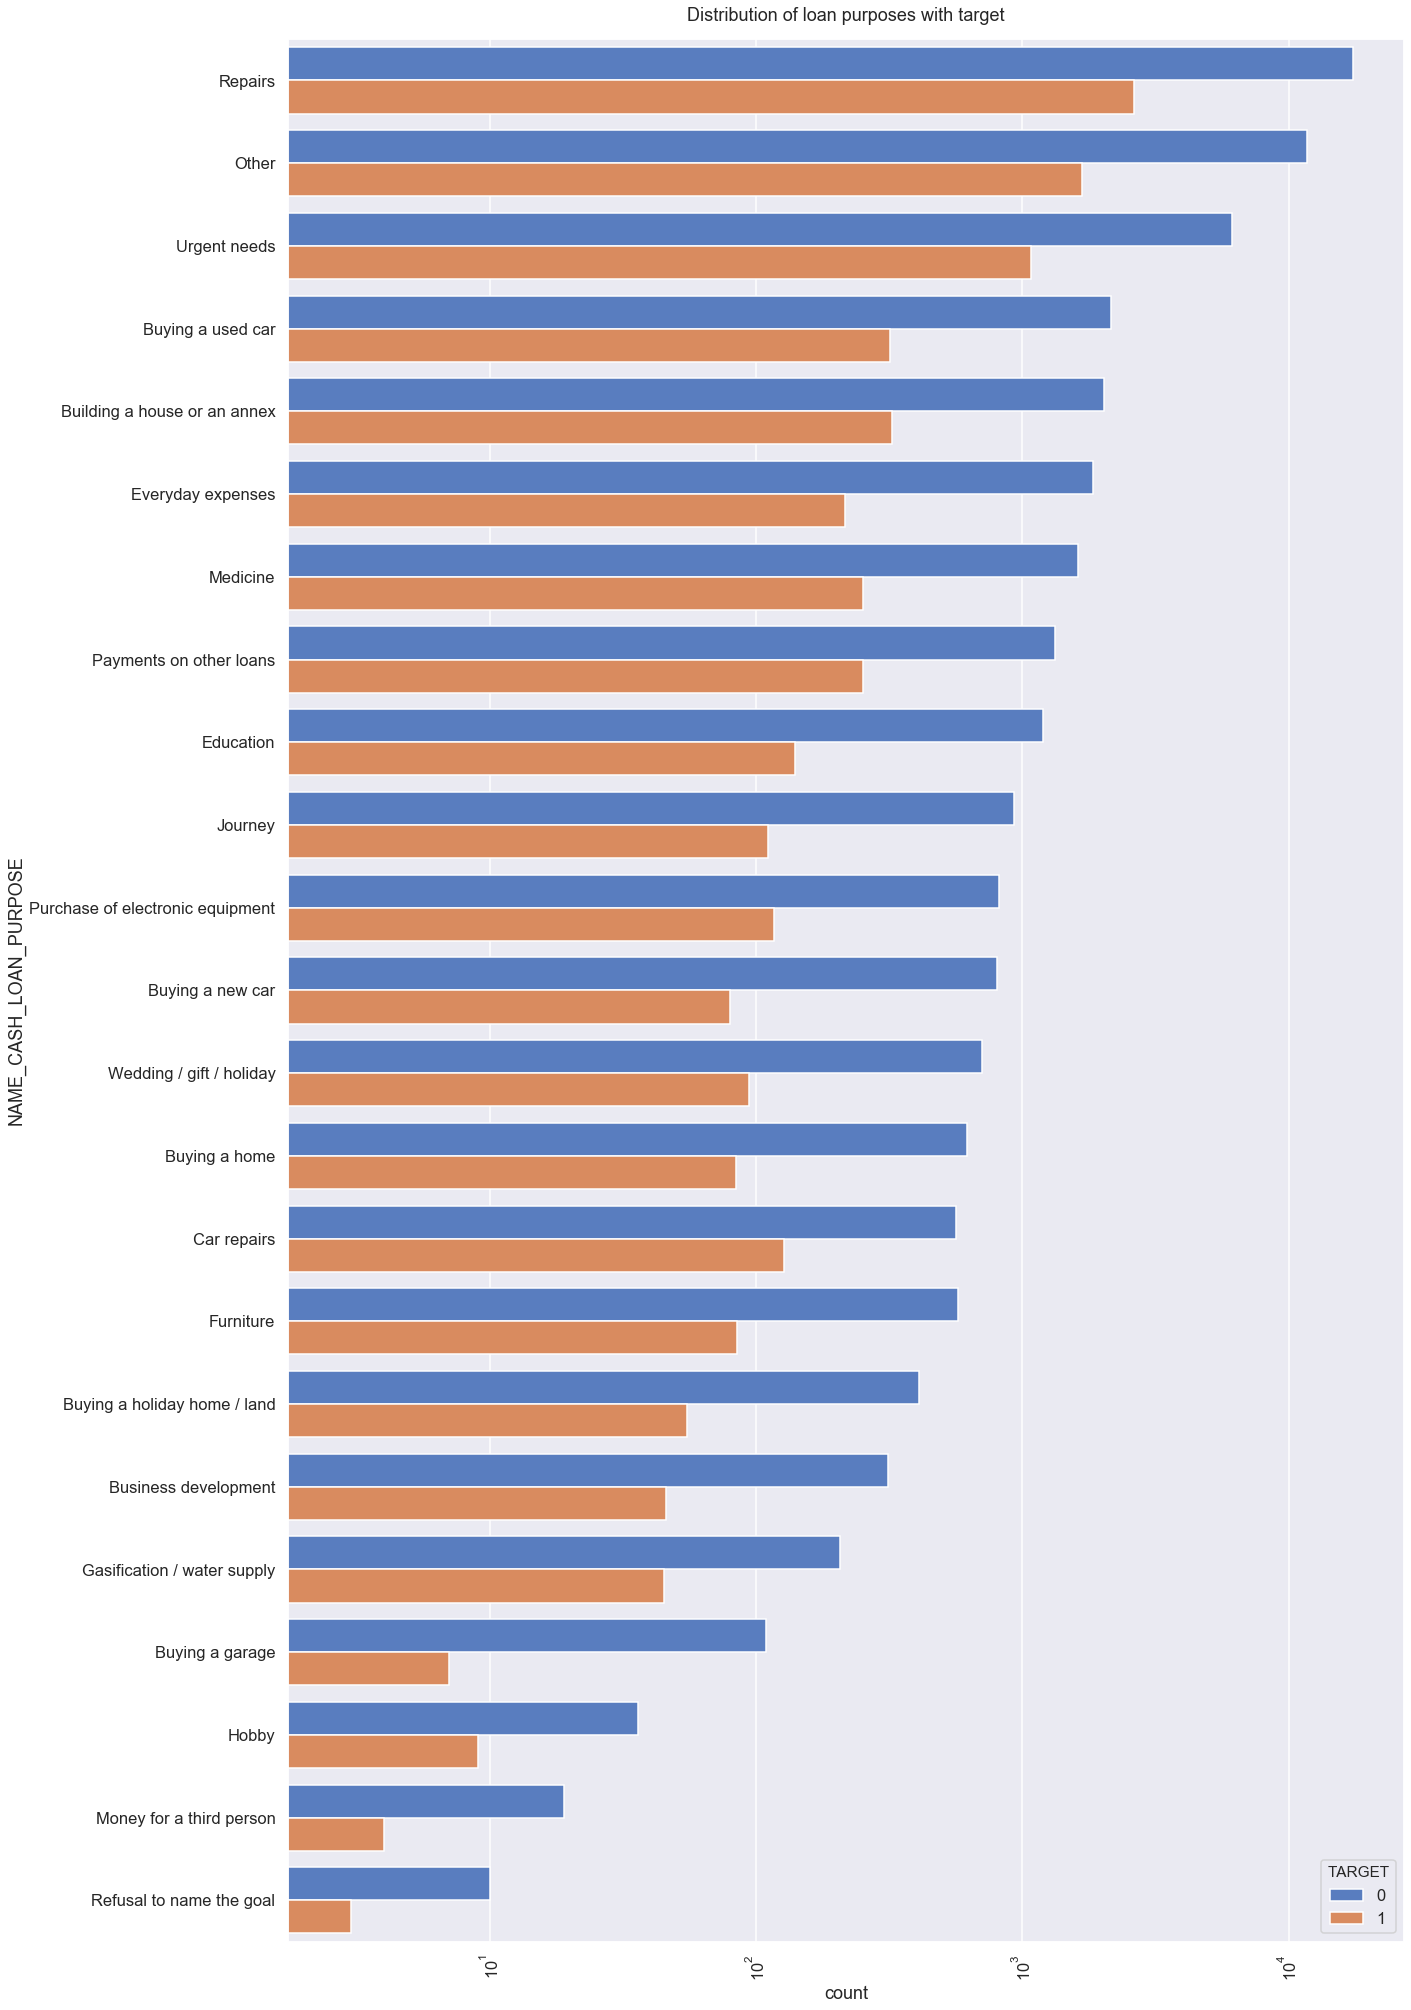

In [154]:
# Distribution of contract purpose
plot_count(data = app_prev_purpose, col= 'NAME_CASH_LOAN_PURPOSE', 
                   order = app_prev_purpose['NAME_CASH_LOAN_PURPOSE'].value_counts().index,title='Distribution of loan purposes with target',hue = 'TARGET',palette='muted')


#### Inferences:
1. Highest number of defaulters under Repairs,others and urgent needs.
2. Loan repayment is significantly higher in case of 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' when compared with other categories.


In [155]:
#Check outliers for AMT_CREDIT_P
app_prev.AMT_CREDIT_P.quantile([.75,.8,.9,.95,.98,.99,.995])

0.750    215640.000
0.800    270000.000
0.900    533160.000
0.950    893398.500
0.980   1293502.500
0.990   1515415.500
0.995   1800000.000
Name: AMT_CREDIT_P, dtype: float64

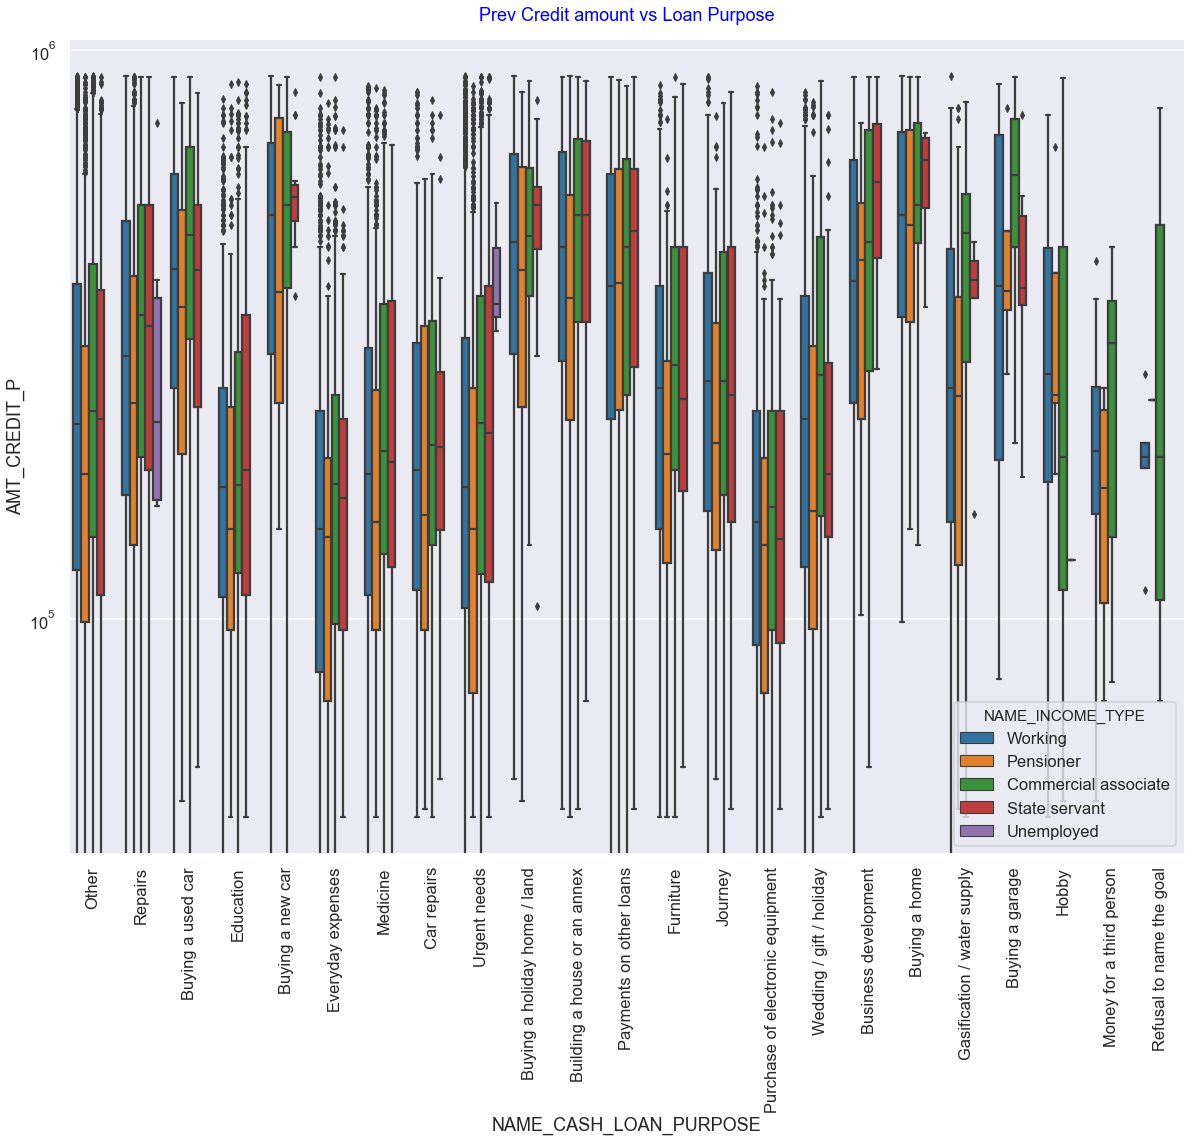

In [156]:
# Box plotting for Credit amount in logarithmic scale , ignoring outlier values for AMT_CREDIT_P

plt.figure(figsize=(20,15))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =app_prev_purpose[app_prev_purpose.AMT_CREDIT_P<900000], x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_P',orient='v')
plt.title('Prev Credit amount vs Loan Purpose',color="blue")
plt.show()


#### Inferences:

1.Under all purpose categories credit given for state servants and commercial associates are higher than others.

2.For purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house','Business development'the credit amount is higher.


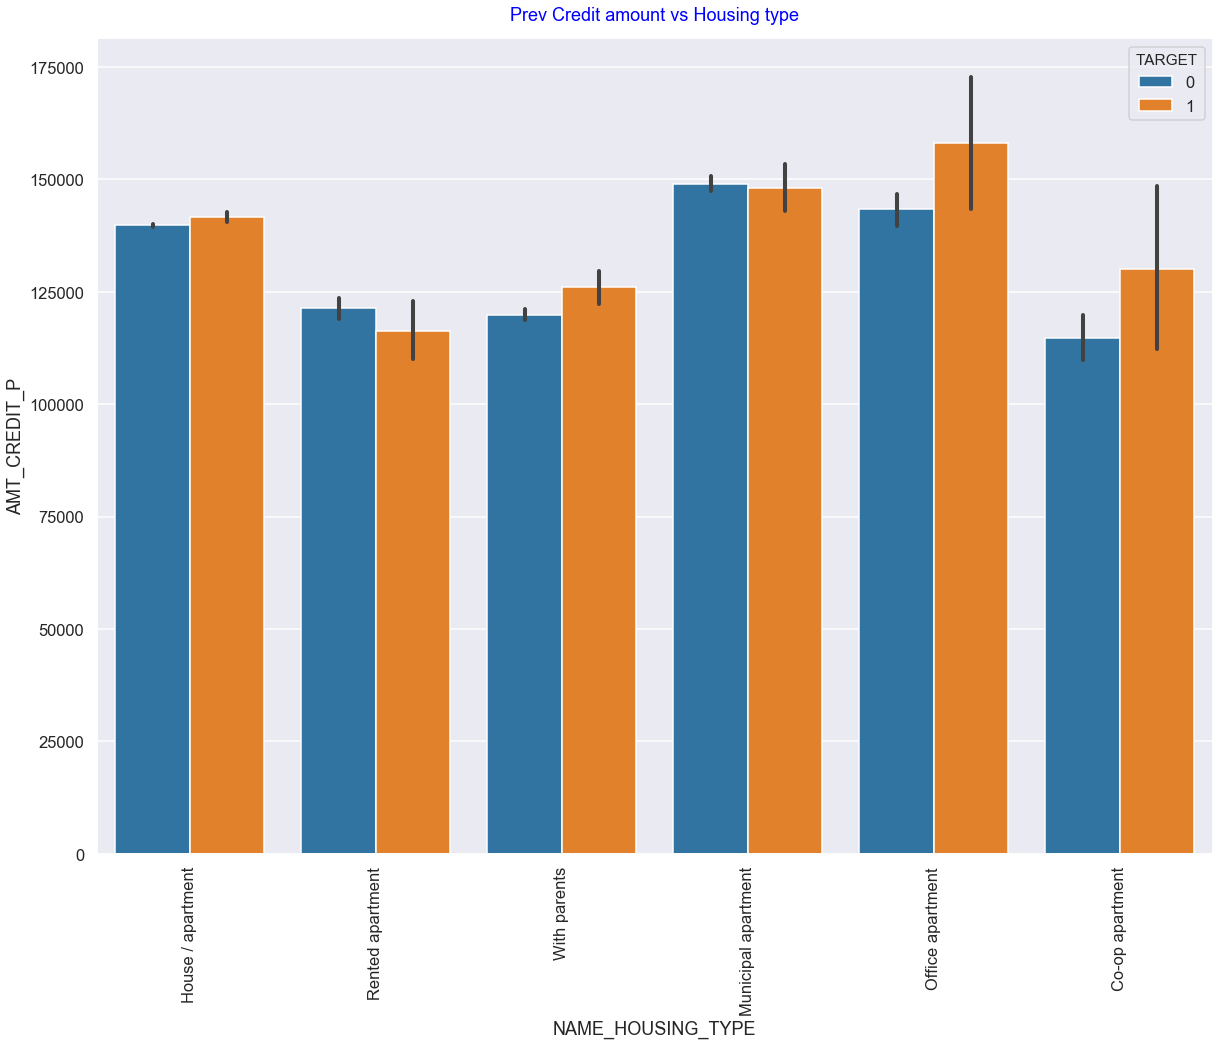

In [157]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale
#Here outliers for AMT_CREDIT_P are ignored for analysis
plt.figure(figsize=(20,15))
plt.xticks(rotation=90)
sns.barplot(data =app_prev[app_prev.AMT_CREDIT_P<900000], y='AMT_CREDIT_P',hue='TARGET',x='NAME_HOUSING_TYPE')
#sns.barplot(data =app_data, y='AMT_CREDIT',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type',color="blue")
plt.show()

### Inference:
1. Bank must be careful when giving credit to housing types, with parents,office apartment and co-op apartment. Among those categories default applicants has high credit than non-defaulters.
2. Mean credit amount for House/aparment, municipal apartment for both defaulters and non defaulters are the similar.


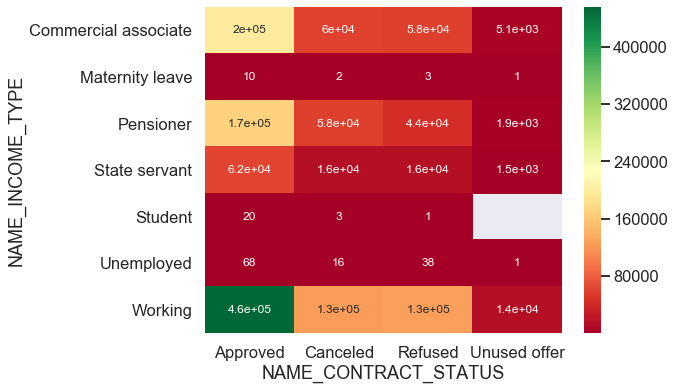

In [158]:
# Relation between income type and contract status
def_inst=app_prev.groupby(by=['NAME_INCOME_TYPE','NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].count().unstack()
plt.figure(figsize=(8,6))
sns.heatmap(def_inst,annot=True,cmap='RdYlGn',annot_kws={"fontsize":12})
plt.show()

### Inference:
On the basis on the income type:
1. Loans contract status shows that mostly status are approved for working, commercial associate and pensioner
2. Rejections are also higher in case of working, commercial associate and pensioner. Approvals are more than that of rejections
3. People from Students, unemployed and maternity leave categories apply least number of loans

In [159]:
#Correlation Matrix for Numeric Variables
loan_corr = app_prev.corr()
loan_corr

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
TARGET                       1.000         0.020            -0.002   
CNT_CHILDREN                 0.020         1.000             0.012   
AMT_INCOME_TOTAL            -0.002         0.012             1.000   
AMT_CREDIT_A                -0.024         0.003             0.166   
AMT_ANNUITY                 -0.007         0.029             0.206   
AMT_GOODS_PRICE             -0.033        -0.001             0.168   
REGION_POPULATION_RELATIVE  -0.035        -0.022             0.077   
DAYS_BIRTH                   0.075         0.363             0.026   
DAYS_EMPLOYED               -0.048        -0.248            -0.067   
DAYS_REGISTRATION            0.043         0.187             0.028   
DAYS_ID_PUBLISH              0.051        -0.013             0.014   
CNT_FAM_MEMBERS              0.015         0.879             0.014   
HOUR_APPR_PROCESS_START_A   -0.022        -0.000             0.040   
EXT_SOURCE_2                -0.155        -0.023             0.065   
EXT_SOURCE_3                -0.169        -0.042            -0.039   
OBS_30_CNT_SOCIAL_CIRCLE     0.015         0.018            -0.010   
DEF_30_CNT_SOCIAL_CIRCLE     0.032         0.000            -0.013   
OBS_60_CNT_SOCIAL_CIRCLE     0.014         0.017            -0.010   
DEF_60_CNT_SOCIAL_CIRCLE     0.029        -0.001            -0.013   
AMT_REQ_CREDIT_BUREAU_HOUR   0.000        -0.000             0.003   
AMT_REQ_CREDIT_BUREAU_DAY    0.004        -0.002             0.005   
AMT_REQ_CREDIT_BUREAU_WEEK  -0.001         0.003             0.006   
AMT_REQ_CREDIT_BUREAU_MON   -0.015        -0.010             0.030   
AMT_REQ_CREDIT_BUREAU_QRT   -0.005        -0.013             0.009   
AMT_REQ_CREDIT_BUREAU_YEAR   0.002        -0.056             0.027   
EXT_SOURCE_mean             -0.224        -0.075             0.031   
YEARS_BIRTH                 -0.075        -0.363            -0.026   
YEARS_EMPLOYED              -0.050        -0.250            -0.067   
SK_ID_PREV                   0.002        -0.003             0.000   
AMT_APPLICATION             -0.006        -0.034             0.071   
AMT_CREDIT_P                -0.002        -0.035             0.071   
HOUR_APPR_PROCESS_START_P   -0.028         0.017             0.043   
DAYS_DECISION                0.040        -0.013             0.004   
SELLERPLACE_AREA            -0.003         0.001             0.002   

                            AMT_CREDIT_A  AMT_ANNUITY  AMT_GOODS_PRICE  \
TARGET                            -0.024       -0.007           -0.033   
CNT_CHILDREN                       0.003        0.029           -0.001   
AMT_INCOME_TOTAL                   0.166        0.206            0.168   
AMT_CREDIT_A                       1.000        0.758            0.986   
AMT_ANNUITY                        0.758        1.000            0.762   
AMT_GOODS_PRICE                    0.986        0.762            1.000   
REGION_POPULATION_RELATIVE         0.086        0.103            0.088   
DAYS_BIRTH                        -0.048        0.029           -0.046   
DAYS_EMPLOYED                     -0.061       -0.109           -0.059   
DAYS_REGISTRATION                  0.009        0.046            0.012   
DAYS_ID_PUBLISH                    0.009        0.030            0.006   
CNT_FAM_MEMBERS                    0.063        0.084            0.061   
HOUR_APPR_PROCESS_START_A          0.047        0.051            0.057   
EXT_SOURCE_2                       0.116        0.108            0.123   
EXT_SOURCE_3                       0.036        0.014            0.040   
OBS_30_CNT_SOCIAL_CIRCLE           0.007       -0.005            0.009   
DEF_30_CNT_SOCIAL_CIRCLE          -0.018       -0.020           -0.018   
OBS_60_CNT_SOCIAL_CIRCLE           0.007       -0.005            0.009   
DEF_60_CNT_SOCIAL_CIRCLE          -0.022       -0.022           -0.022   
AMT_REQ_CREDIT_BUREAU_HOUR        -0.003        0.002           -0.002   
AMT_REQ_CREDIT_BUREAU_D

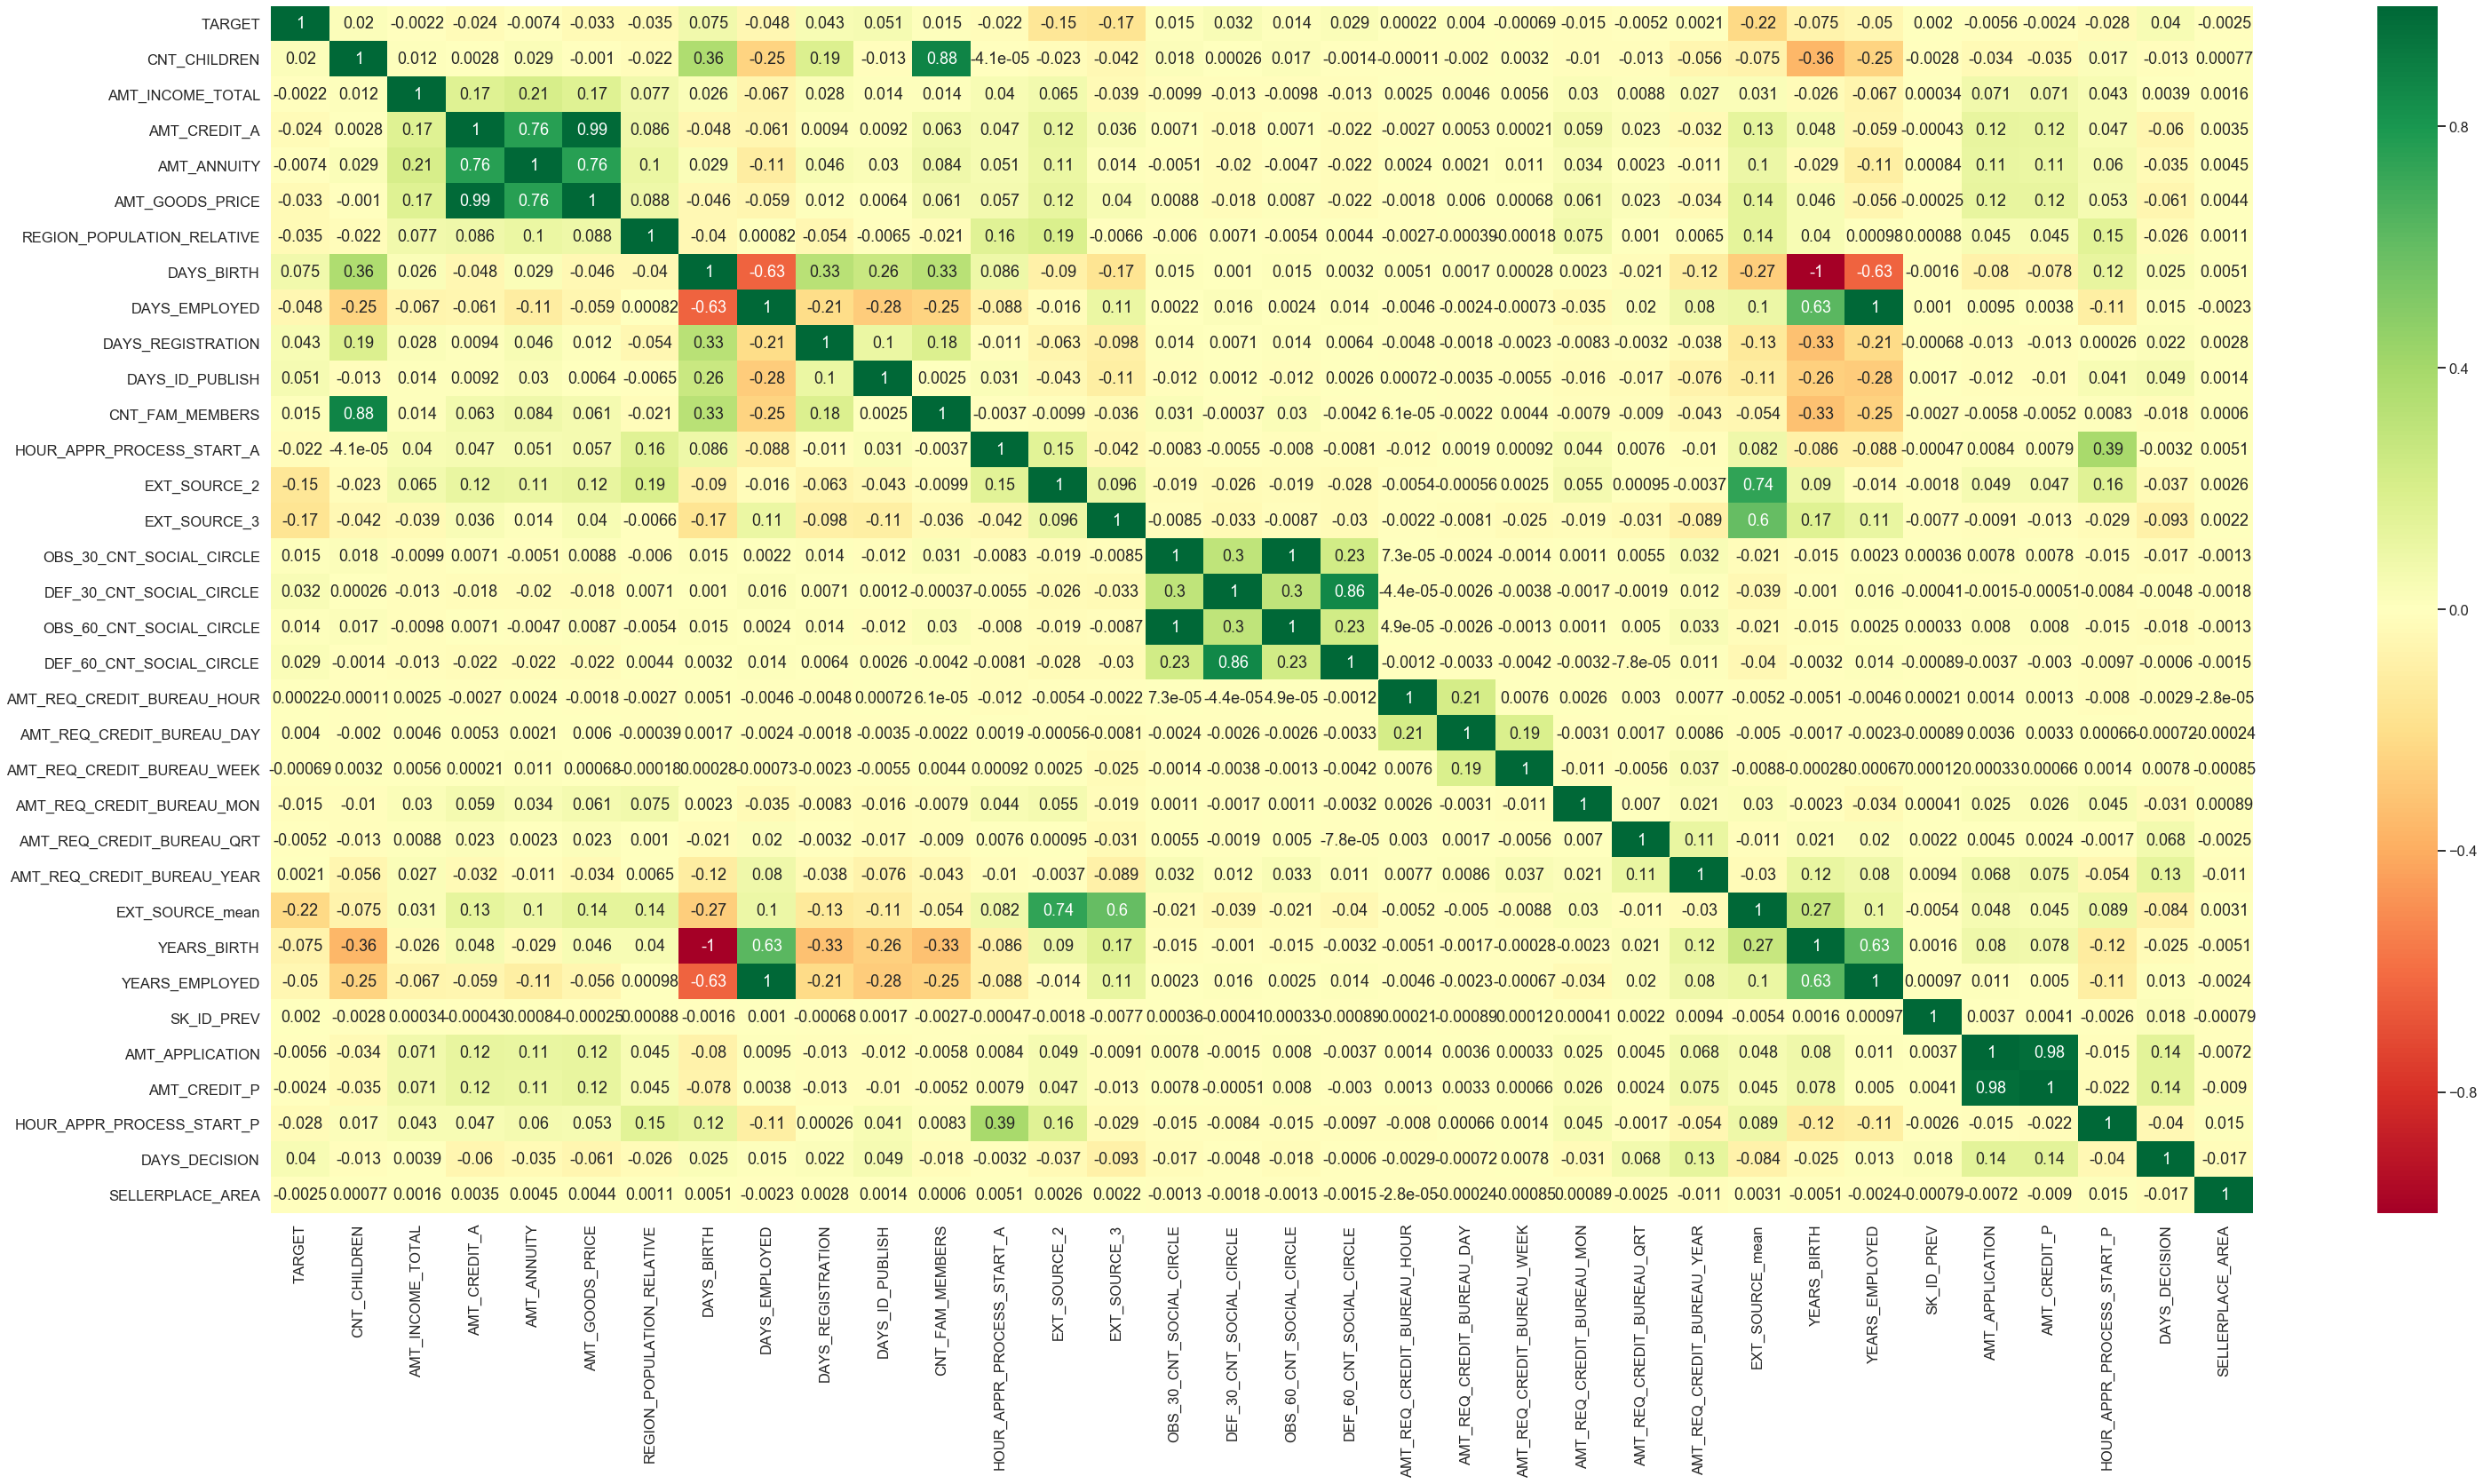

In [160]:
#plotting correlation
f, ax = plt.subplots(figsize=(50, 25))
sns.heatmap(loan_corr,cmap="RdYlGn", 
            xticklabels=loan_corr.columns.values,
            yticklabels=loan_corr.columns.values,annot= True)
plt.show()

#### Inferences :
1. From the above correlation we can say that Final credit amount on the previous application(AMT_CREDIT_P) has a high correlation with AMT_APPLICATION , for the amount which client initially applied.

3. Higher the count of children , less is the years employed.

4. For consumer loans, higher the price of the goods given in exchange for loan, higher is the loan credited given to the customer

5. For DAYS employed has a negative correlation between hours aplication process start from previous data. Faster application process happens when the client is employed for more days.

6. Higher Number of enquiries to Credit Bureau about the client one day year, higher is the days took for decision.

